### Importing Required Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the dataset:

In [2]:
sales = pd.read_excel('SALESDATA.xls', parse_dates=['DateKey','Invoice Date', 'Promised Delivery Date'])
sales

CustKey    DateKey  Discount Amount Invoice Date  Invoice Number  \
0      10000481 2017-04-30          -237.91   2017-04-30          100012   
1      10002220 2017-07-14           368.79   2017-07-14          100233   
2      10002220 2017-10-17           109.73   2017-10-17          116165   
3      10002489 2017-06-03          -211.75   2017-06-03          100096   
4      10004516 2017-05-27         96627.94   2017-05-27          103341   
...         ...        ...              ...          ...             ...   
65277  10017638 2018-03-21           505.78   2018-03-21          226497   
65278  10017638 2018-03-21           410.75   2018-03-21          226497   
65279  10017638 2018-03-21           876.16   2018-03-21          226497   
65280  10017638 2018-03-21         24226.77   2018-03-21          226498   
65281  10017638 2018-03-21         24479.26   2018-03-21          226498   

      Item Class Item Number                             Item  Line Number  \
0            NaN         NaN                 Urban Large Eggs         2000   
1            P01       20910               Moms Sliced Turkey         1000   
2            P01       38076  Cutting Edge Foot-Long Hot Dogs         1000   
3            NaN         NaN                         Kiwi Lox         1000   
4            P01       60776             High Top Sweet Onion         1000   
...          ...         ...                              ...          ...   
65277        P01       13447                 High Top Oranges         8000   
65278        P01       25906            Landslide White Sugar        38000   
65279        P01       61856                Moms Potato Salad       227001   
65280        P01       17801     Better Fancy Canned Sardines         1000   
65281        P01       27550                Imagine Popsicles         4000   

       List Price  Order Number Promised Delivery Date  Sales Amount  \
0            0.00        200015             2017-04-30        237.91   
1          824.96        200245             2017-07-14        456.17   
2          548.66        213157             2017-10-16        438.93   
3            0.00        200107             2017-06-03        211.75   
4          408.52        203785             2017-05-28      89248.66   
...           ...           ...                    ...           ...   
65277      119.52        320895             2018-03-21        569.90   
65278      436.78        320895             2018-03-21        462.81   
65279      232.92        320895             2018-03-21        987.20   
65280     1431.23        320907             2018-03-21      27297.51   
65281     1084.61        320907             2018-03-21      27582.02   

       Sales Amount Based on List Price  Sales Cost Amount  \
0                                  0.00               0.00   
1                                824.96               0.00   
2                                548.66               0.00   
3                                  0.00               0.00   
4                             185876.60               0.00   
...                                 ...                ...   
65277                           1075.68             239.95   
65278                            873.56             423.55   
65279                           1863.36             574.00   
65280                          51524.28           16188.90   
65281                          52061.28           14234.22   

       Sales Margin Amount  Sales Price  Sales Quantity  Sales Rep U/M  
0                   237.91   237.910000               1        184  EA  
1                   456.17   456.170000               1        127  EA  
2                   438.93   438.930000               1        127  EA  
3                   211.75   211.750000               1        160  EA  
4                 89248.66   196.150901             455        124  SE  
...                    ...          ...             ...        ...  ..  
65277               329.95    63.3222

In [3]:
# Checking the Shape
sales_data.shape

(65282, 20)

In [4]:
sales_data.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65282 non-null  int64         
 1   DateKey                           65282 non-null  datetime64[ns]
 2   Discount Amount                   65280 non-null  float64       
 3   Invoice Date                      65282 non-null  datetime64[ns]
 4   Invoice Number                    65282 non-null  int64         
 5   Item Class                        56993 non-null  object        
 6   Item Number                       65241 non-null  object        
 7   Item                              65282 non-null  object        
 8   Line Number                       65282 non-null  int64         
 9   List Price                        65282 non-null  float64       
 10  Order Number                      65282 non-nu

In [6]:
# Checking no. of Null Values
sales_data.isnull().sum()

CustKey                                0
DateKey                                0
Discount Amount                        2
Invoice Date                           0
Invoice Number                         0
Item Class                          8289
Item Number                           41
Item                                   0
Line Number                            0
List Price                             0
Order Number                           0
Promised Delivery Date                 0
Sales Amount                           0
Sales Amount Based on List Price       0
Sales Cost Amount                      0
Sales Margin Amount                    0
Sales Price                            1
Sales Quantity                         0
Sales Rep                              0
U/M                                    0
dtype: int64

In [7]:
sales_data01 = sales_data.copy()

In [8]:
sales_data01['Item Class'].value_counts()

P01    56977
PO1       16
Name: Item Class, dtype: int64

In [9]:
# Removing Null Values
sales_data01.dropna(subset=['Discount Amount','Sales Price', 'Item Number'],inplace=True)

In [10]:
# Generating descriptive statistics
sales_data01.describe()

CustKey  Discount Amount  Invoice Number    Line Number  \
count  6.524100e+04     65241.000000    65241.000000   65241.000000   
mean   1.001770e+07      1857.310923   216292.785242   23725.043178   
std    7.175846e+03      9039.535784    94982.018695   32669.565014   
min    1.000045e+07   -255820.800000   100034.000000    1000.000000   
25%    1.001272e+07       246.280000   117969.000000    3000.000000   
50%    1.001966e+07       442.200000   222904.000000   12000.000000   
75%    1.002351e+07      1001.500000   314325.000000   32000.000000   
max    1.002758e+07    343532.660000   332842.000000  344000.000000   

         List Price   Order Number   Sales Amount  \
count  65241.000000   65241.000000   65241.000000   
mean     515.016834  180567.610122    2853.121051   
std      449.144896   67612.238675   15169.020896   
min        0.000000  100838.000000     200.010000   
25%      181.560000  115281.000000     308.310000   
50%      325.190000  203695.000000     553.940000   
75%      803.860000  218576.000000    1279.750000   
max     2760.700000  321532.000000  555376.000000   

       Sales Amount Based on List Price  Sales Cost Amount  \
count                      65241.000000       65241.000000   
mean                        4710.431974        1662.023052   
std                        20702.609533        9559.396917   
min                            0.000000           0.000000   
25%                          561.040000         167.810000   
50%                          999.750000         304.580000   
75%                         2321.400000         688.550000   
max                       632610.160000      366576.000000   

       Sales Margin Amount   Sales Price  Sales Quantity     Sales Rep  
count         65241.000000  65241.000000    65241.000000  65241.000000  
mean           1191.097999    283.250283       45.106712    137.421422  
std            5862.566647    250.448615      429.793733     26.644271  
min           -3932.930000      0.337341        1.000000    103.000000  
25%             129.890000    100.030000        2.000000    113.000000  
50%             246.480000    183.282857        3.000000    134.000000  
75%             578.220000    448.220000        8.000000    160.000000  
max          188800.000000   6035.000000    16000.000000    185.000000

In [11]:
# Creating Year, Month, Quarter, Day Columns in Sales_data01 
sales_data01['Invoice_Year'] = sales_data['Invoice Date'].dt.year
sales_data01['Invoice_Month'] = sales_data['Invoice Date'].dt.month
sales_data01['Invoice_Quarter'] = sales_data['Invoice Date'].dt.quarter
sales_data01['Invoice_Day'] = sales_data['Invoice Date'].dt.day

In [12]:
sales_data01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65241 entries, 1 to 65281
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65241 non-null  int64         
 1   DateKey                           65241 non-null  datetime64[ns]
 2   Discount Amount                   65241 non-null  float64       
 3   Invoice Date                      65241 non-null  datetime64[ns]
 4   Invoice Number                    65241 non-null  int64         
 5   Item Class                        56993 non-null  object        
 6   Item Number                       65241 non-null  object        
 7   Item                              65241 non-null  object        
 8   Line Number                       65241 non-null  int64         
 9   List Price                        65241 non-null  float64       
 10  Order Number                      65241 non-nu

In [13]:
# Creating DataFrame only with neccessary values.
sales_data02 = sales_data01[['CustKey','Item','Invoice Date','Invoice_Year','Invoice_Quarter', 'Invoice_Month',
                           'Invoice_Day', 'Sales Quantity', 'Sales Amount Based on List Price','Discount Amount',
                           'Sales Amount', 'Sales Margin Amount','Sales Cost Amount','Sales Rep','U/M','List Price',
                           'Sales Price']]

In [14]:
sales_data02.isnull().sum()

CustKey                             0
Item                                0
Invoice Date                        0
Invoice_Year                        0
Invoice_Quarter                     0
Invoice_Month                       0
Invoice_Day                         0
Sales Quantity                      0
Sales Amount Based on List Price    0
Discount Amount                     0
Sales Amount                        0
Sales Margin Amount                 0
Sales Cost Amount                   0
Sales Rep                           0
U/M                                 0
List Price                          0
Sales Price                         0
dtype: int64

<AxesSubplot:>

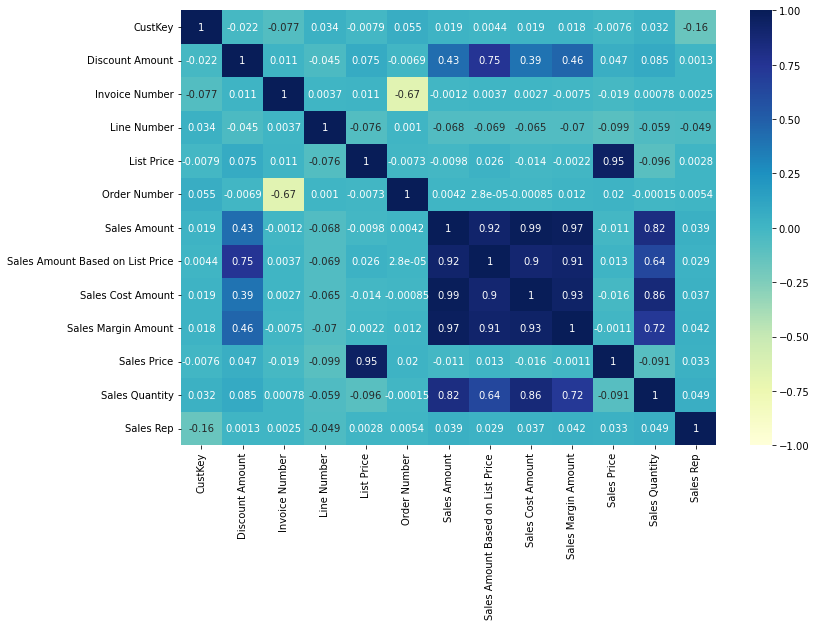

In [15]:
# Checking the correlation
plt.figure(figsize=(12,8))
sns.heatmap(sales_data.corr(method='pearson'), annot=True, vmin=-1, vmax=1, cmap='YlGnBu')

### Observations:

* 1 Discount Amount is highly related to Sales Amount, Sales Cost Amount, Sales Amount Based on List Price & Sales Margin Amount and moderately related to Sales Quantity.
* 2- List Price highly related to sales price and has no relations with Sales amount, Sales cost amount, Sales amount based on list price & sales margin amount.
* 3- Sales quantity is moderately related to Sales amount, discount amount, sales margin amount.
* Their is no relation Between Sales Rep and Sales Amount, Sales Margin Amount.

In [16]:
# set style
sns.set(style = 'darkgrid')

In [17]:
DaySalesInsights = sales_data01.copy()
DaySalesInsights['Invoice_Date'] = pd.to_datetime(sales_data01['Invoice Date']).dt.date

In [18]:
top10sales = DaySalesInsights.groupby('Invoice_Date').sum().sort_values('Sales Amount', ascending = False)
top10sales = top10sales.reset_index().head(10)

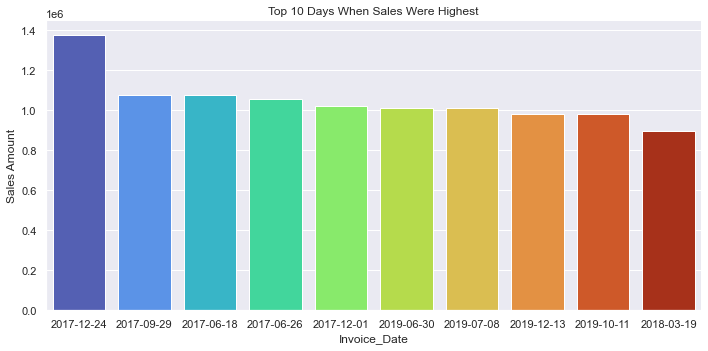

In [19]:
sns.catplot(y = 'Sales Amount', x = 'Invoice_Date', data = top10sales, aspect = 2,palette='turbo',kind="bar")
plt.title('Top 10 Days When Sales Were Highest')
top10sales[['Sales Amount']]
plt.show()

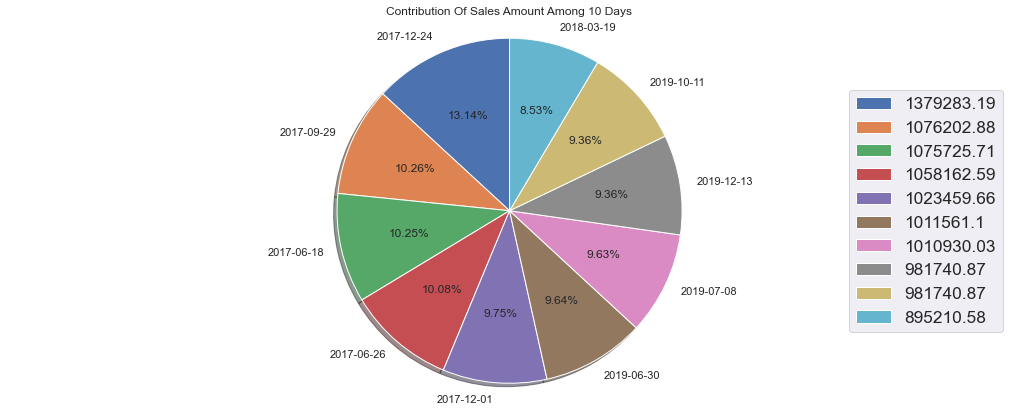

In [20]:
plt.figure(figsize=(18,7))
plt.pie('Sales Amount',labels='Invoice_Date',data = top10sales,
        autopct='%1.2f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.title('Contribution Of Sales Amount Among 10 Days')
plt.legend(round(top10sales['Sales Amount'],2), loc=7, fontsize = 'x-large')
plt.show()

In [21]:
top10profits = DaySalesInsights.groupby('Invoice_Date').sum().sort_values('Sales Margin Amount', ascending = False)
top10profits = top10profits.reset_index().head(10)

Sales Margin Amount
0            619085.33
1            480769.87
2            477173.34
3            450965.94
4            436621.64
5            413530.29
6            406118.86
7            398430.22
8            398222.72
9            392326.13

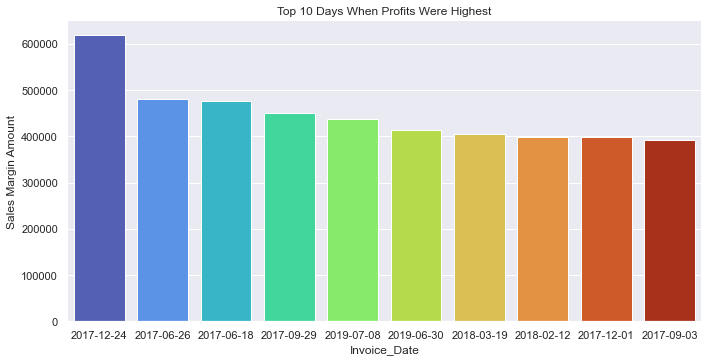

In [22]:
sns.catplot(y = 'Sales Margin Amount', x = 'Invoice_Date', data = top10profits, aspect = 2,palette='turbo',kind="bar")
plt.title('Top 10 Days When Profits Were Highest')
top10profits[['Sales Margin Amount']]

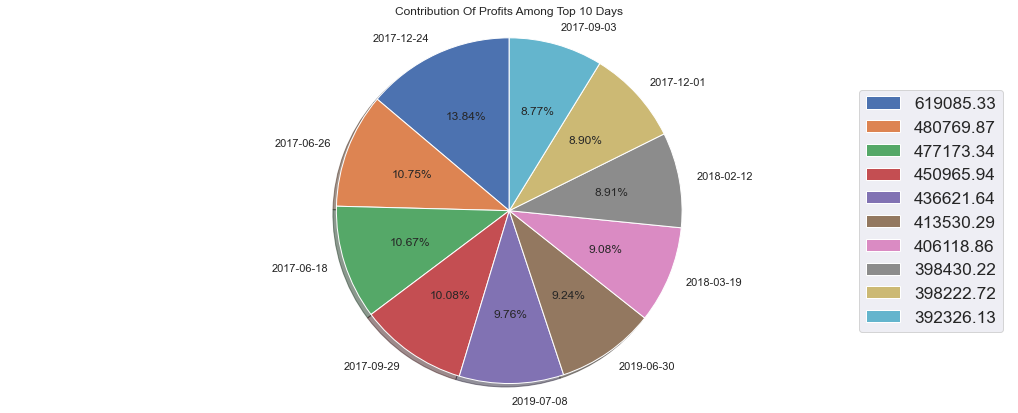

In [23]:
plt.figure(figsize=(18,7))
plt.pie('Sales Margin Amount',labels='Invoice_Date',data = top10profits,
        autopct='%1.2f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.title('Contribution Of Profits Among Top 10 Days')
plt.legend(round(top10profits['Sales Margin Amount'],2), loc=7, fontsize = 'x-large')
plt.show()

In [24]:
highqty = DaySalesInsights.groupby('Invoice_Date').sum().sort_values('Sales Quantity', ascending = False)
highqty = highqty.reset_index().head(10)

Sales Quantity
0           23710
1           23708
2           17822
3           17820
4           17819
5           17819
6           17819
7           17819
8           17819
9           17649

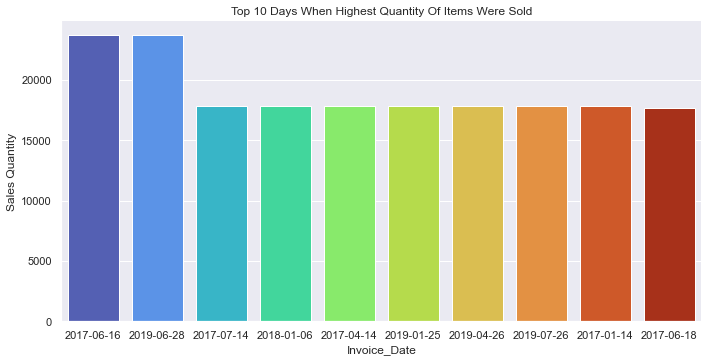

In [25]:
sns.catplot(y = 'Sales Quantity', x = 'Invoice_Date', data = highqty, aspect = 2,palette='turbo',kind="bar")
plt.title('Top 10 Days When Highest Quantity Of Items Were Sold')
highqty[['Sales Quantity']]

In [26]:
MostCust = DaySalesInsights.groupby(['Invoice_Date']).count().sort_values('CustKey', ascending = False)
MostCust = MostCust.reset_index().head(10)

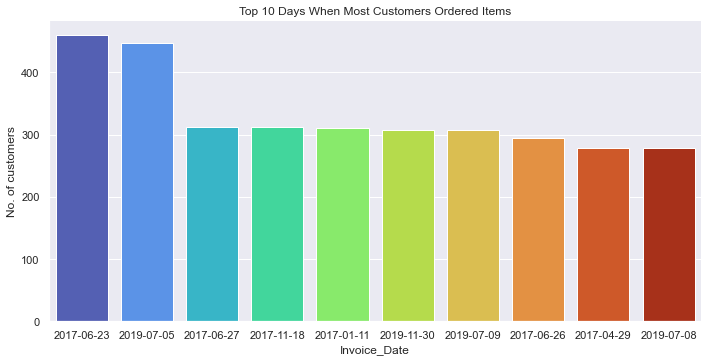

In [27]:
sns.catplot(y = 'CustKey', x = 'Invoice_Date', data = MostCust, aspect = 2,palette='turbo',kind="bar")
plt.title('Top 10 Days When Most Customers Ordered Items')
plt.ylabel('No. of customers')
plt.show()

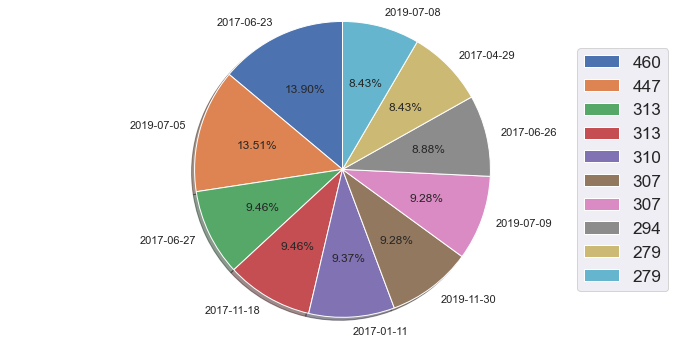

In [28]:
plt.figure(figsize=(12,6))
plt.pie(x = 'CustKey', labels = 'Invoice_Date', data = MostCust,
        autopct='%1.2f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.legend(MostCust['CustKey'], loc=7, fontsize = 'x-large')
plt.show()

### Yearly Sales Record:

In [29]:
Yearly_Sales =  sales_data02[['CustKey','Item','Invoice Date','Invoice_Year','Invoice_Month',
                            'Sales Quantity', 'Sales Amount Based on List Price','Discount Amount',
                           'Sales Amount', 'Sales Margin Amount','Sales Cost Amount','Sales Rep','U/M','List Price',
                           'Sales Price']]


Invoice_Year  Sales Amount
0          2017   87416407.83
1          2018   20817471.00
2          2019   77906591.65

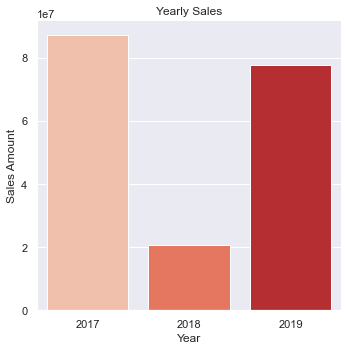

In [30]:
Yearly_Sales01 = Yearly_Sales.groupby('Invoice_Year').sum().reset_index()
sns.catplot(y = 'Sales Amount', x = 'Invoice_Year', data = Yearly_Sales01, palette='Reds',kind="bar")
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title('Yearly Sales')
Yearly_Sales01[['Invoice_Year', 'Sales Amount']]

<AxesSubplot:xlabel='Invoice_Month', ylabel='Sales Amount'>

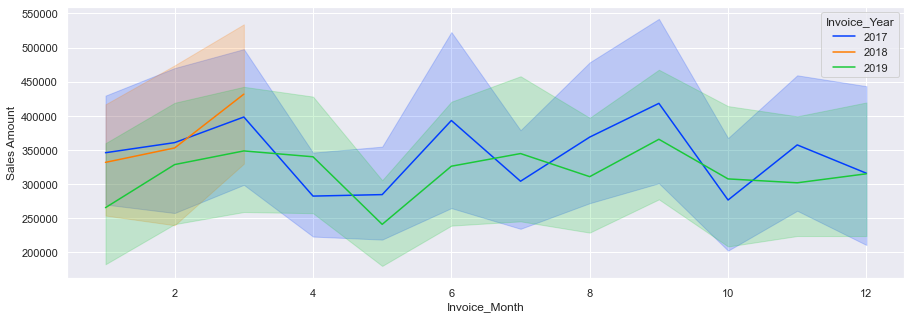

In [31]:
plt.figure(figsize = (15,5))
sns.lineplot(y ='Sales Amount', x = 'Invoice_Month',
             data= sales_data02.groupby(['Invoice Date','Invoice_Year','Invoice_Month']).sum(),
             hue = 'Invoice_Year', palette='bright')

### Obseravtions:
*  From this plot, it is clear that Sales decreased continuously & then it started to increase from 2018 to 2019.

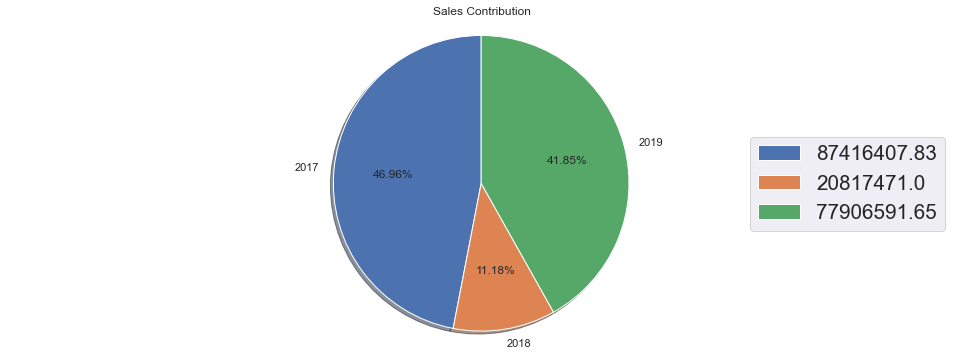

In [32]:
#Plotting Piechart to know Sales Share among 3 years
plt.figure(figsize=(17,6))
plt.pie('Sales Amount',labels='Invoice_Year',data=Yearly_Sales01,
        autopct='%1.2f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.title('Sales Contribution')
plt.legend(round(Yearly_Sales01['Sales Amount'],2), loc=7, fontsize = 'xx-large')
plt.show()

### Observations:
* From 2017-19 Highest Sales Amount 2017>2019>2018.

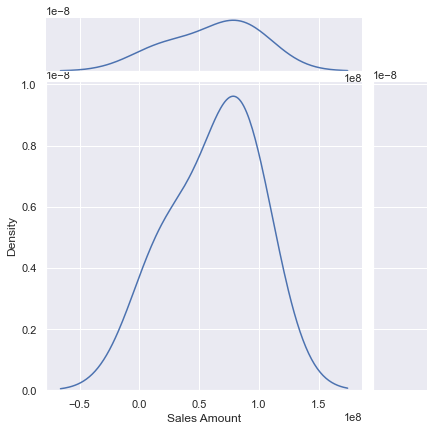

In [33]:
sns.jointplot(x='Sales Amount',data=Yearly_Sales01,kind='kde')

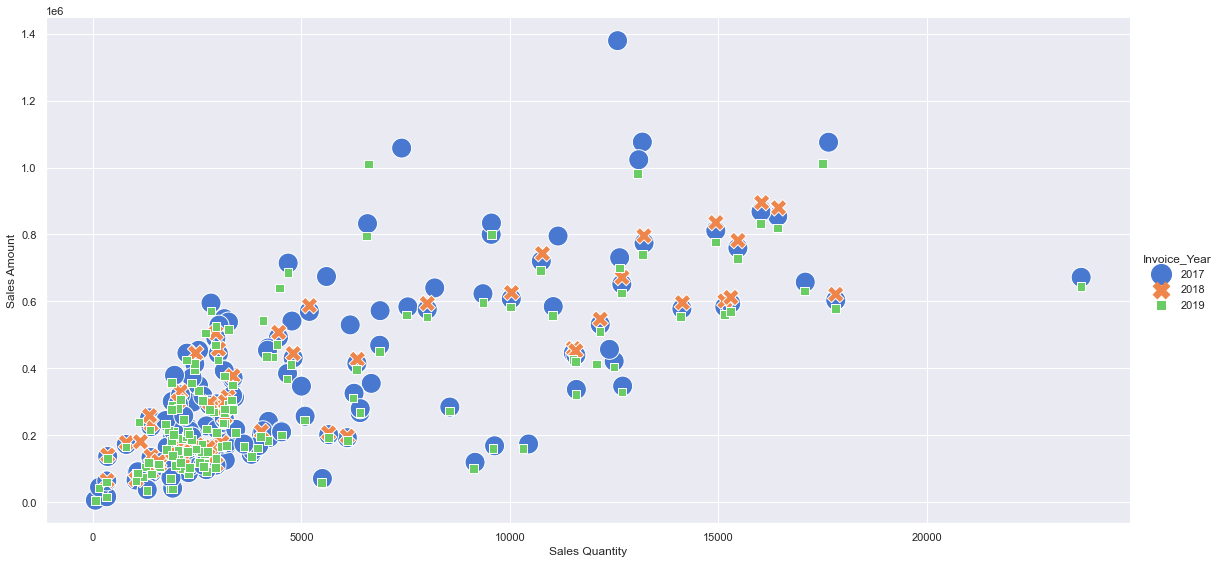

In [34]:
sns.relplot(x ='Sales Quantity',y = 'Sales Amount',
            data=sales_data02.groupby(['Invoice_Year','Invoice_Month','Invoice_Day']).sum().reset_index(),
            hue='Invoice_Year',height=8,aspect= 2, size='Invoice_Year',palette='muted',
            style= 'Invoice_Year', sizes = (400,150))

### Observations:
* Generally, from 2017 to 2019 total quantity of items on any particular day was in the range of `0` to `4000` items while the items amounted to between `$1` and `$200000`.

Text(0, 0.5, 'Count')

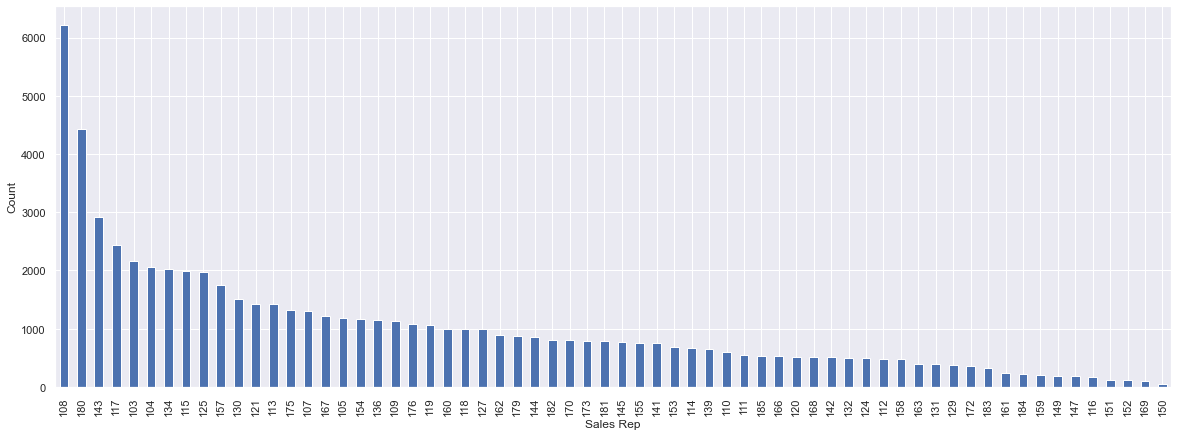

In [35]:
plt.figure(figsize=(20, 7))
sales_data01['Sales Rep'].value_counts().plot.bar()
plt.xlabel('Sales Rep')
plt.ylabel('Count')

#### Sales Rep "108" were used most often while sales rep "150" has been used the least.

## Yearly-Monthwise Records:

In [36]:
Yearly_Monthwise_Sales = sales_data02.groupby(['Invoice_Year','Invoice_Month']).sum().reset_index()
Yearly_Monthwise_Sales.iloc[:,6:].describe()

Sales Amount Based on List Price  Discount Amount  Sales Amount  \
count                      2.700000e+01     2.700000e+01  2.700000e+01   
mean                       1.138197e+07     4.487882e+06  6.894091e+06   
std                        2.220965e+06     1.231280e+06  1.142842e+06   
min                        4.900167e+06     1.712686e+06  3.187481e+06   
25%                        1.077866e+07     4.024413e+06  6.461181e+06   
50%                        1.152212e+07     4.815936e+06  6.895858e+06   
75%                        1.278649e+07     5.277200e+06  7.600667e+06   
max                        1.472000e+07     6.112159e+06  8.783739e+06   

       Sales Margin Amount  Sales Cost Amount      Sales Rep    List Price  \
count         2.700000e+01       2.700000e+01      27.000000  2.700000e+01   
mean          2.878090e+06       4.016002e+06  332055.962963  1.244452e+06   
std           5.140723e+05       6.506092e+05   55275.936829  2.116445e+05   
min           1.290189e+06       1.897292e+06  130314.000000  5.042254e+05   
25%           2.617218e+06       3.688586e+06  306638.500000  1.143268e+06   
50%           2.882060e+06       4.092856e+06  339909.000000  1.259842e+06   
75%           3.134162e+06       4.370919e+06  366086.500000  1.365313e+06   
max           3.807619e+06       5.041842e+06  404161.000000  1.558636e+06   

         Sales Price  
count      27.000000  
mean   684427.100434  
std    115921.969853  
min    270807.438237  
25%    620357.646120  
50%    694170.910154  
75%    752295.240603  
max    873625.957968

**************************************************Yearly-Monthwise Sales Trend**************************************************


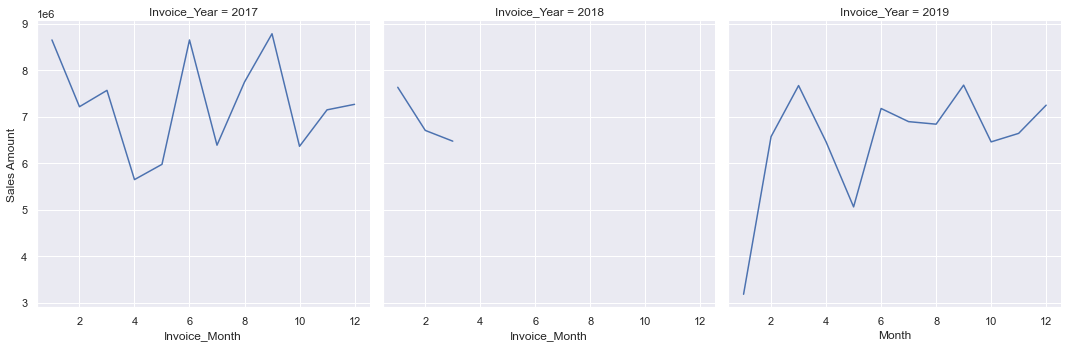

In [37]:
sns.relplot(x ='Invoice_Month',y = 'Sales Amount', data=Yearly_Monthwise_Sales,height=5,
            kind = 'line', aspect = 1, col = 'Invoice_Year')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
print('*'*50+'Yearly-Monthwise Sales Trend'+'*'*50)

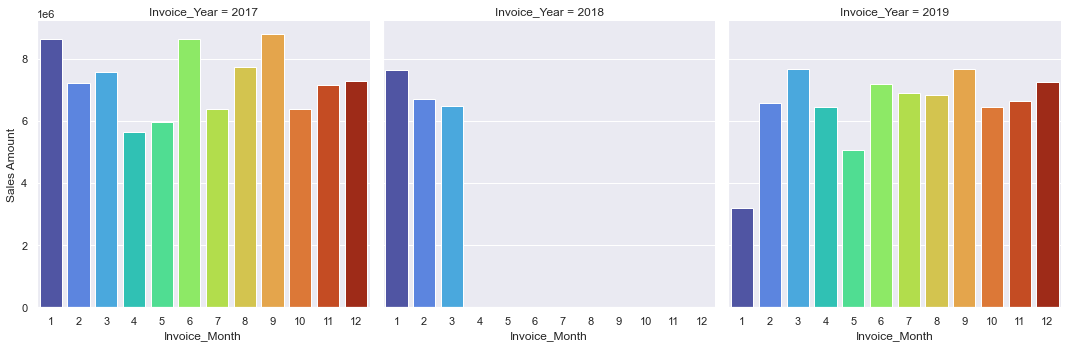

In [38]:
sns.catplot(y = 'Sales Amount', x = 'Invoice_Month', data = Yearly_Monthwise_Sales, palette='turbo',kind="bar",
            col='Invoice_Year', col_wrap=3)

<AxesSubplot:xlabel='Sales Amount', ylabel='Count'>

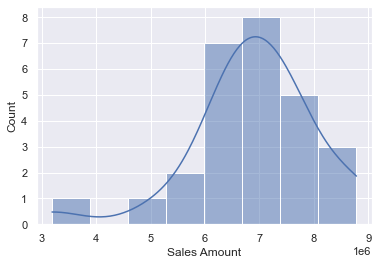

In [39]:
sns.histplot(Yearly_Monthwise_Sales['Sales Amount'], kde = True)

## Monthly Records: 

In [40]:
Monthly_sales = sales_data02.groupby(['Invoice_Year','Invoice_Month', 'Invoice_Day']).sum().reset_index()
Monthly_sales.iloc[:,5:].describe()

Sales Quantity  Sales Amount Based on List Price  Discount Amount  \
count       558.00000                      5.580000e+02     5.580000e+02   
mean       5273.84767                      5.507407e+05     2.171556e+05   
std        4780.99002                      3.885589e+05     1.819447e+05   
min          56.00000                      1.084864e+04    -2.555238e+05   
25%        2118.00000                      2.585411e+05     8.911556e+04   
50%        3118.00000                      4.537218e+05     1.634601e+05   
75%        6581.50000                      7.178838e+05     2.896384e+05   
max       23710.00000                      2.408920e+06     1.029636e+06   

       Sales Amount  Sales Margin Amount  Sales Cost Amount     Sales Rep  \
count  5.580000e+02           558.000000         558.000000    558.000000   
mean   3.335851e+05        139262.409570      194322.662975  16067.224014   
std    2.299789e+05         96929.658407      135882.365942   8029.838008   
min    5.433650e+03          2349.360000        3084.290000    345.000000   
25%    1.573360e+05         63142.357500       92438.910000  10068.000000   
50%    2.688299e+05        113446.860000      150548.000000  14681.500000   
75%    4.696801e+05        195474.320000      267013.720000  19665.750000   
max    1.379283e+06        619085.330000      760197.860000  55866.000000   

          List Price    Sales Price  
count     558.000000     558.000000  
mean    60215.435956   33117.440344  
std     31763.570671   17114.990036  
min      2033.880000    1063.117667  
25%     40386.113325   22154.848425  
50%     54665.030000   30154.046651  
75%     72573.307400   40993.073432  
max    231196.720800  128415.923388

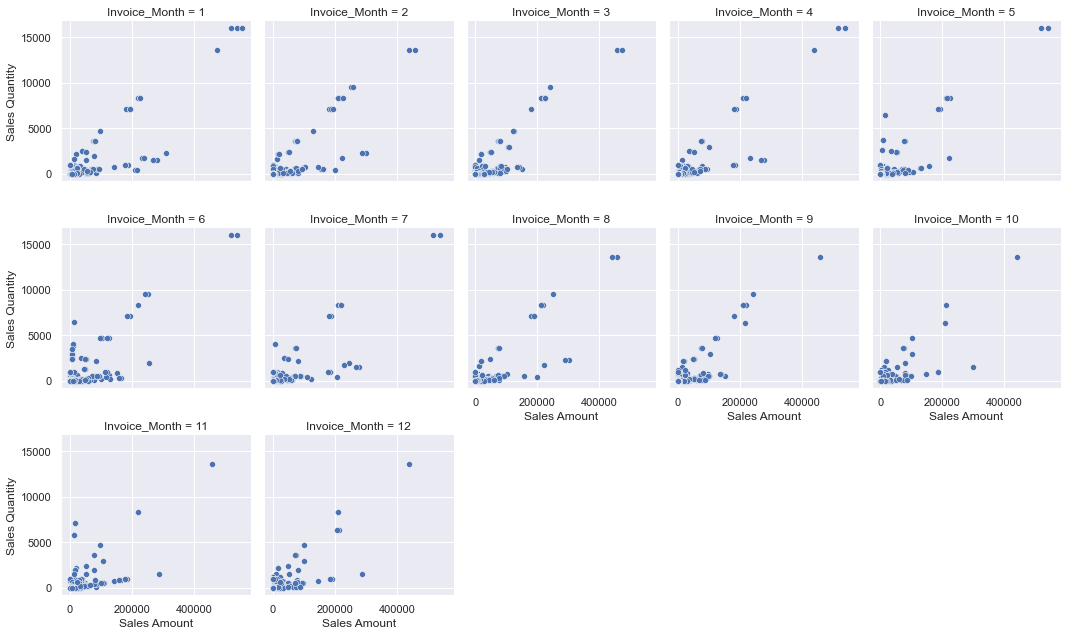

In [41]:
sns.relplot(y ='Sales Quantity',x = 'Sales Amount', data=sales_data02,height = 3,aspect=1,
            col = 'Invoice_Month',col_wrap=5, palette='muted')

**************************************************Monthly Sales Trend in 2017**************************************************


<Figure size 576x1440 with 0 Axes>

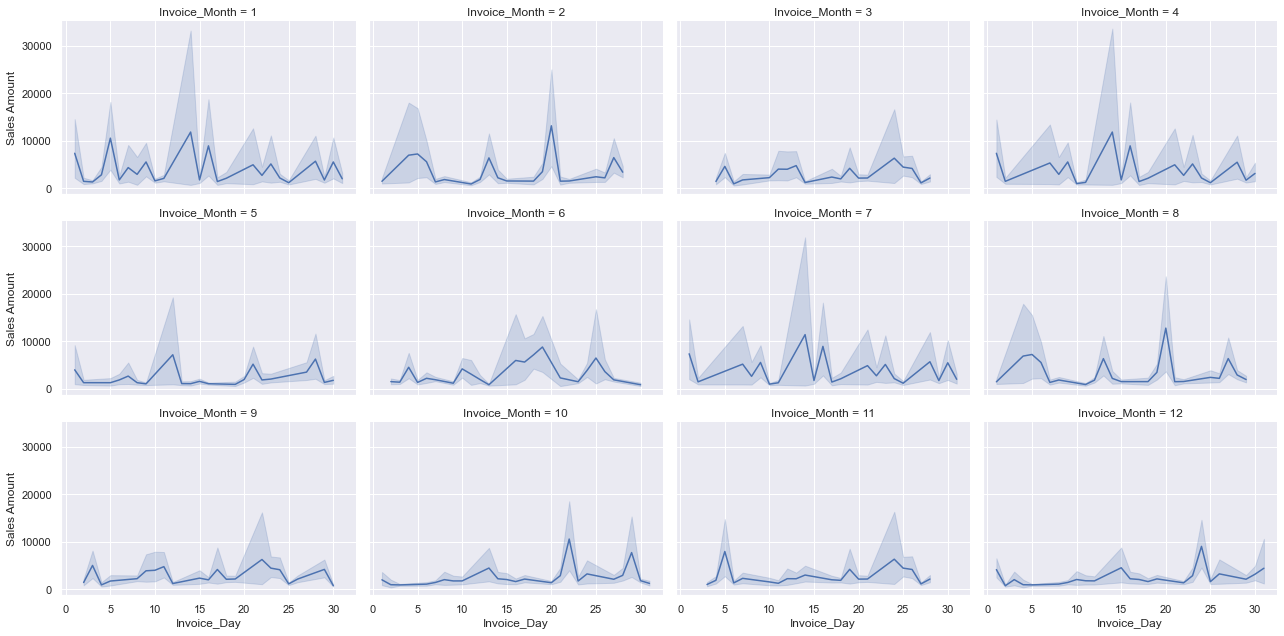

In [42]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Invoice_Day',y = 'Sales Amount', data= sales_data02.query('Invoice_Year == 2017'),
            kind = 'line', col = 'Invoice_Month', col_wrap =4, height = 3, aspect = 1.5)
plt.ylabel('Sales Amount')
print('*'*50+'Monthly Sales Trend in 2017'+'*'*50)

**********************************************Monthly Sales Quantity Trend in 2017**********************************************


<Figure size 576x1440 with 0 Axes>

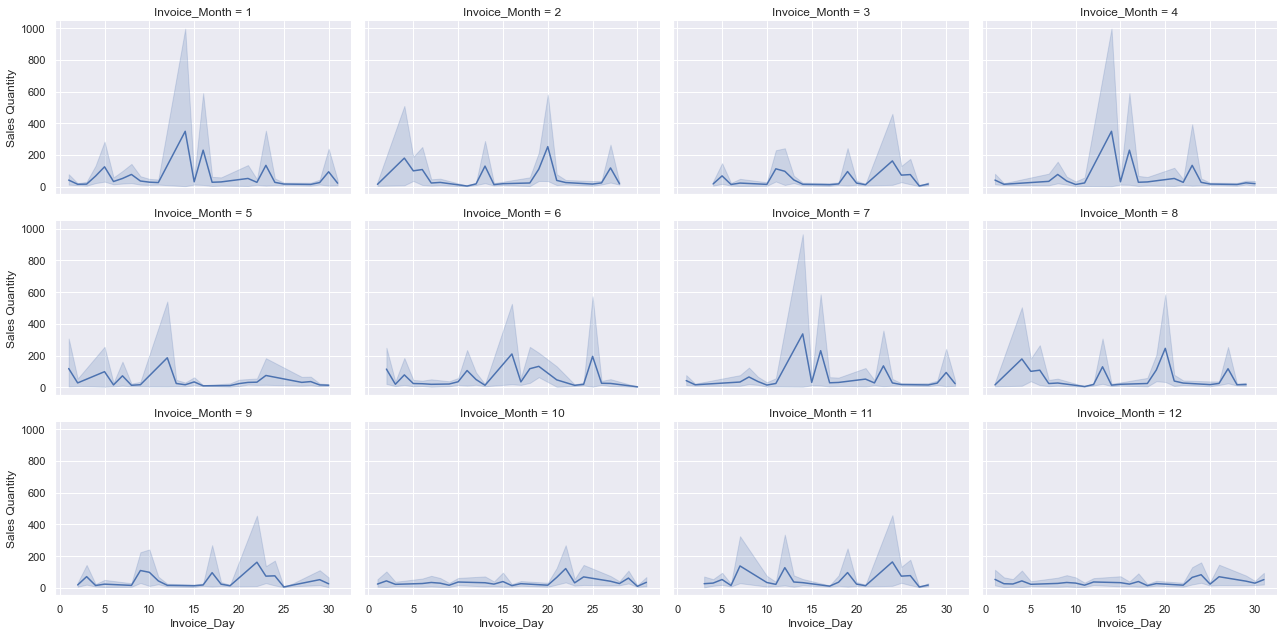

In [43]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Invoice_Day',y = 'Sales Quantity', data= sales_data02.query('Invoice_Year == 2017'),
            kind = 'line', col = 'Invoice_Month', col_wrap =4, height = 3, aspect = 1.5)
plt.ylabel('Sales Amount')
print('*'*46+'Monthly Sales Quantity Trend in 2017'+'*'*46)

****************************************Daily Total Sales Trend per Month in 2017****************************************


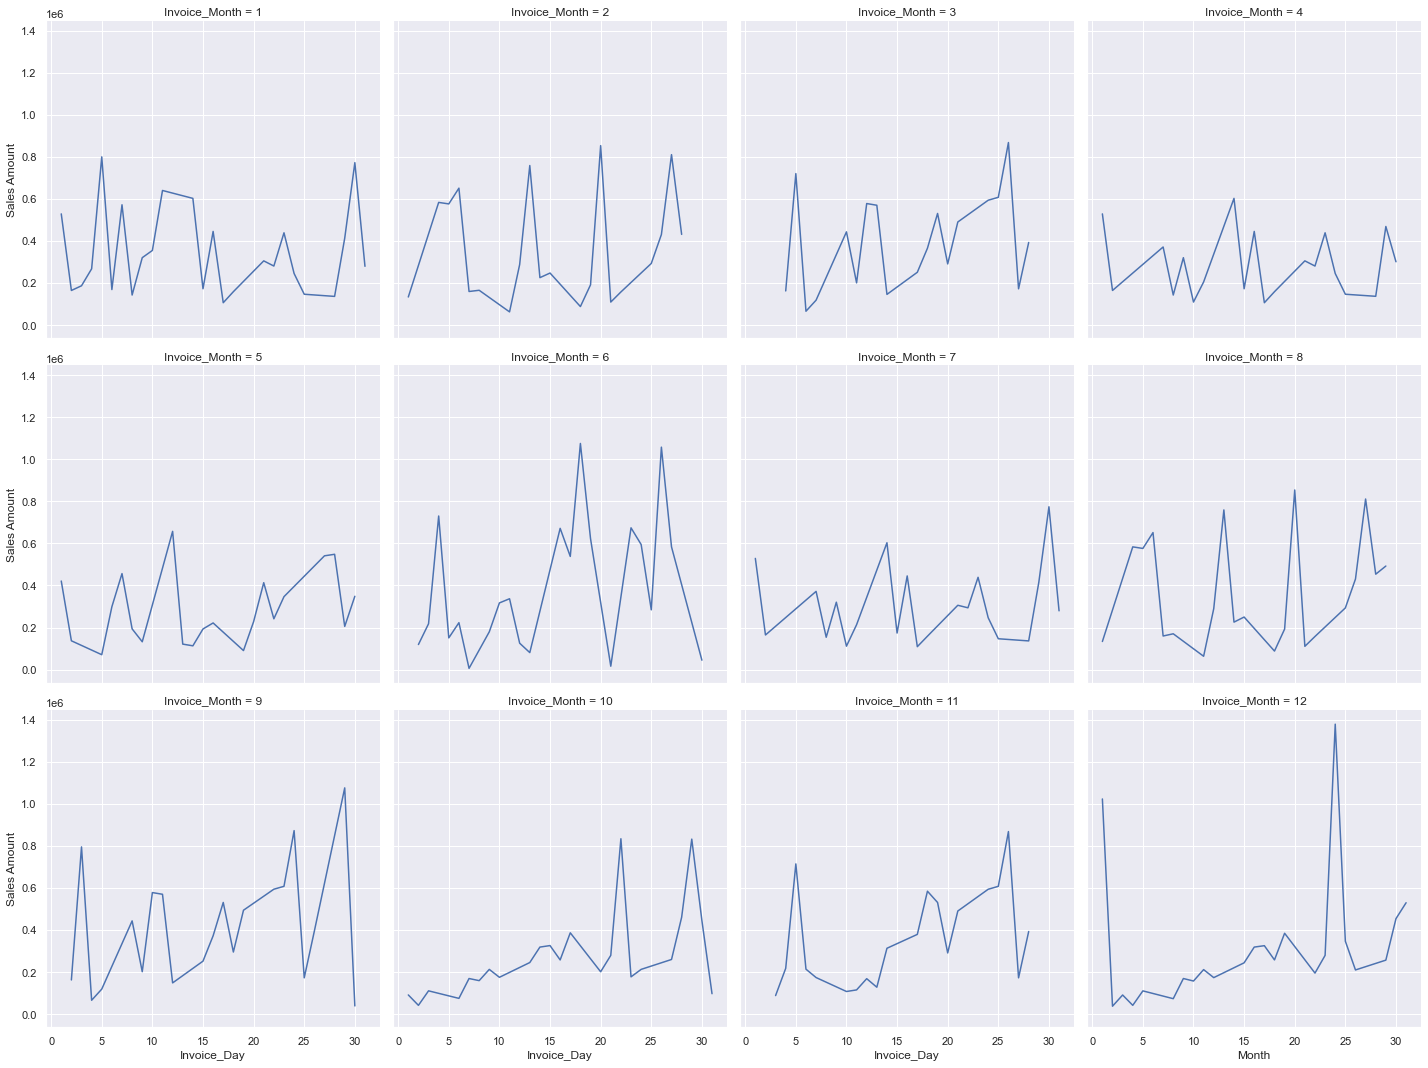

In [44]:
sns.relplot(x ='Invoice_Day',y = 'Sales Amount', data=Monthly_sales.query('Invoice_Year == 2017'),
            kind = 'line', aspect = 1, col = 'Invoice_Month', col_wrap = 4)
plt.xlabel('Month')
plt.ylabel('Sales Amount')
print('*'*40+'Daily Total Sales Trend per Month in 2017'+'*'*40)

**************************************************Monthly Sales Trend in 2018**************************************************


<Figure size 576x1440 with 0 Axes>

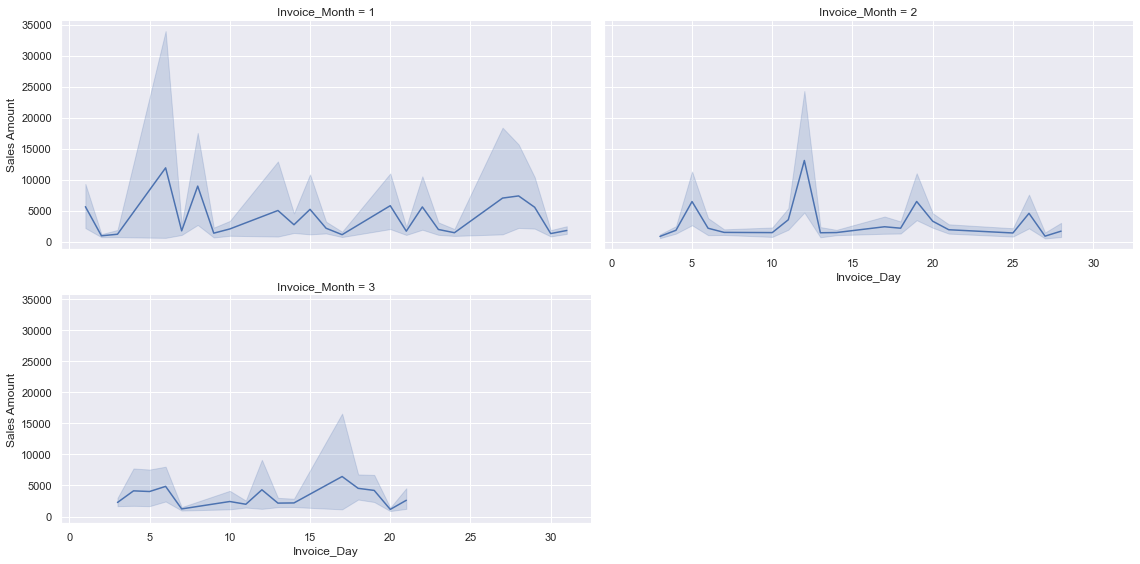

In [45]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Invoice_Day',y = 'Sales Amount', data= sales_data02.query('Invoice_Year == 2018'),
            kind = 'line', col = 'Invoice_Month', col_wrap =2, height = 4, aspect = 2)
plt.ylabel('Sales Amount')
print('*'*50+'Monthly Sales Trend in 2018'+'*'*50)

*********************************************Monthly Sales Quantity Trend in 2018*********************************************


<Figure size 576x1440 with 0 Axes>

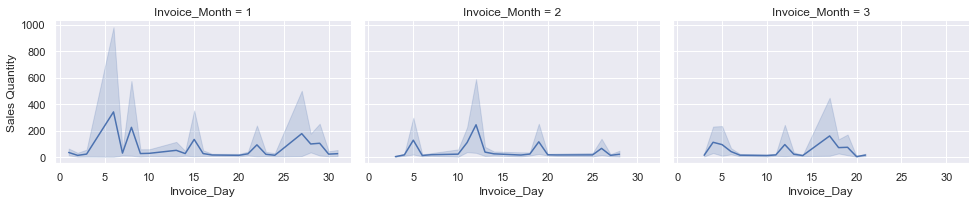

In [46]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Invoice_Day',y = 'Sales Quantity', data= sales_data02.query('Invoice_Year == 2018'),
            kind = 'line', col = 'Invoice_Month', col_wrap =4, height = 3, aspect = 1.5)
plt.ylabel('Sales Amount')
print('*'*45+'Monthly Sales Quantity Trend in 2018'+'*'*45)

****************************************Daily Total Sales Trend per Month in 2018****************************************


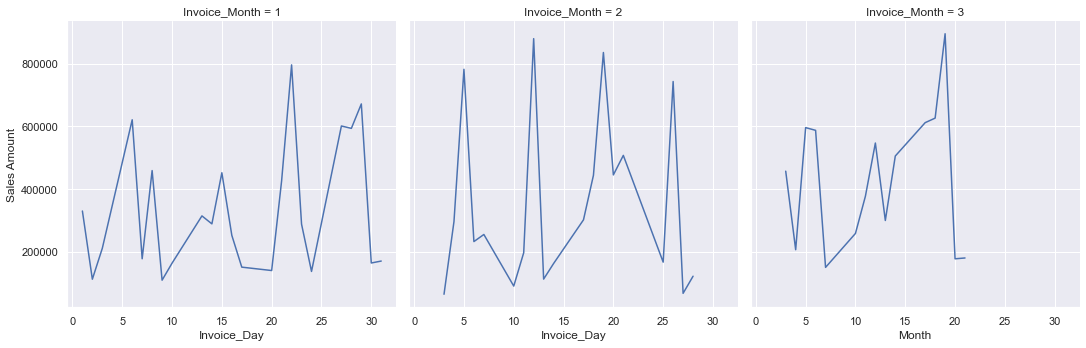

In [47]:
sns.relplot(x ='Invoice_Day',y = 'Sales Amount', data=Monthly_sales.query('Invoice_Year == 2018'),
            kind = 'line', aspect = 1, col = 'Invoice_Month', col_wrap = 4)
plt.xlabel('Month')
plt.ylabel('Sales Amount')
print('*'*40+'Daily Total Sales Trend per Month in 2018'+'*'*40)

**************************************************Monthly Sales Trend in 2019**************************************************


<Figure size 576x1440 with 0 Axes>

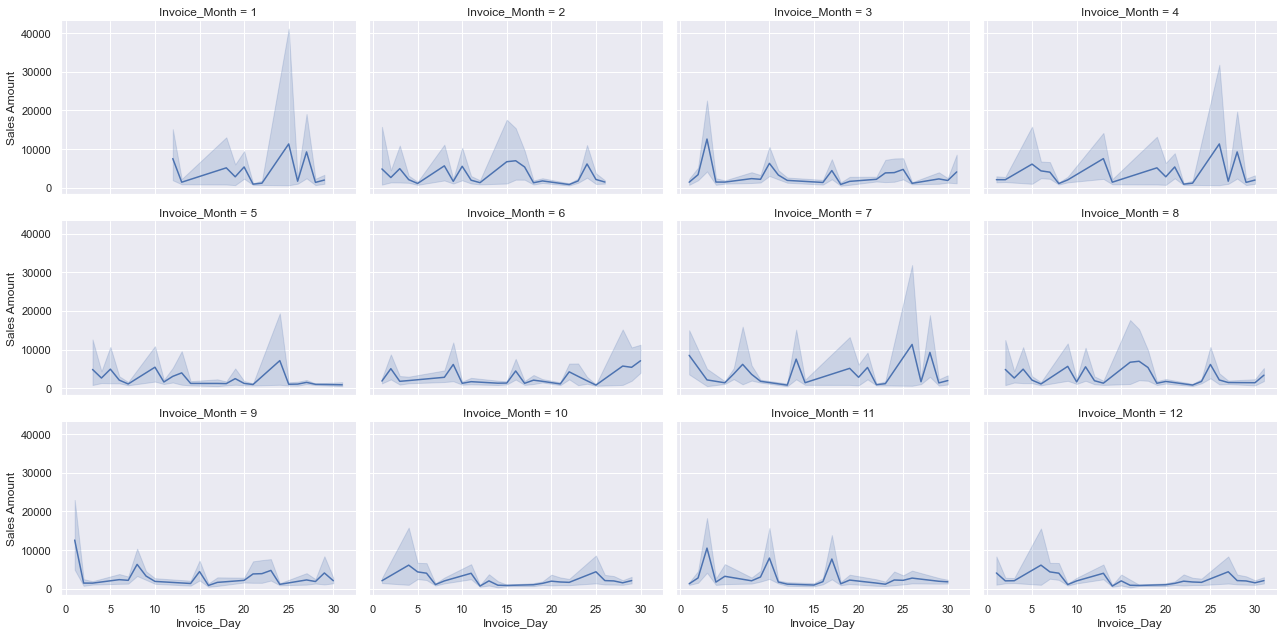

In [48]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Invoice_Day',y = 'Sales Amount', data= sales_data02.query('Invoice_Year == 2019'),
            kind = 'line', col = 'Invoice_Month', col_wrap =4, height = 3, aspect = 1.5)
plt.ylabel('Sales Amount')
print('*'*50+'Monthly Sales Trend in 2019'+'*'*50)

*******************************************Monthly Sales Quantity Trend in 2019*********************************************


<Figure size 576x1440 with 0 Axes>

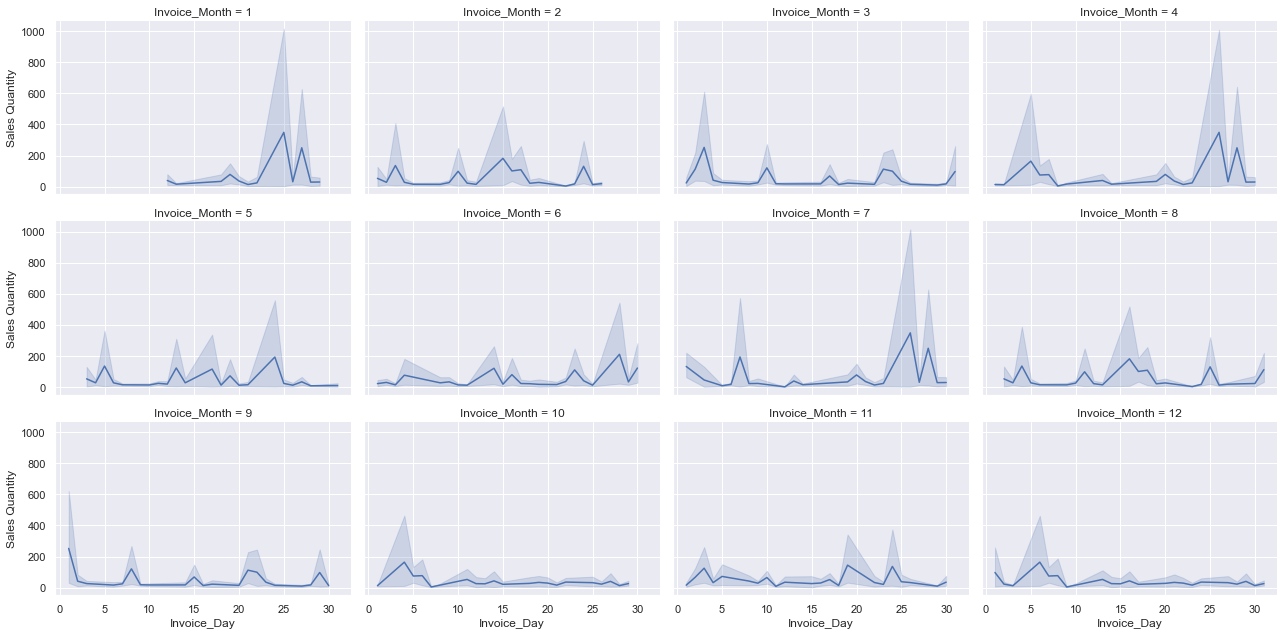

In [49]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Invoice_Day',y = 'Sales Quantity', data= sales_data02.query('Invoice_Year == 2019'),
            kind = 'line', col = 'Invoice_Month', col_wrap =4, height = 3, aspect = 1.5)
plt.ylabel('Sales Amount')
print('*'*43+'Monthly Sales Quantity Trend in 2019'+'*'*45)

****************************************Daily Total Sales Trend per Month in 2018****************************************


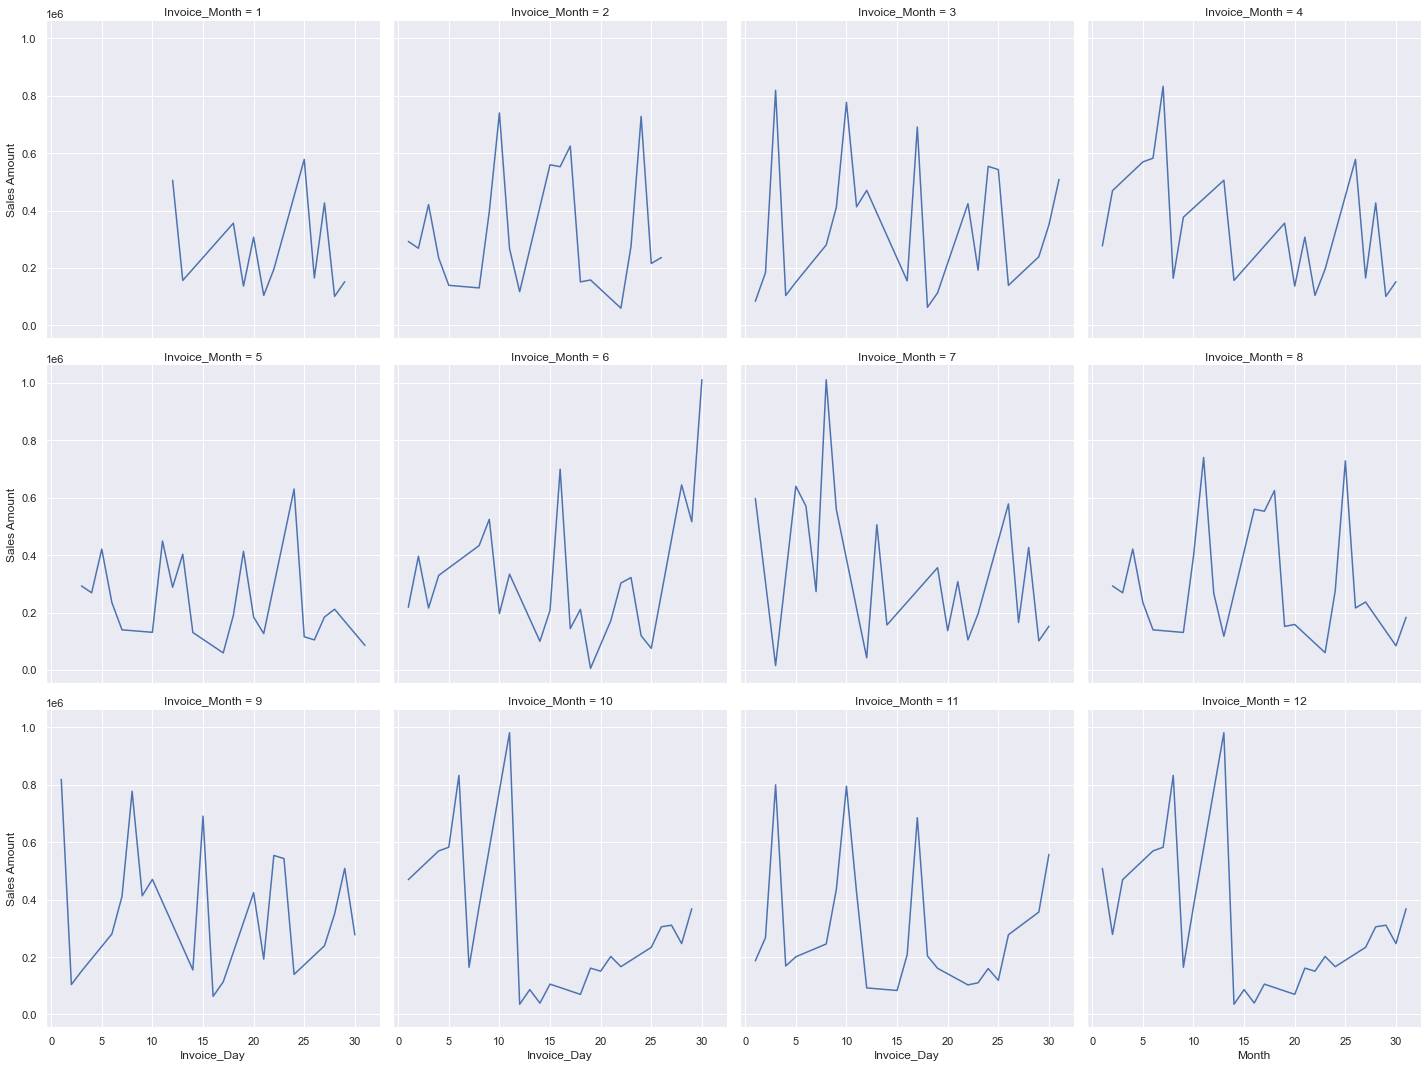

In [50]:
sns.relplot(x ='Invoice_Day',y = 'Sales Amount', data=Monthly_sales.query('Invoice_Year == 2019'),
            kind = 'line', aspect = 1, col = 'Invoice_Month', col_wrap = 4)
plt.xlabel('Month')
plt.ylabel('Sales Amount')
print('*'*40+'Daily Total Sales Trend per Month in 2018'+'*'*40)

----------------------------------------Monthly Quantity Purchased Trend in 2017----------------------------------------


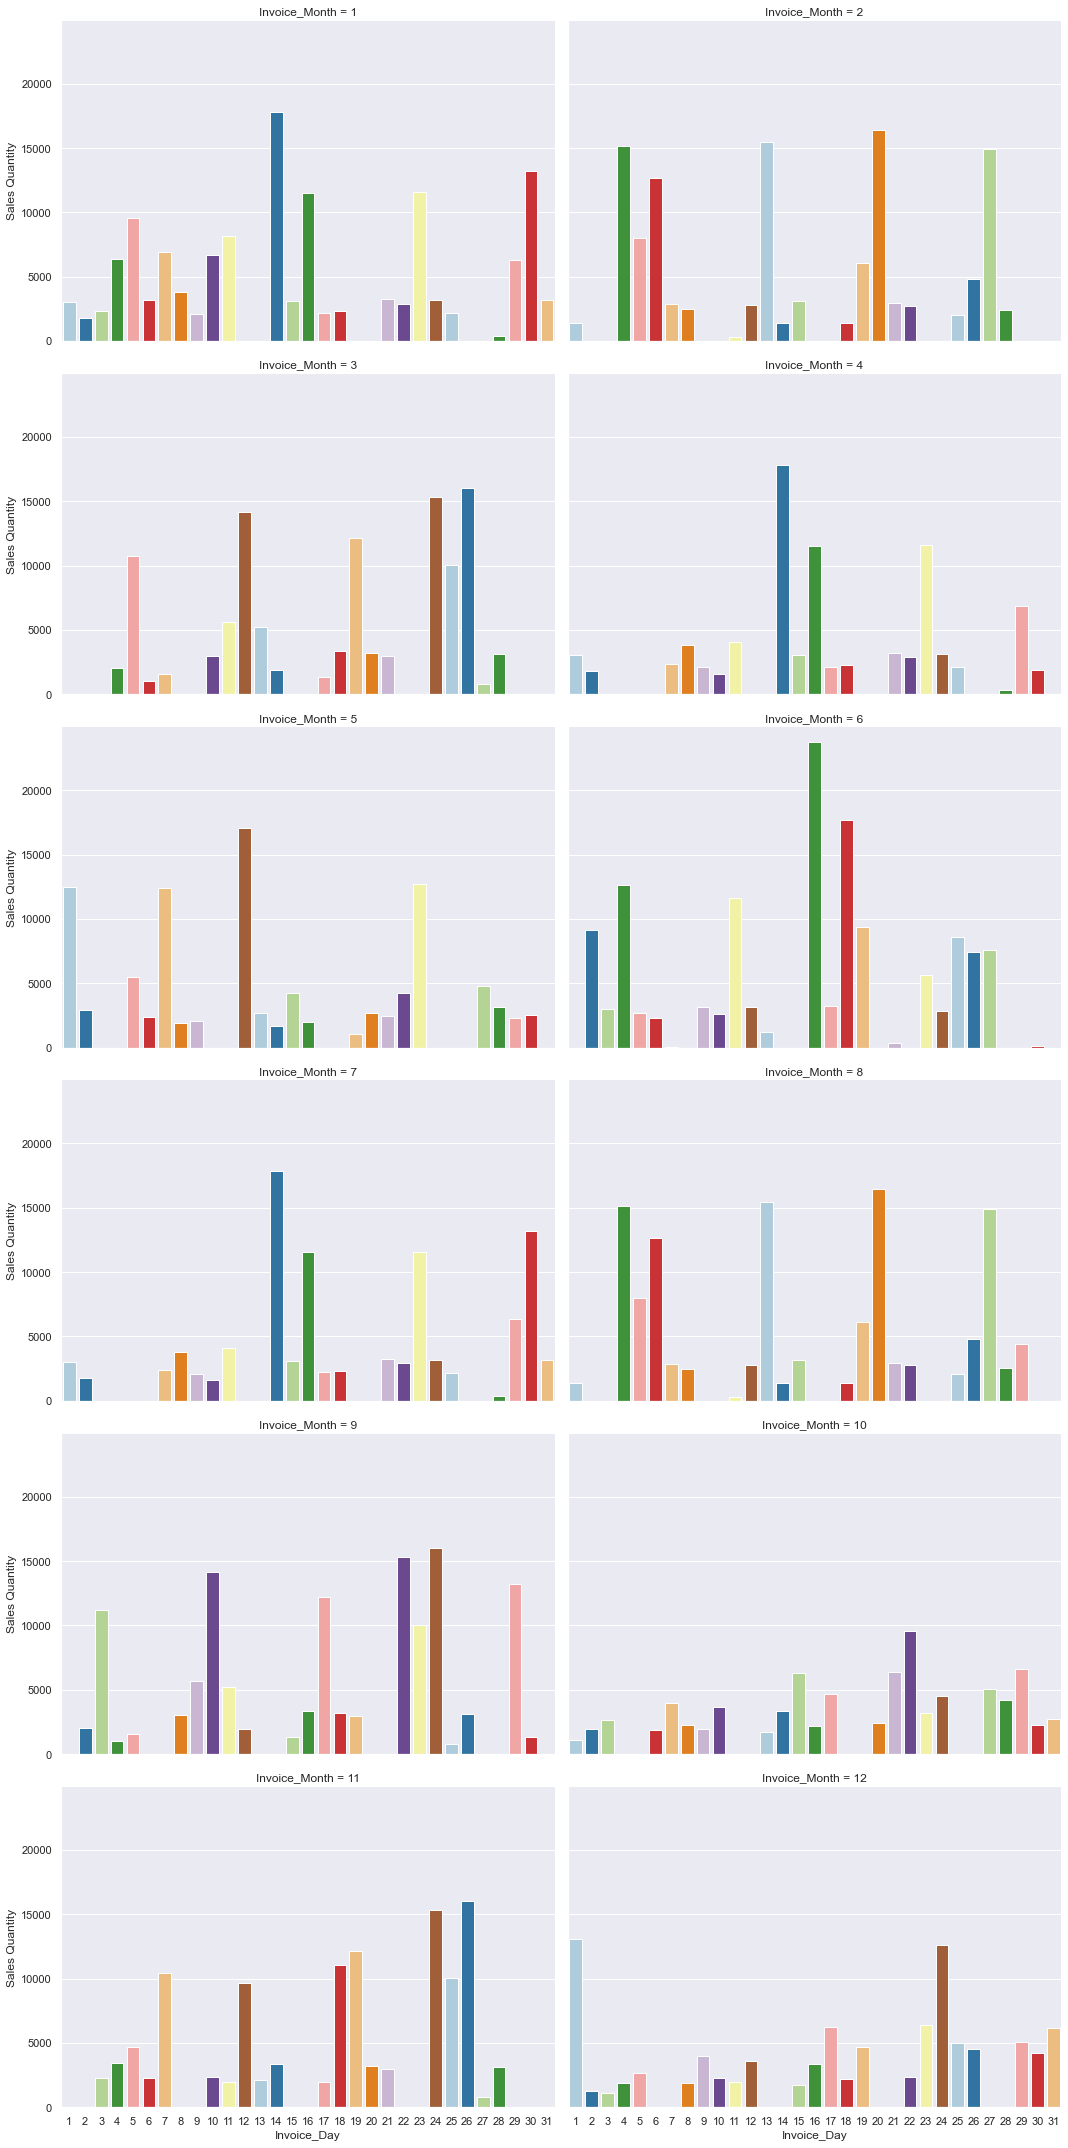

In [51]:
sns.catplot(y = 'Sales Quantity', x = 'Invoice_Day', data = Monthly_sales[Monthly_sales['Invoice_Year'] == 2017], aspect=1.5,
            palette='Paired',kind="bar",col='Invoice_Month', col_wrap=2)
print('-'*40+'Monthly Quantity Purchased Trend in 2017'+'-'*40)

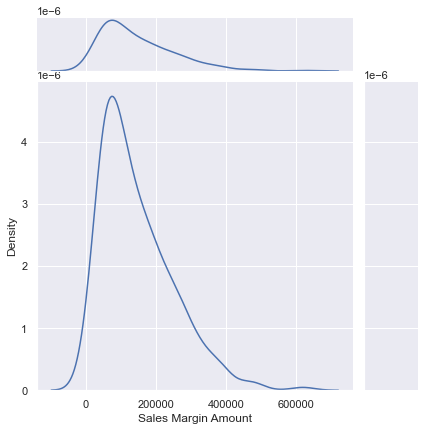

In [52]:
sns.jointplot(x='Sales Margin Amount',data=Monthly_sales[Monthly_sales["Invoice_Year"] ==2017],ratio=5,kind='kde')

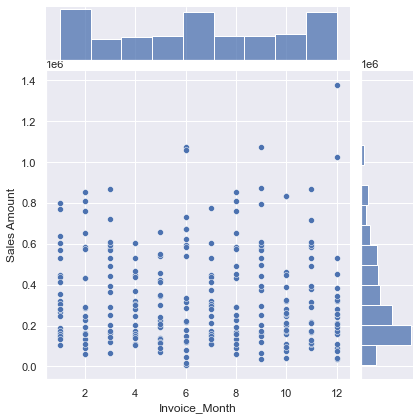

In [53]:
sns.jointplot(x = 'Invoice_Month', y='Sales Amount', data=Monthly_sales[Monthly_sales["Invoice_Year"] ==2017])

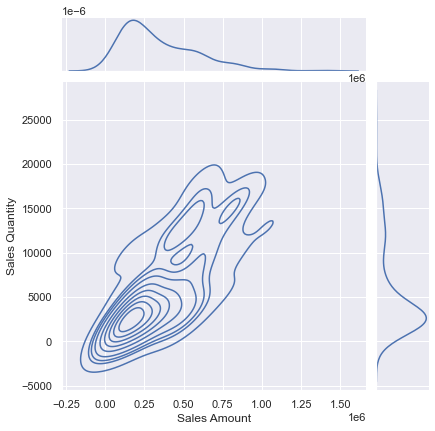

In [54]:
sns.jointplot(y = 'Sales Quantity', x='Sales Amount',
              data=Monthly_sales[Monthly_sales["Invoice_Year"] ==2017], kind='kde')

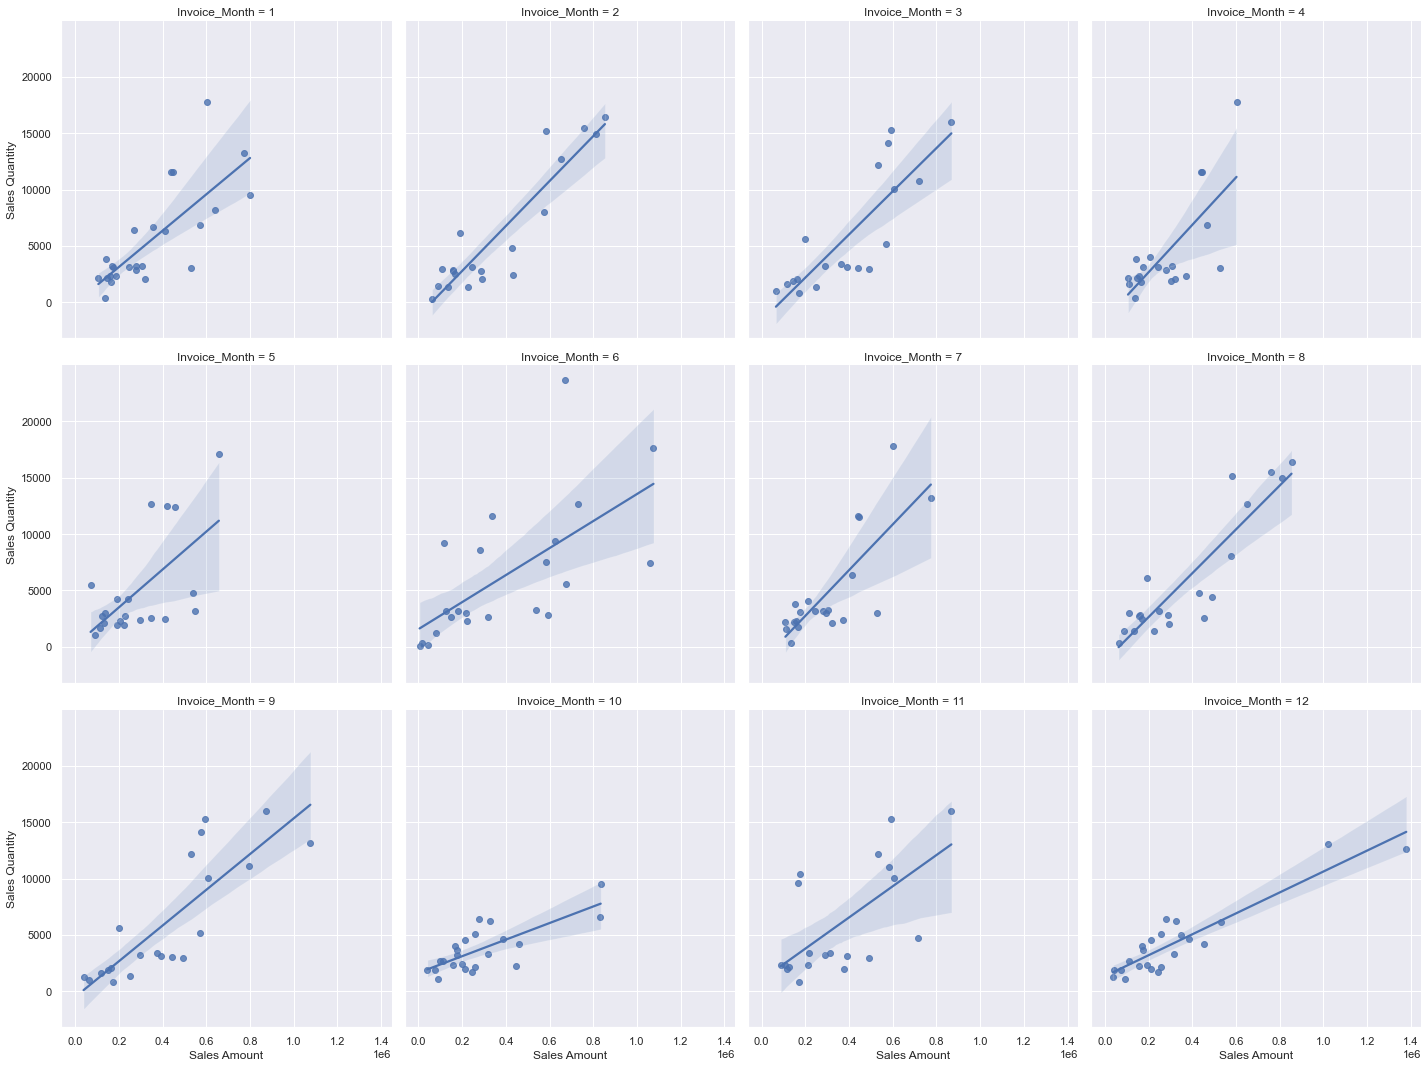

In [55]:
sns.lmplot(x='Sales Amount',y = 'Sales Quantity', 
              data=Monthly_sales[Monthly_sales["Invoice_Year"] ==2017], col='Invoice_Month', col_wrap=4)

--------------------------------------------Monthly Sales Amount Trend in 2017--------------------------------------------


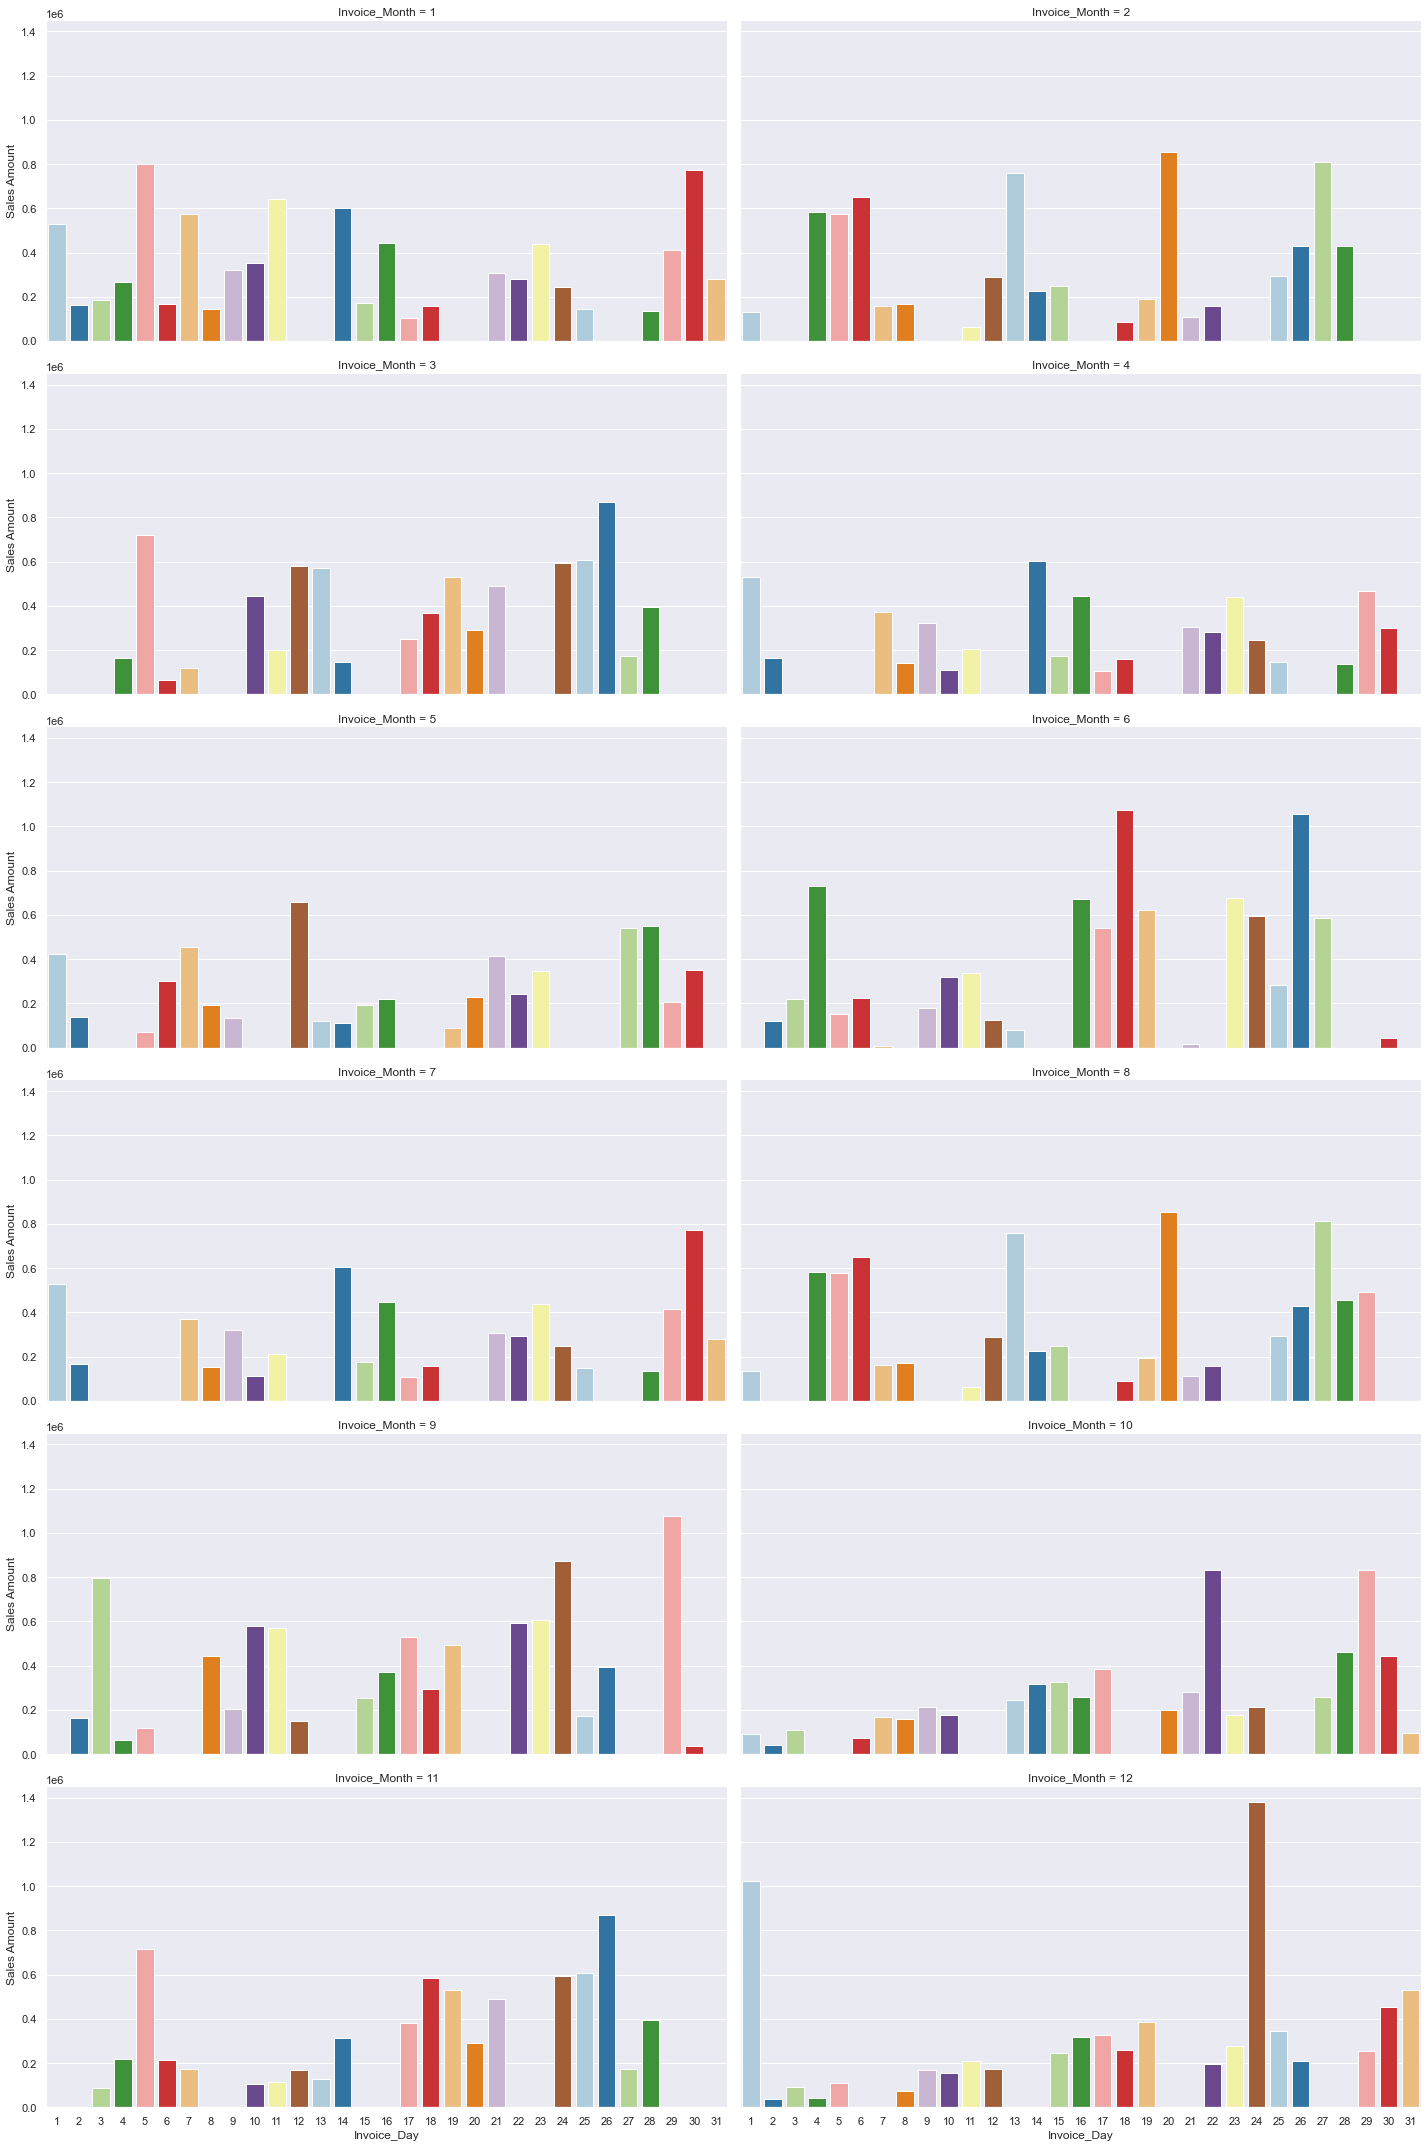

In [56]:
sns.catplot(y = 'Sales Amount', x = 'Invoice_Day', data = Monthly_sales[Monthly_sales['Invoice_Year'] == 2017], aspect=2,
            palette='Paired',kind="bar",col='Invoice_Month', col_wrap=2)
print('-'*44+'Monthly Sales Amount Trend in 2017'+'-'*44)

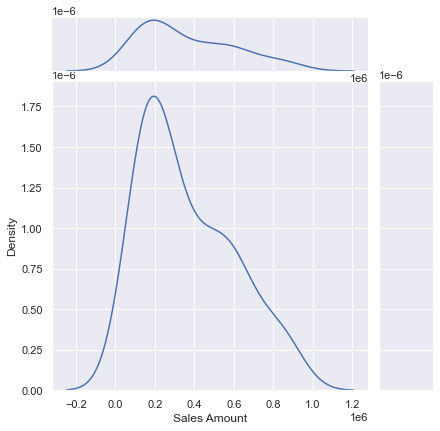

In [57]:
sns.jointplot(x='Sales Amount',data=Monthly_sales[Monthly_sales["Invoice_Year"] ==2018],ratio=5,kind='kde')

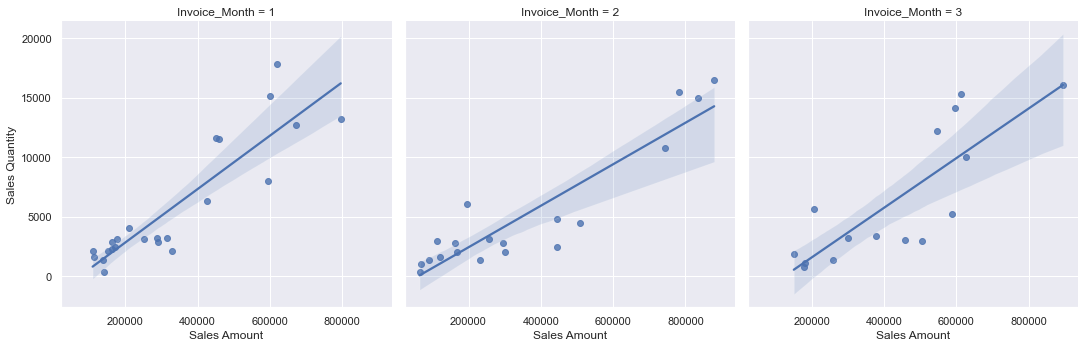

In [58]:
sns.lmplot(x='Sales Amount',y = 'Sales Quantity', 
              data=Monthly_sales[Monthly_sales["Invoice_Year"] ==2018], col='Invoice_Month', col_wrap=4)

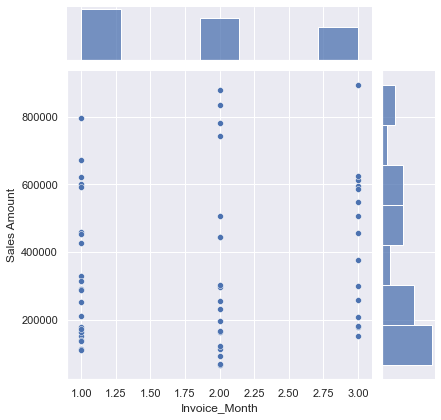

In [59]:
sns.jointplot(x = 'Invoice_Month', y='Sales Amount', data=Monthly_sales[Monthly_sales["Invoice_Year"] ==2018])

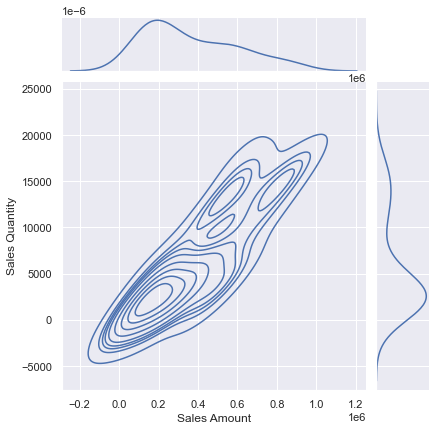

In [60]:
sns.jointplot(y = 'Sales Quantity', x='Sales Amount',
              data=Monthly_sales[Monthly_sales["Invoice_Year"] ==2018], kind='kde')

----------------------------------------Monthly Quantity Purchased Trend in 2018----------------------------------------


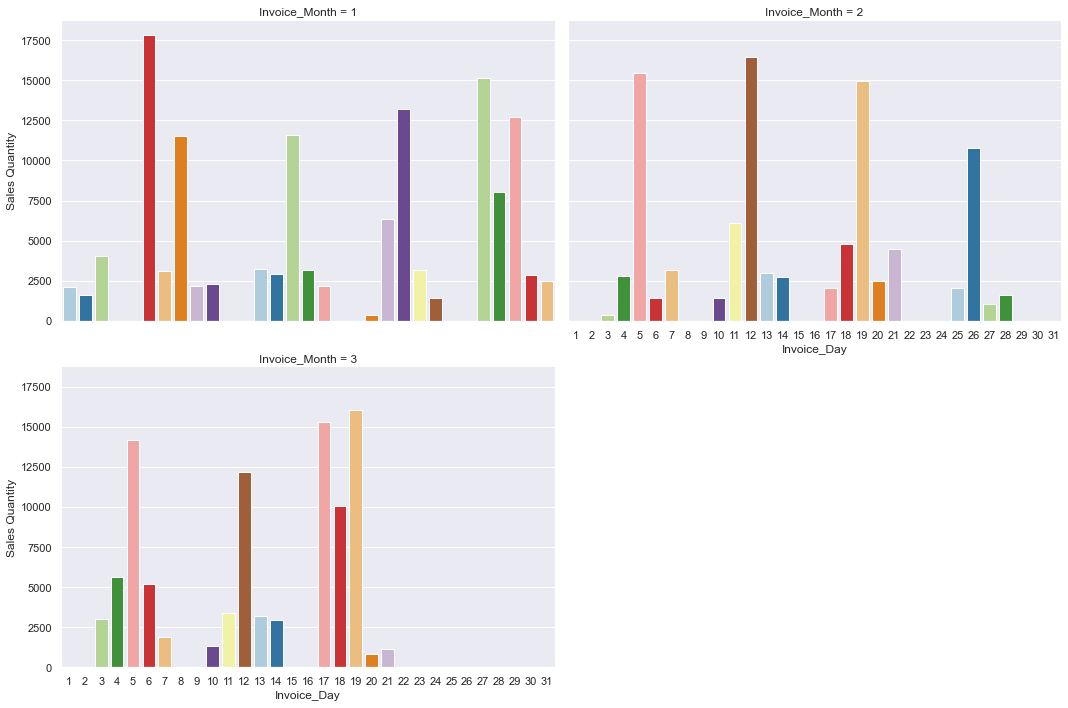

In [61]:
sns.catplot(y = 'Sales Quantity', x = 'Invoice_Day', data = Monthly_sales[Monthly_sales['Invoice_Year'] == 2018], aspect=1.5,
            palette='Paired',kind="bar",col='Invoice_Month', col_wrap=2)
print('-'*40+'Monthly Quantity Purchased Trend in 2018'+'-'*40)

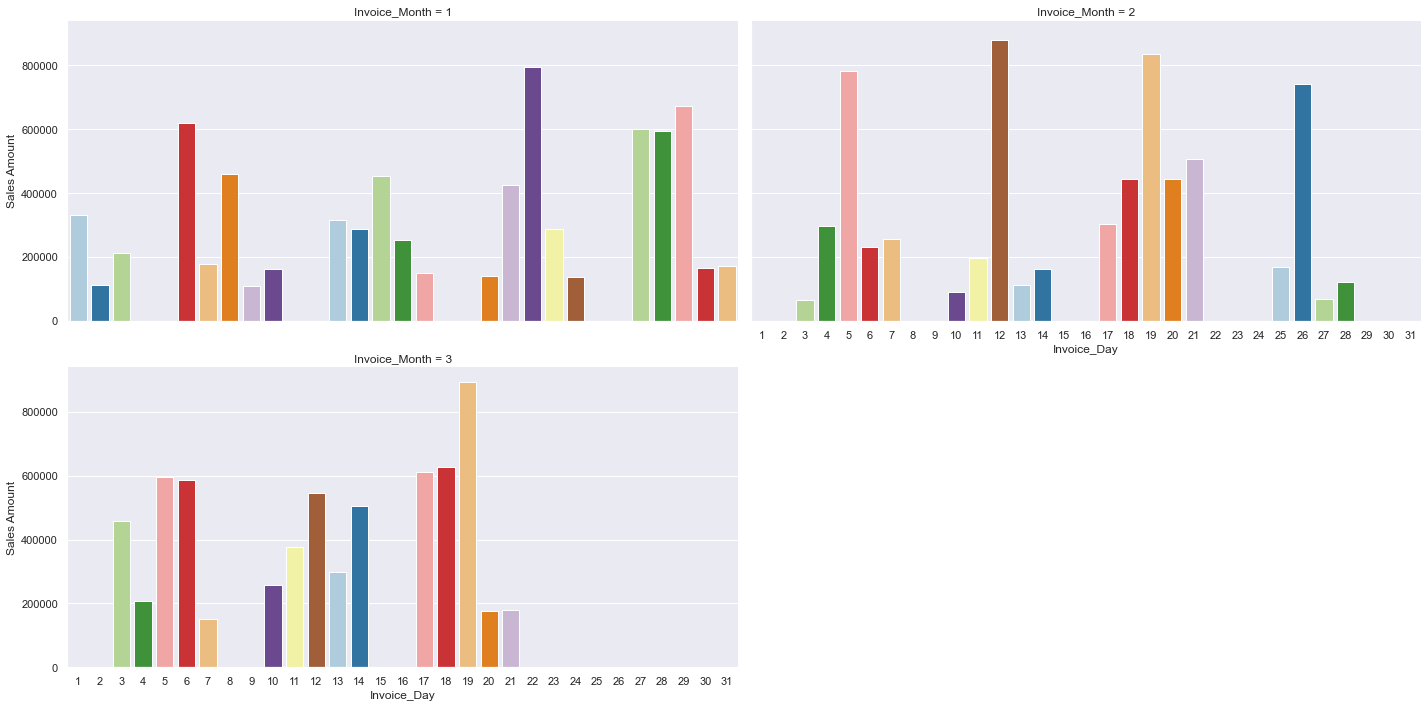

In [62]:
sns.catplot(y = 'Sales Amount', x = 'Invoice_Day', data = Monthly_sales[Monthly_sales['Invoice_Year'] == 2018], aspect=2,
            palette='Paired',kind="bar",col='Invoice_Month', col_wrap=2)

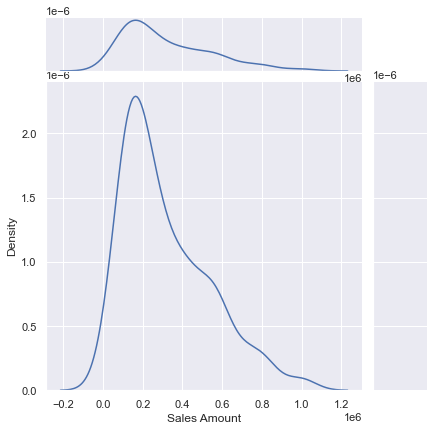

In [63]:
sns.jointplot(x='Sales Amount',data=Monthly_sales[Monthly_sales["Invoice_Year"] ==2019],ratio=5,kind='kde')

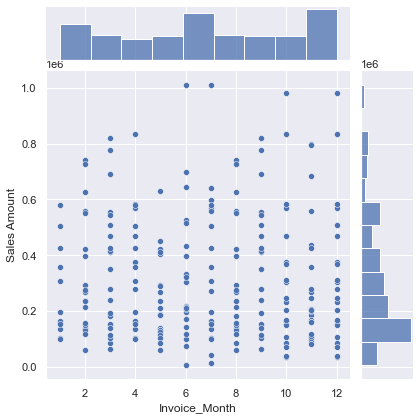

In [64]:
sns.jointplot(x = 'Invoice_Month', y='Sales Amount', data=Monthly_sales[Monthly_sales["Invoice_Year"] ==2019])

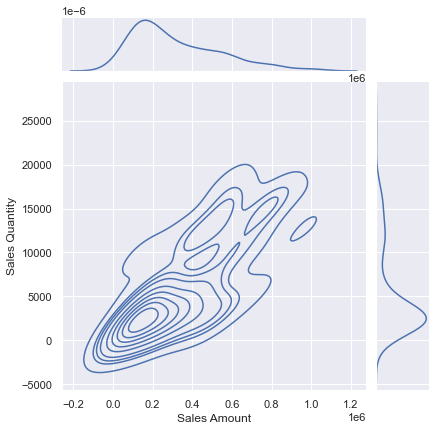

In [65]:
sns.jointplot(y = 'Sales Quantity', x='Sales Amount',
              data=Monthly_sales[Monthly_sales["Invoice_Year"] ==2019], kind='kde')

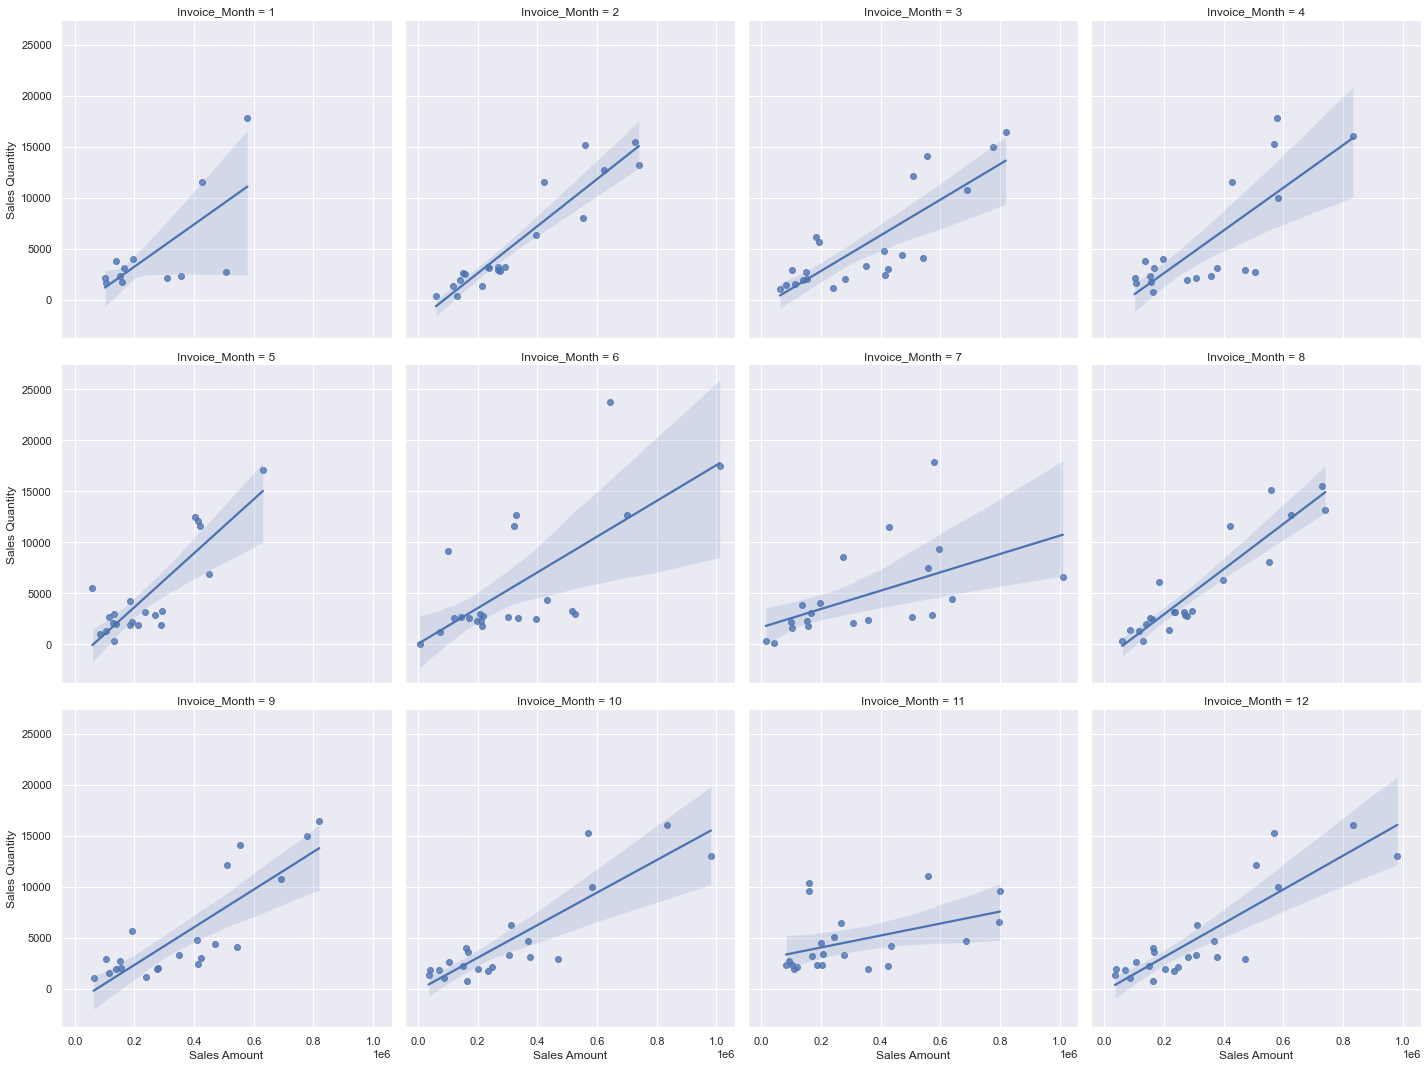

In [66]:
sns.lmplot(x='Sales Amount',y = 'Sales Quantity', 
              data=Monthly_sales[Monthly_sales["Invoice_Year"] ==2019], col='Invoice_Month', col_wrap=4)

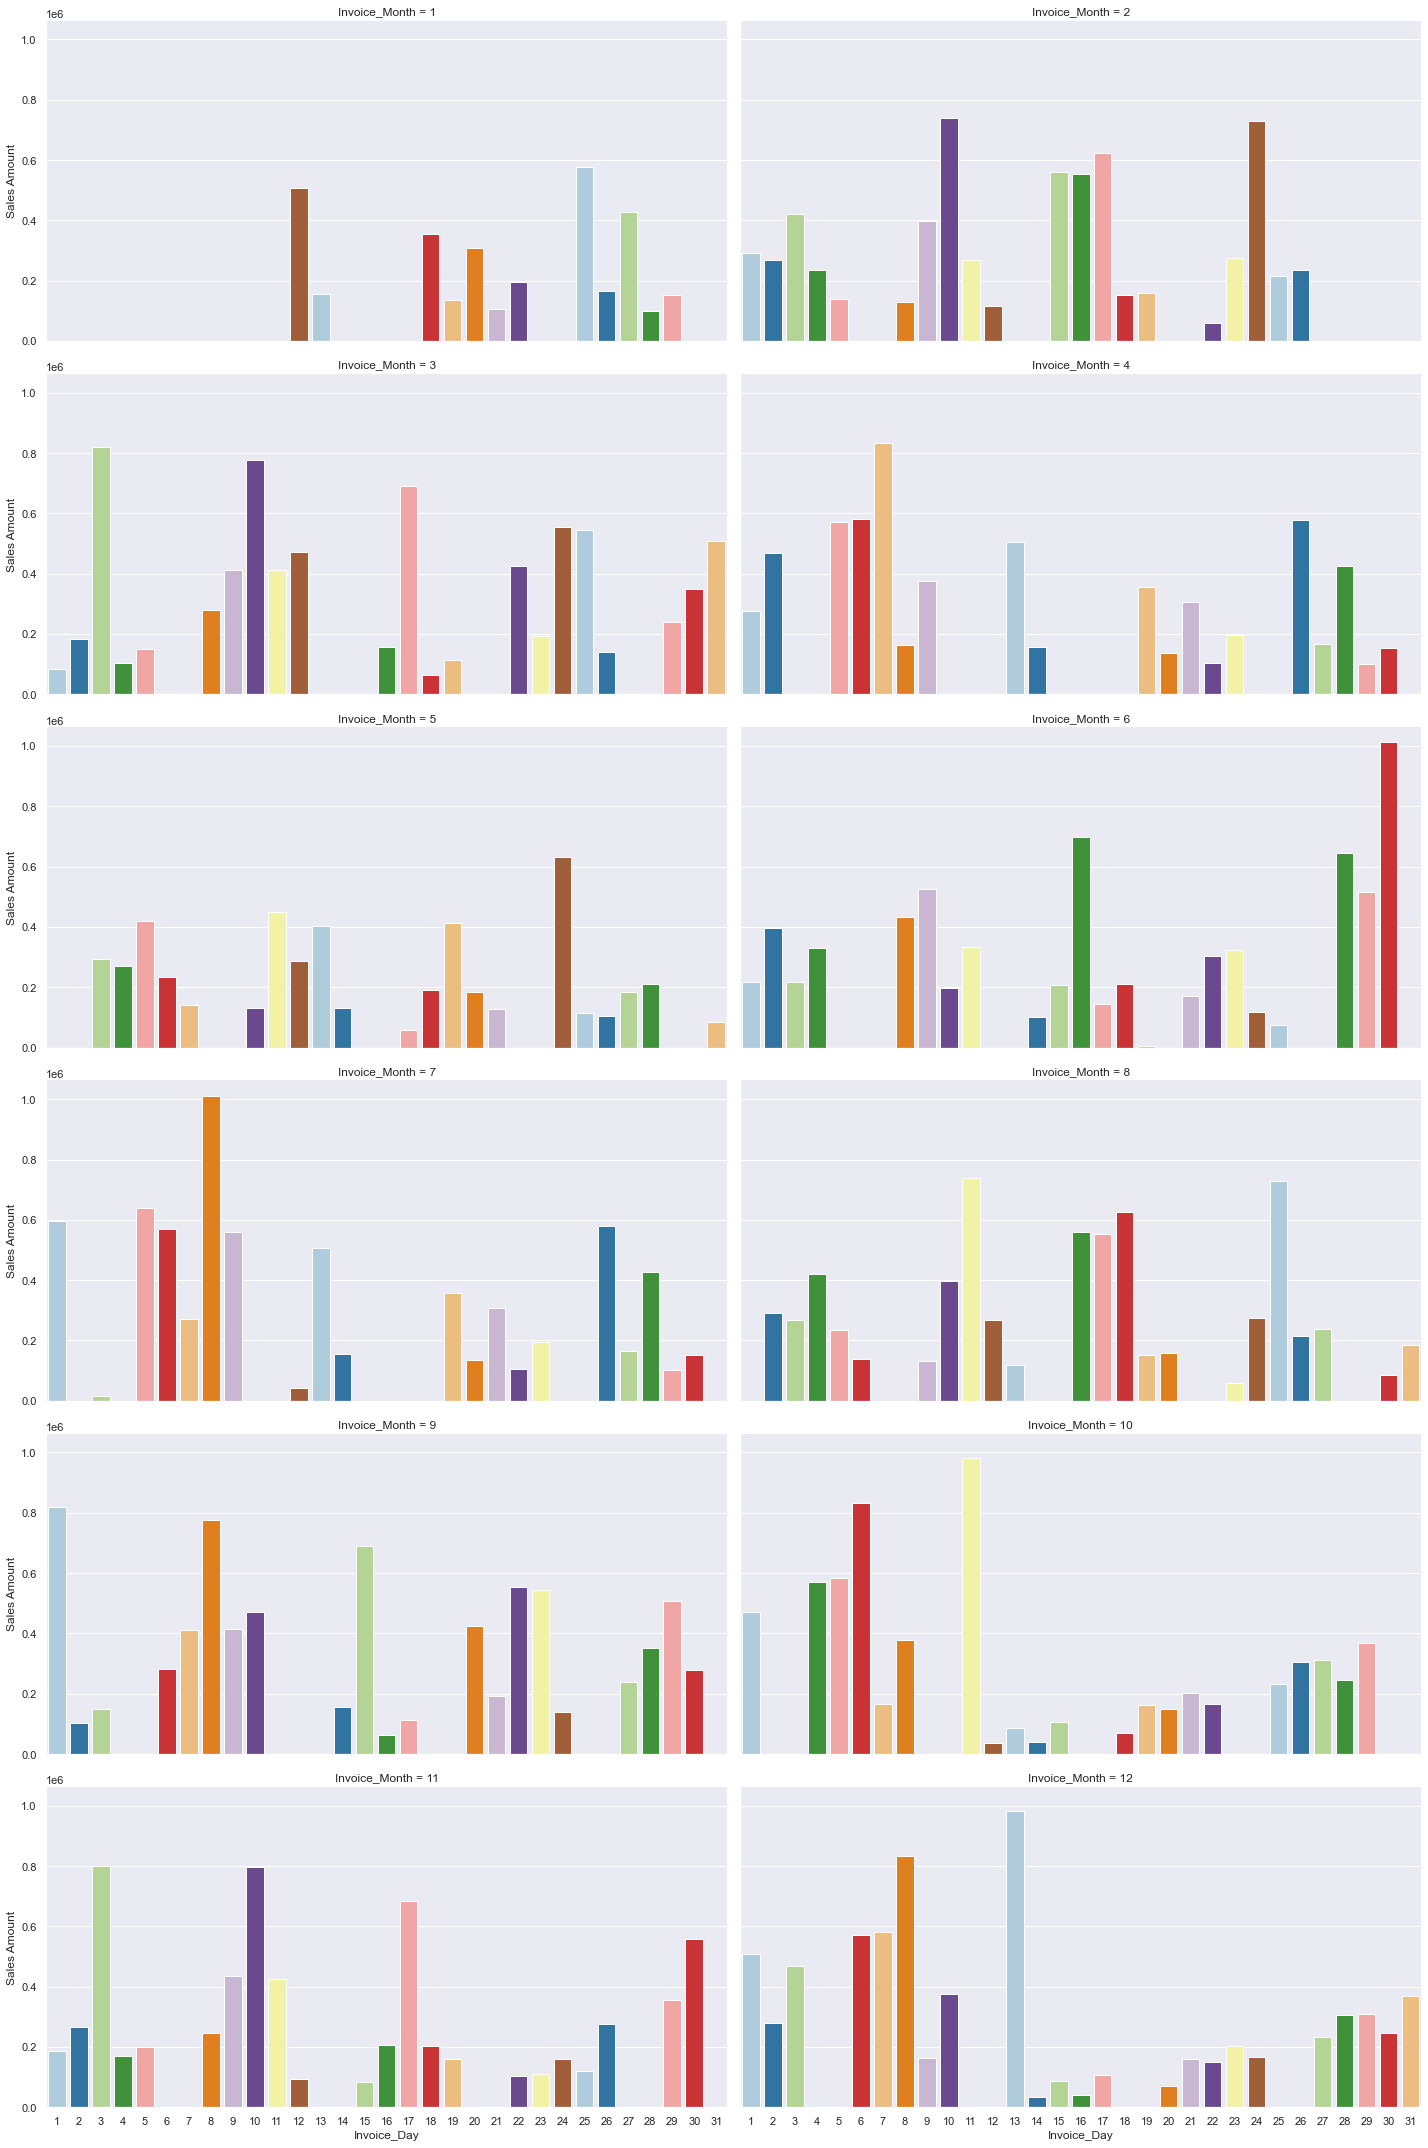

In [67]:
sns.catplot(y = 'Sales Amount', x = 'Invoice_Day', data = Monthly_sales[Monthly_sales['Invoice_Year'] == 2019], aspect=2,
            palette='Paired',kind="bar",col='Invoice_Month', col_wrap=2)

----------------------------------------Monthly Quantity Purchased Trend in 2019----------------------------------------


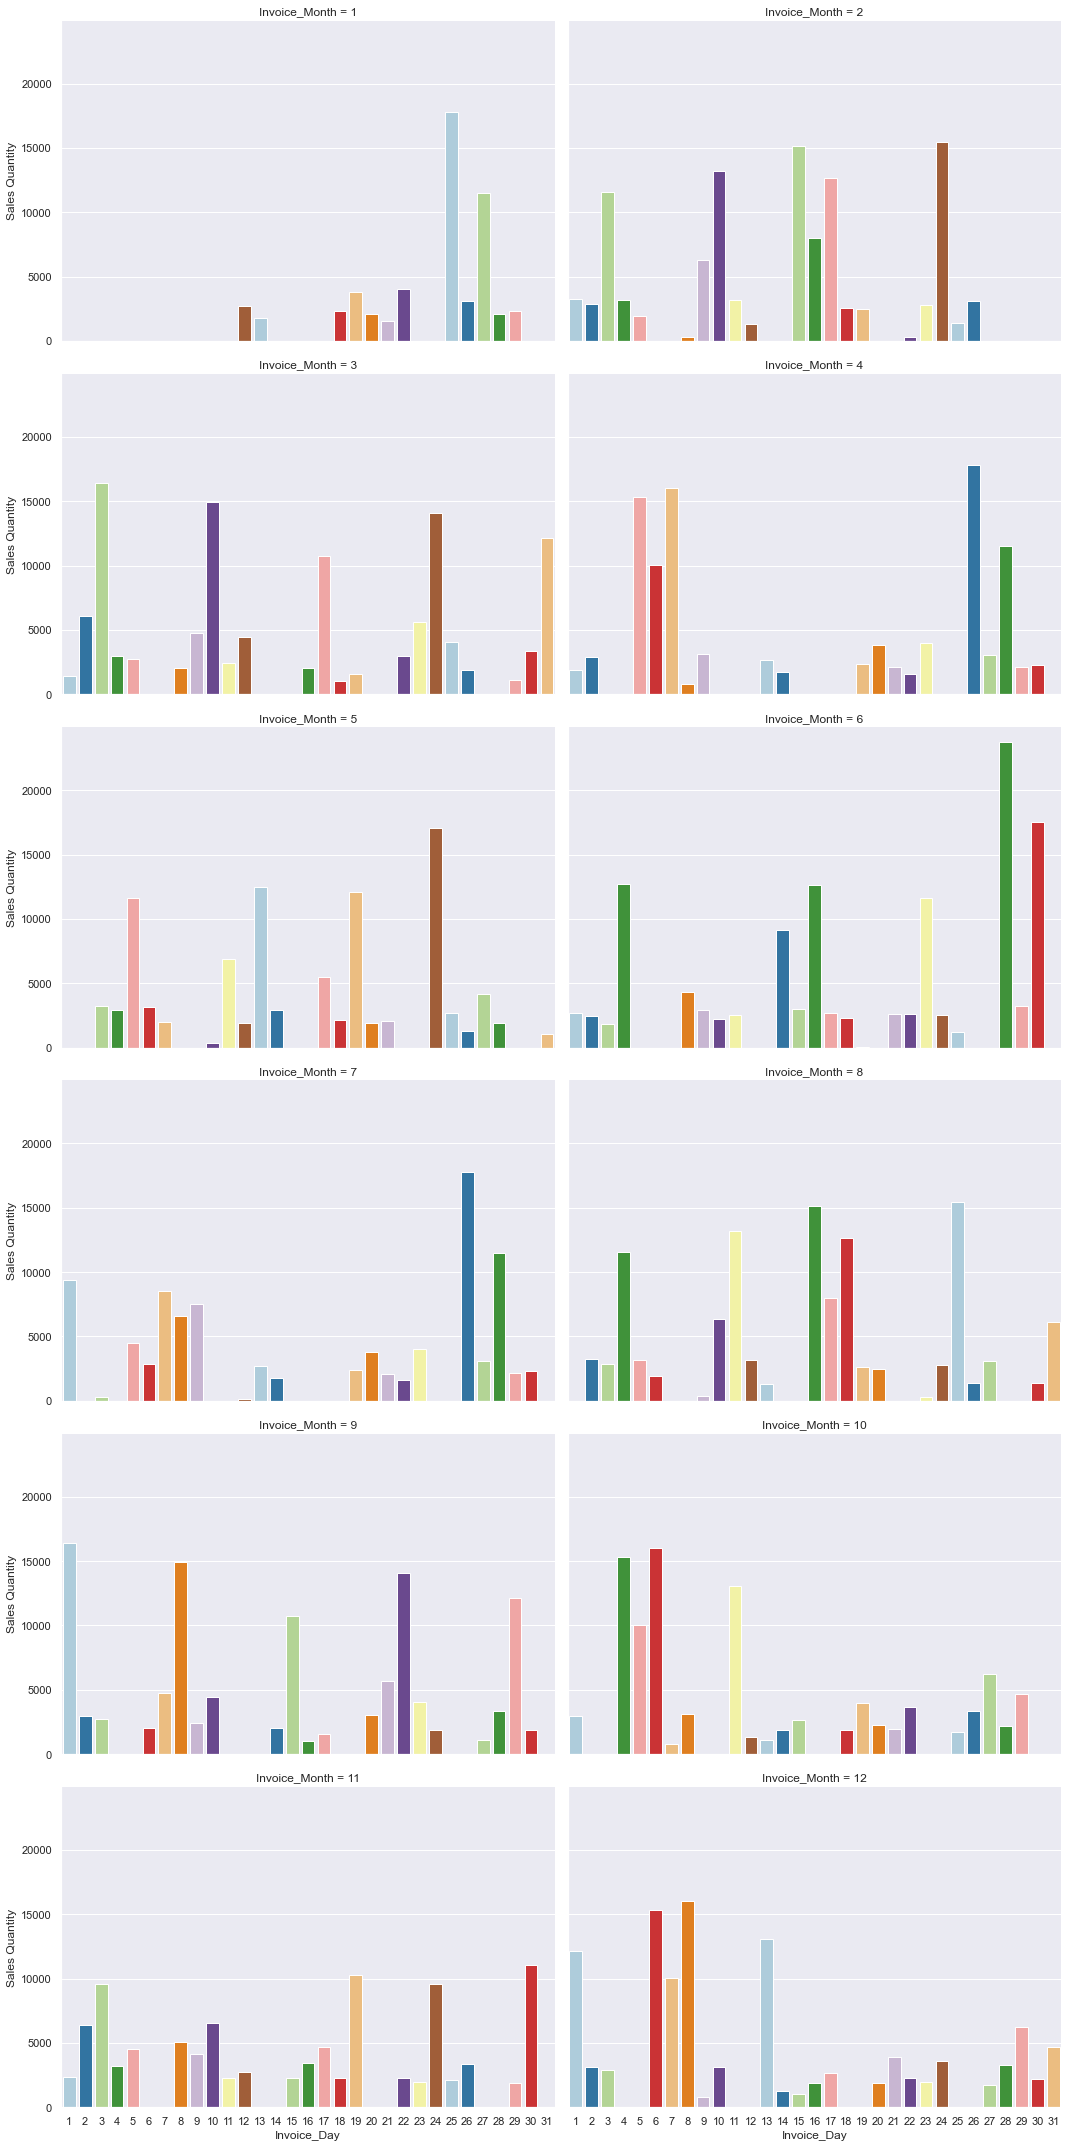

In [68]:
sns.catplot(y = 'Sales Quantity', x = 'Invoice_Day', data = Monthly_sales[Monthly_sales['Invoice_Year'] == 2019], aspect=1.5,
            palette='Paired',kind="bar",col='Invoice_Month', col_wrap=2)
print('-'*40+'Monthly Quantity Purchased Trend in 2019' + '-'*40)

<AxesSubplot:xlabel='Sales Amount', ylabel='Count'>

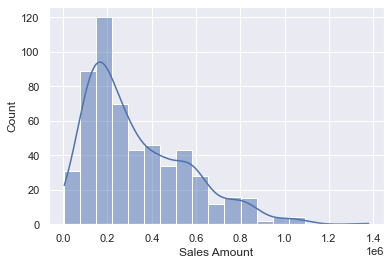

In [69]:
sns.histplot(Monthly_sales['Sales Amount'], kde = True)

## Profits Records:

Invoice_Year  Sales Margin Amount
0          2017          37378575.75
1          2018           9147547.74
2          2019          31182301.05

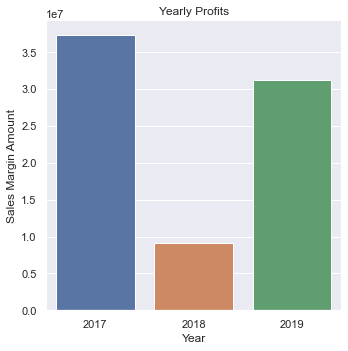

In [70]:
sns.catplot(y = 'Sales Margin Amount', x = 'Invoice_Year', data = Yearly_Sales01,kind="bar")
plt.xlabel('Year')
plt.ylabel('Sales Margin Amount')
plt.title('Yearly Profits')
Yearly_Sales01[['Invoice_Year', 'Sales Margin Amount']]

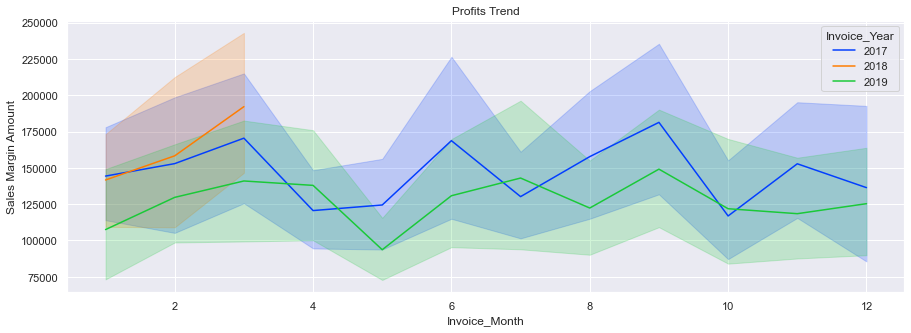

In [71]:
plt.figure(figsize = (15,5))
sns.lineplot(y ='Sales Margin Amount', x = 'Invoice_Month',
             data= sales_data02.groupby(['Invoice Date','Invoice_Year','Invoice_Month']).sum(),
             hue = 'Invoice_Year', palette='bright')
plt.title('Profits Trend')
plt.show()

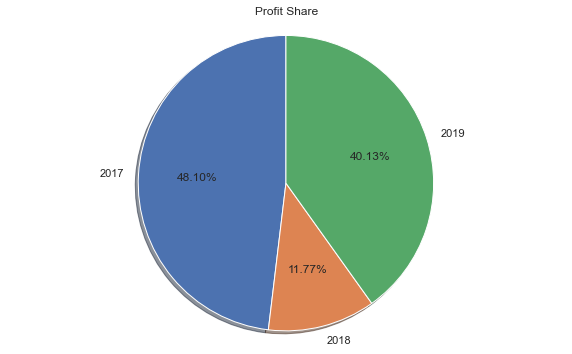

In [72]:
plt.figure(figsize=(10,6))
plt.pie('Sales Margin Amount',labels='Invoice_Year',data=Yearly_Sales01[['Invoice_Year', 'Sales Margin Amount']],
        autopct='%1.2f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.title('Profit Share')
plt.show()

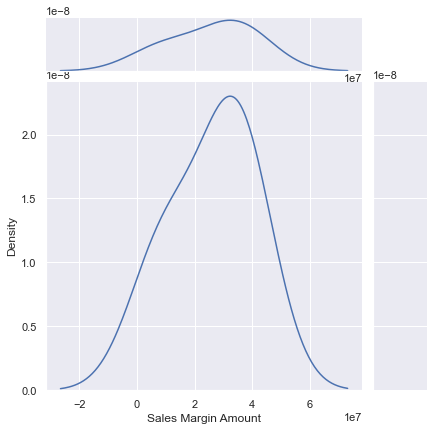

In [73]:
sns.jointplot(x='Sales Margin Amount',data=Yearly_Sales01,kind='kde')

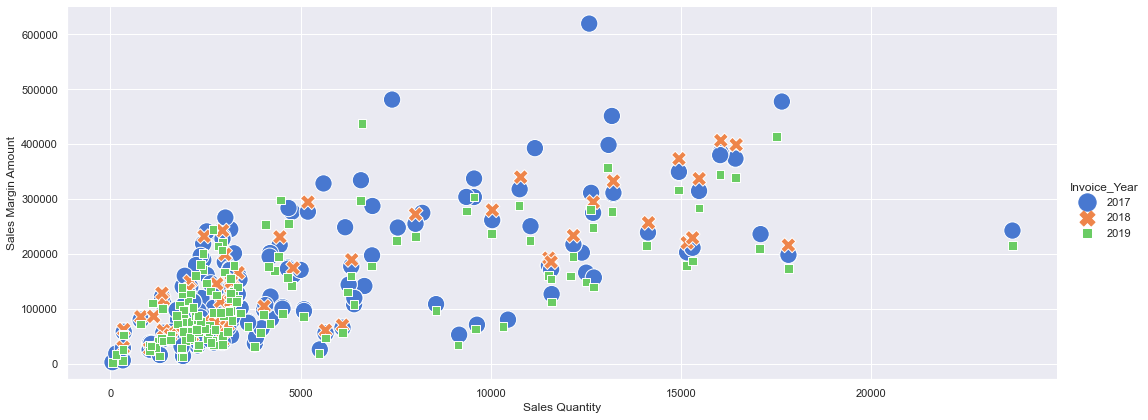

In [74]:
sns.relplot(x ='Sales Quantity',y = 'Sales Margin Amount',
            data=sales_data02.groupby(['Invoice_Year','Invoice_Month','Invoice_Day']).sum().reset_index(),
            hue='Invoice_Year',height=6,aspect=2.5, size='Invoice_Year',palette='muted',
            style= 'Invoice_Year', sizes = (300,150))

### Observations:
* In the scatterplot above, you can see that Sales Margin is mostly between `$1` and `$250000`.

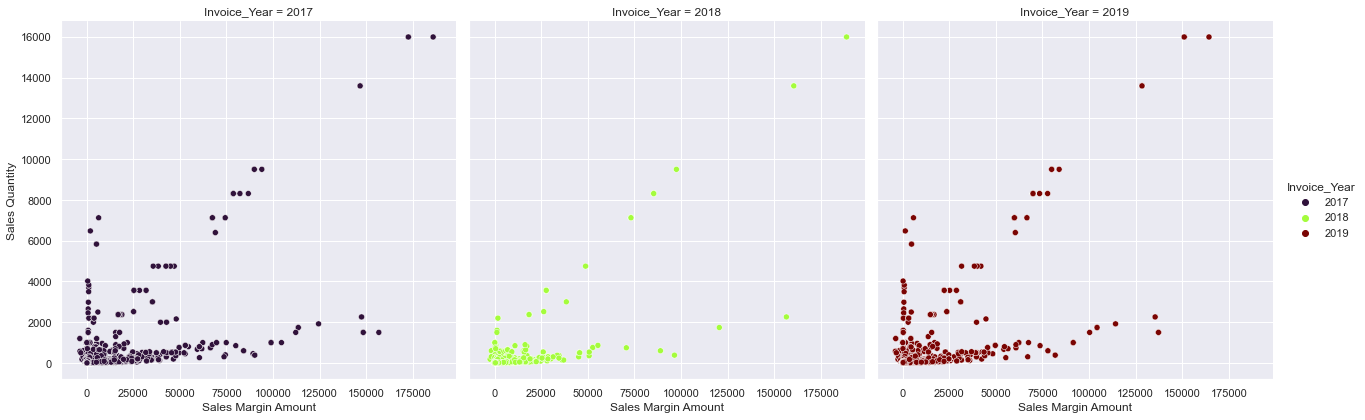

In [75]:
sns.relplot(y ='Sales Quantity',x = 'Sales Margin Amount', data=sales_data02, hue='Invoice_Year', col = 'Invoice_Year',height=6,
            palette='turbo')

## Yearly Month wise Records:

*********************************************Yearly-Month wise Sales Margin Trend*********************************************


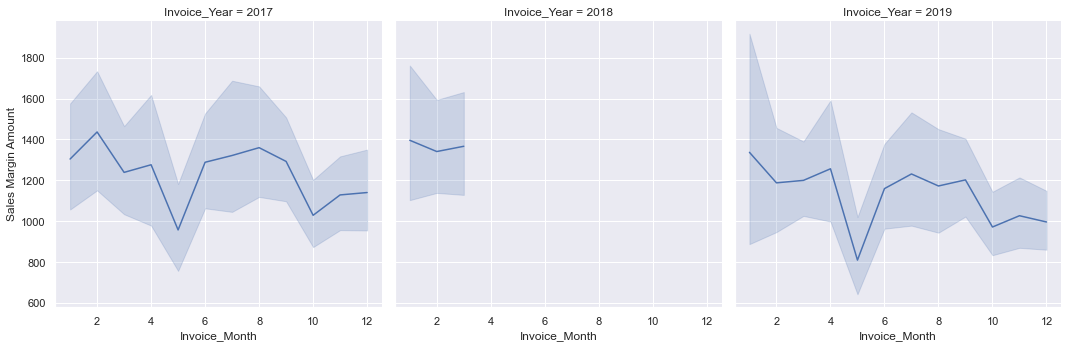

In [76]:
sns.relplot(x ='Invoice_Month',y = 'Sales Margin Amount', data= sales_data02 ,height=5,
            kind = 'line', aspect = 1, col = 'Invoice_Year')
plt.ylabel('Sales Margin Amount')
print('*'*45+'Yearly-Month wise Sales Margin Trend'+'*'*45)

****************************************Yearly-Month-wise Total Sales Margin Trend****************************************


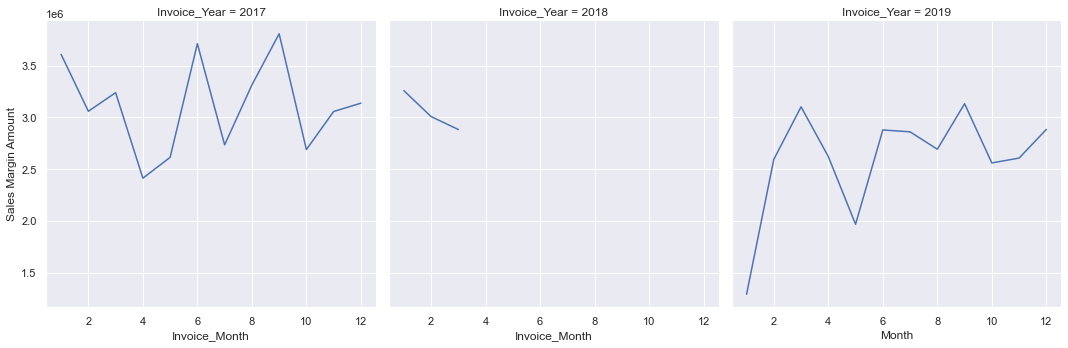

In [77]:
sns.relplot(x ='Invoice_Month',y = 'Sales Margin Amount', data=Yearly_Monthwise_Sales,height=5,
            kind = 'line', aspect = 1, col = 'Invoice_Year')
plt.xlabel('Month')
plt.ylabel('Sales Margin Amount')
print('*'*40+'Yearly-Month-wise Total Sales Margin Trend'+'*'*40)

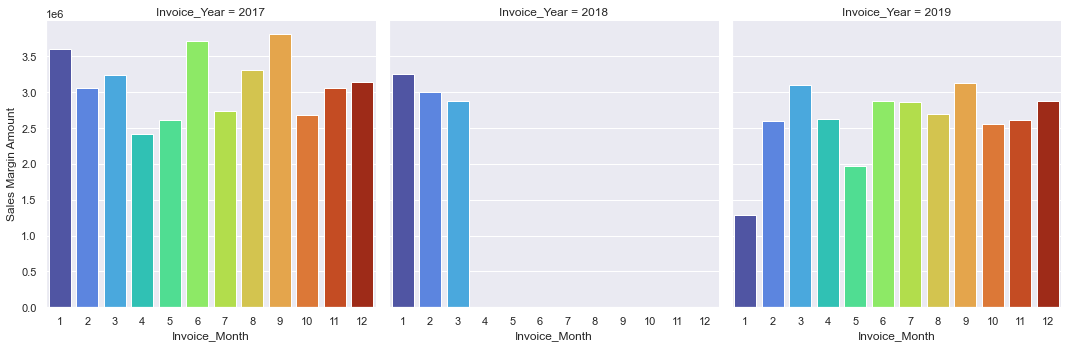

In [78]:
sns.catplot(y = 'Sales Margin Amount', x = 'Invoice_Month', data = Yearly_Monthwise_Sales, palette='turbo',kind="bar",
            col='Invoice_Year', col_wrap=3)

<AxesSubplot:xlabel='Sales Margin Amount', ylabel='Count'>

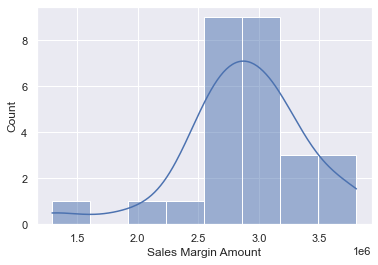

In [79]:
sns.histplot(Yearly_Monthwise_Sales['Sales Margin Amount'], kde = True)

## Monthly Records:

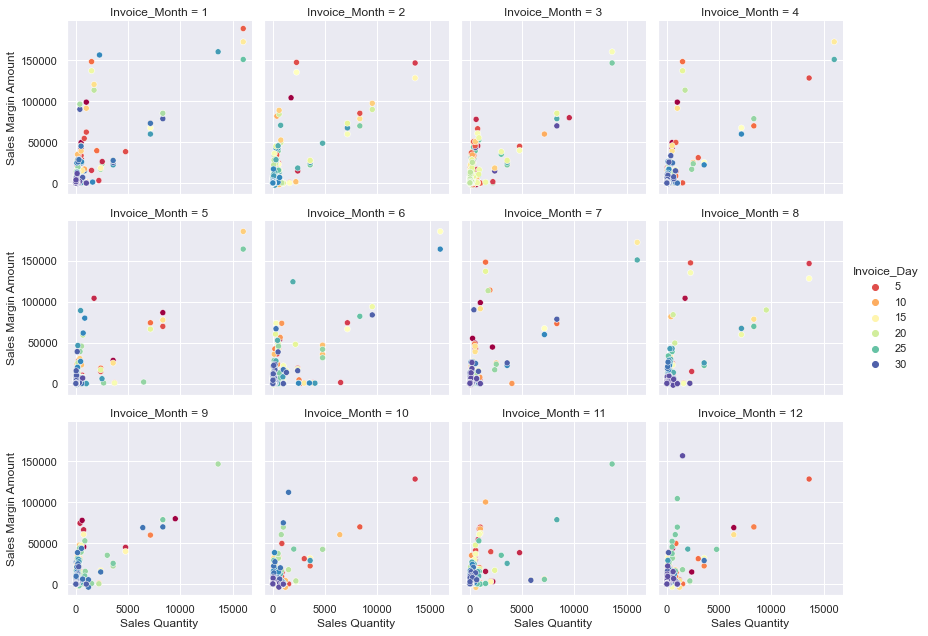

In [80]:
sns.relplot(x = 'Sales Quantity',
            y = 'Sales Margin Amount', data=sales_data02, height = 3,aspect=1,
            hue='Invoice_Day', col = 'Invoice_Month',col_wrap = 4, palette='Spectral')

****************************************Monthly Sales Margin Amount Trend in 2017****************************************


<Figure size 576x1440 with 0 Axes>

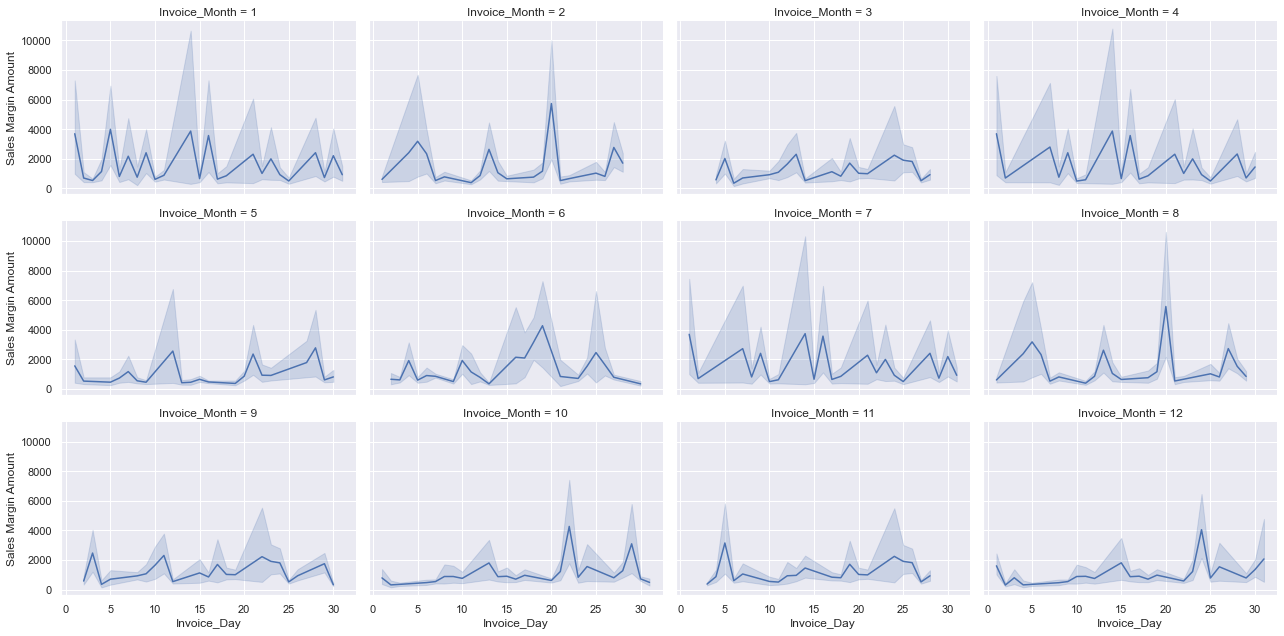

In [81]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Invoice_Day',y = 'Sales Margin Amount', data= sales_data02.query('Invoice_Year == 2017'),
            kind = 'line', col = 'Invoice_Month', col_wrap =4, height = 3, aspect = 1.5)
plt.ylabel('Sales Amount')
print('*'*40+'Monthly Sales Margin Amount Trend in 2017'+'*'*40)

******************************************Monthly Sales Margin Amount Trend in 2018******************************************


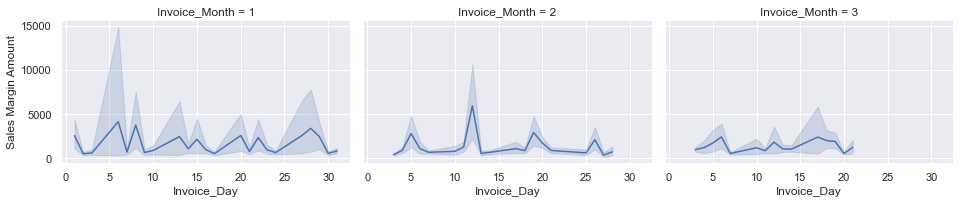

In [82]:
sns.relplot(x ='Invoice_Day',y = 'Sales Margin Amount', data= sales_data02.query('Invoice_Year == 2018'),
            kind = 'line', col = 'Invoice_Month', col_wrap = 3, height = 3, aspect = 1.5)
plt.ylabel('Sales Amount')
print('*'*42+'Monthly Sales Margin Amount Trend in 2018'+'*'*42)

****************************************Monthly Sales Margin Amount Trend in 2019****************************************


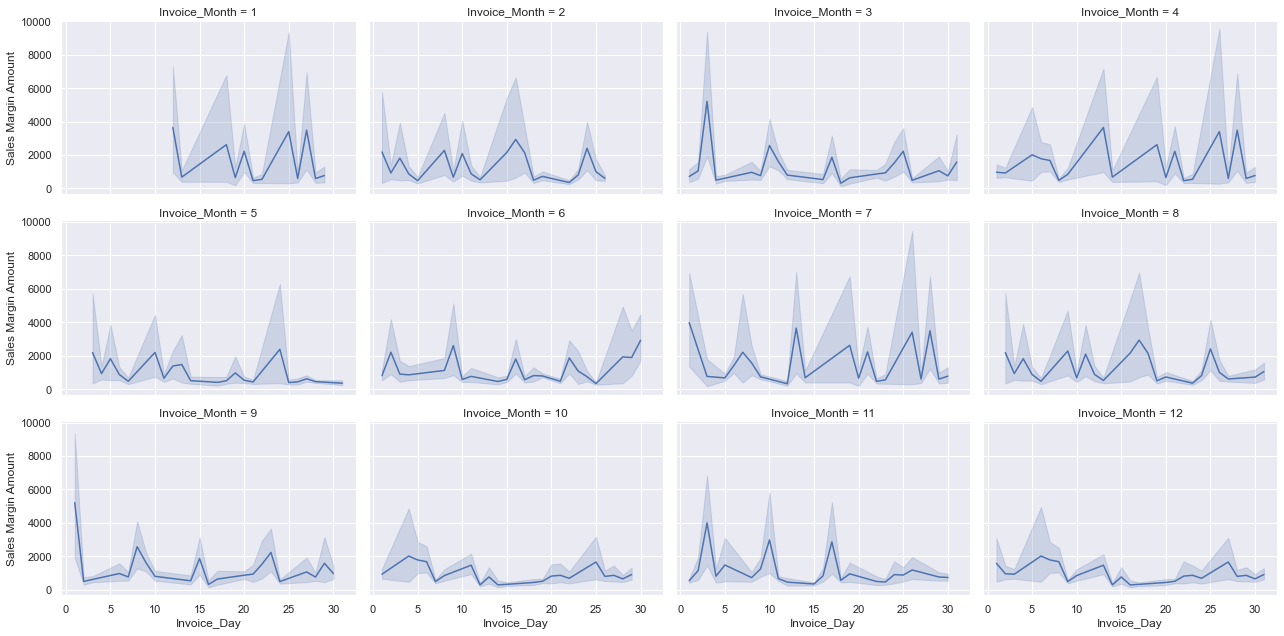

In [83]:
sns.relplot(x ='Invoice_Day',y = 'Sales Margin Amount', data= sales_data02.query('Invoice_Year == 2019'),
            kind = 'line', col = 'Invoice_Month', col_wrap =4, height = 3, aspect = 1.5)
plt.ylabel('Sales Amount')
print('*'*40+'Monthly Sales Margin Amount Trend in 2019'+'*'*40)

****************************************Daily Total Profits trend per month in 2017****************************************


<Figure size 576x1440 with 0 Axes>

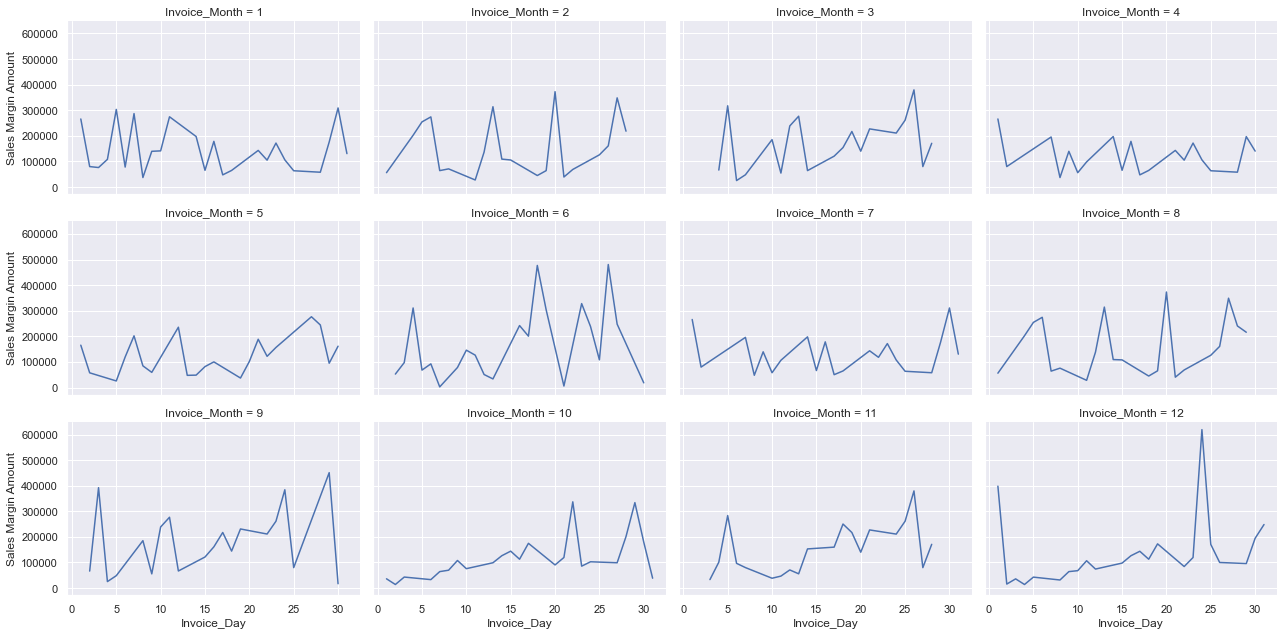

In [84]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Invoice_Day',y = 'Sales Margin Amount', data= Monthly_sales.query('Invoice_Year == 2017'),
            kind = 'line', col = 'Invoice_Month', col_wrap =4, height = 3, aspect = 1.5)
plt.ylabel('Sales Amount')
print('*'*40+'Daily Total Profits trend per month in 2017'+'*'*40)

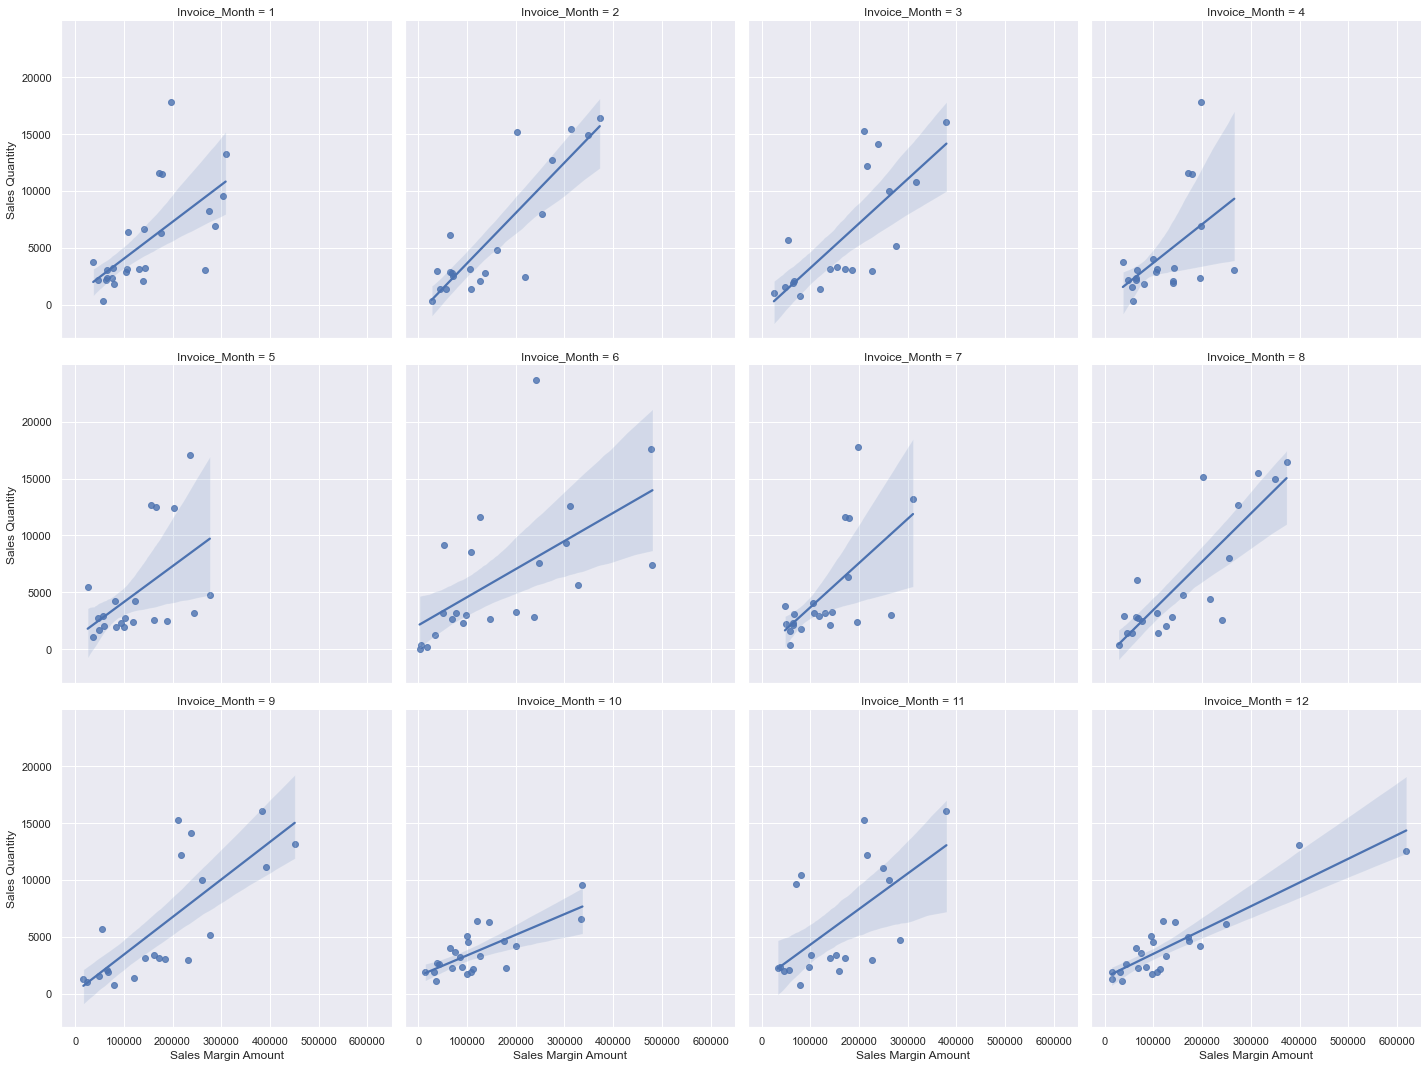

In [85]:
sns.lmplot(x='Sales Margin Amount',y = 'Sales Quantity', 
              data=Monthly_sales[Monthly_sales["Invoice_Year"] ==2017], col='Invoice_Month', col_wrap=4)

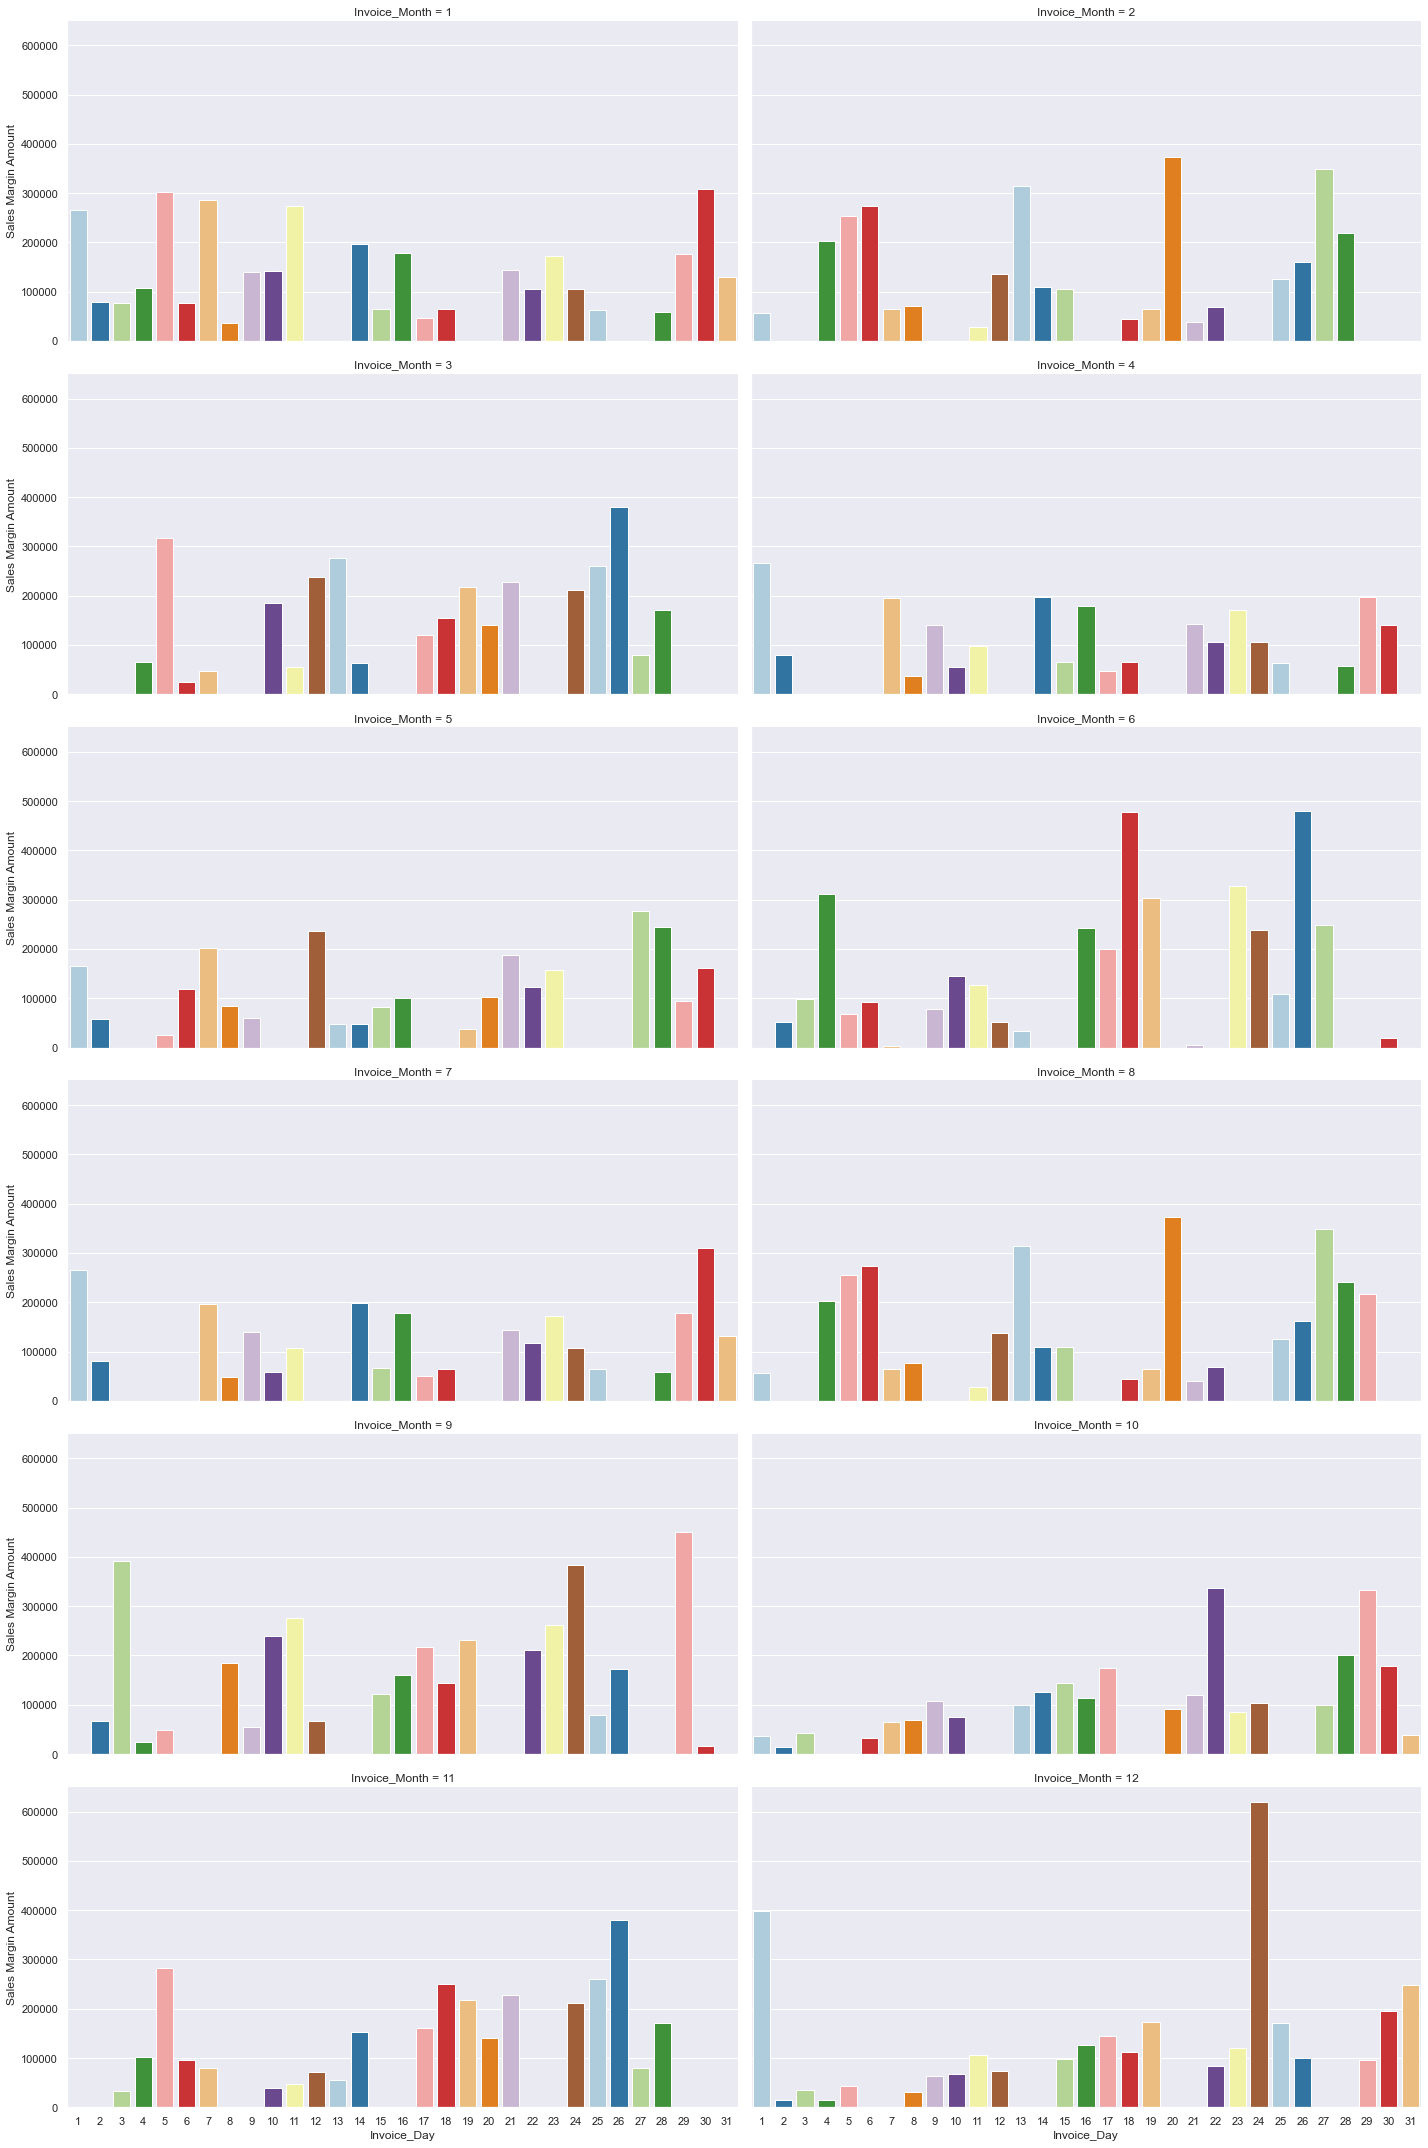

In [86]:
sns.catplot(y = 'Sales Margin Amount', x = 'Invoice_Day', data = Monthly_sales[Monthly_sales['Invoice_Year'] == 2017], aspect=2,
            palette='Paired',kind="bar",col='Invoice_Month', col_wrap=2)

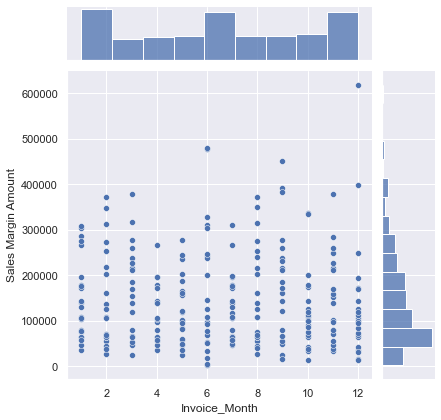

In [87]:
sns.jointplot(x = 'Invoice_Month', y='Sales Margin Amount', data=Monthly_sales[Monthly_sales["Invoice_Year"] ==2017])

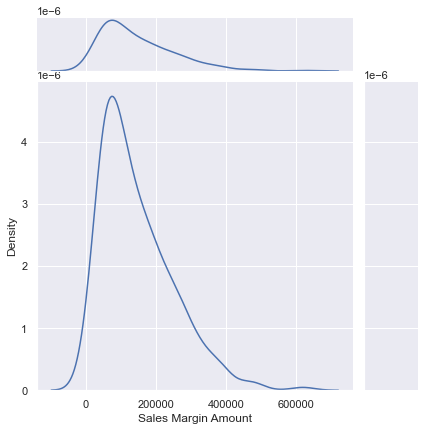

In [88]:
sns.jointplot(x='Sales Margin Amount',data=Monthly_sales[Monthly_sales["Invoice_Year"] ==2017],ratio=5,kind='kde')

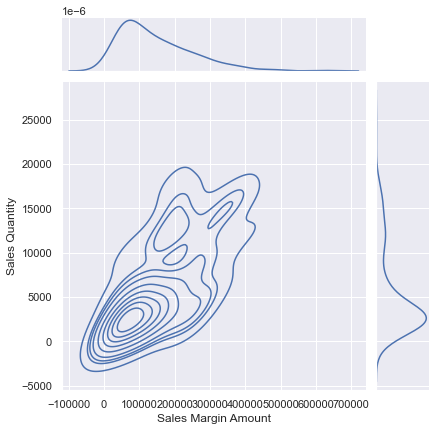

In [89]:
sns.jointplot(y = 'Sales Quantity', x='Sales Margin Amount',
              data=Monthly_sales[Monthly_sales["Invoice_Year"] ==2017], kind='kde')

### Observations:
* In Most cases, Sales Quantity was around 200 and Profits were around `$200000`.

<AxesSubplot:xlabel='Sales Margin Amount', ylabel='Count'>

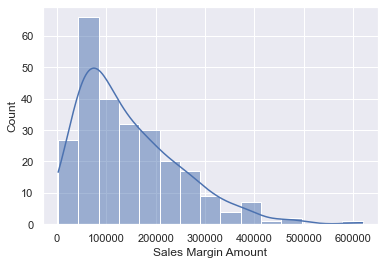

In [90]:
sns.histplot(Monthly_sales.query('Invoice_Year == 2017')['Sales Margin Amount'], kde = True)

****************************************Daily Total Profits per Month Trend in 2018****************************************


<Figure size 576x1440 with 0 Axes>

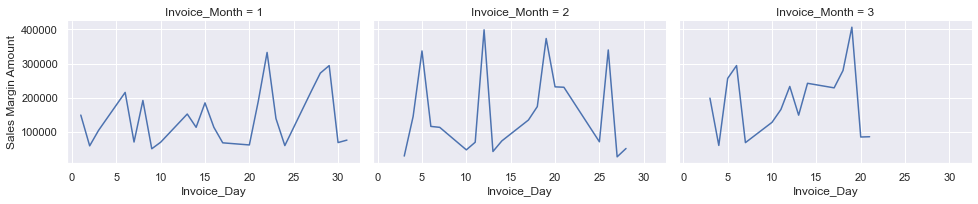

In [91]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Invoice_Day',y = 'Sales Margin Amount', data= Monthly_sales.query('Invoice_Year == 2018'),
            kind = 'line', col = 'Invoice_Month', col_wrap =4, height = 3, aspect = 1.5)
plt.ylabel('Sales Amount')
print('*'*40+'Daily Total Profits per Month Trend in 2018'+'*'*40)


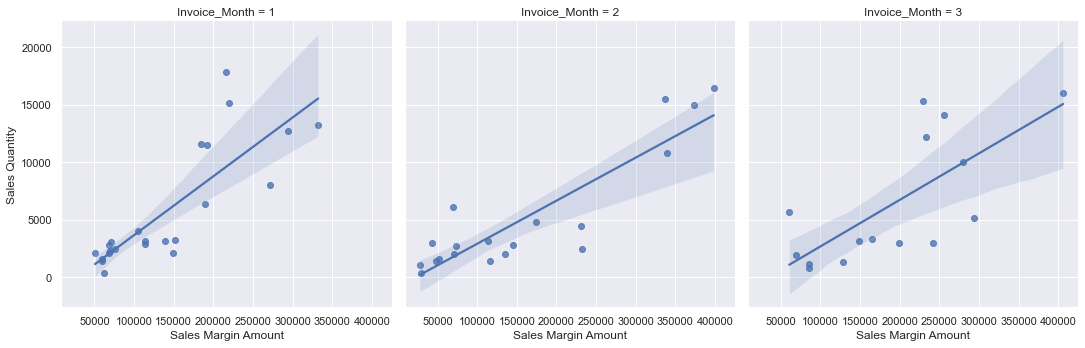

In [92]:
sns.lmplot(x='Sales Margin Amount',y = 'Sales Quantity', 
              data=Monthly_sales[Monthly_sales["Invoice_Year"] ==2018], col='Invoice_Month', col_wrap=4)

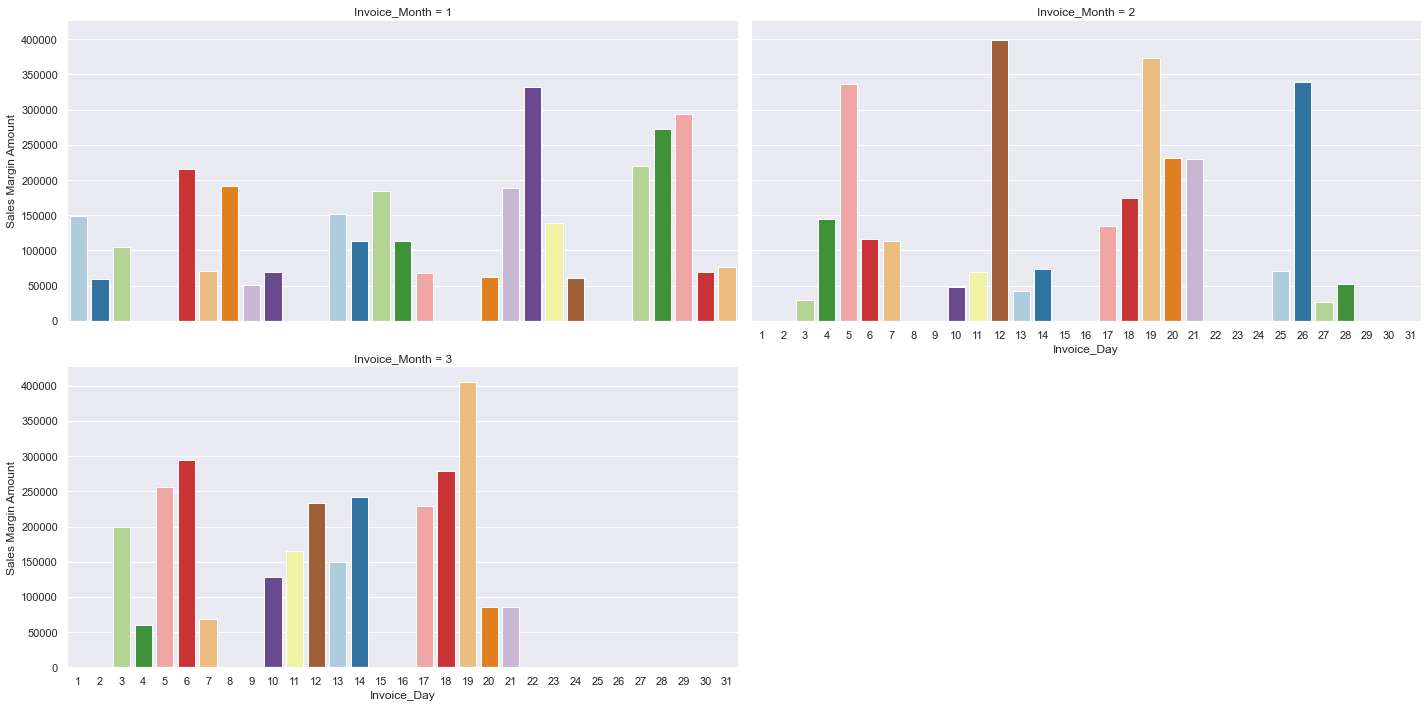

In [93]:
sns.catplot(y = 'Sales Margin Amount', x = 'Invoice_Day', data = Monthly_sales[Monthly_sales['Invoice_Year'] == 2018], aspect=2,
            palette='Paired',kind="bar",col='Invoice_Month', col_wrap=2)

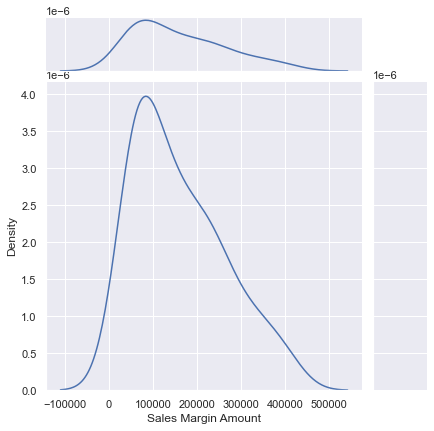

In [94]:
sns.jointplot(x='Sales Margin Amount',data=Monthly_sales[Monthly_sales["Invoice_Year"] ==2018],ratio=5,kind='kde')

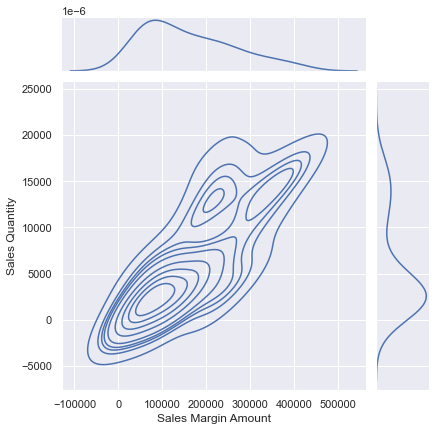

In [95]:
sns.jointplot(y = 'Sales Quantity', x='Sales Margin Amount',
              data=Monthly_sales[Monthly_sales["Invoice_Year"] ==2018], kind='kde')

<AxesSubplot:xlabel='Sales Margin Amount', ylabel='Count'>

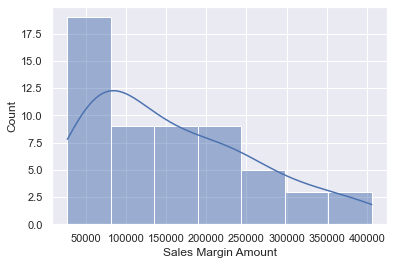

In [96]:
sns.histplot(Monthly_sales.query('Invoice_Year == 2018')['Sales Margin Amount'], kde = True)

****************************************Daily Total Profits Trend per Month in 2019****************************************


<Figure size 576x1440 with 0 Axes>

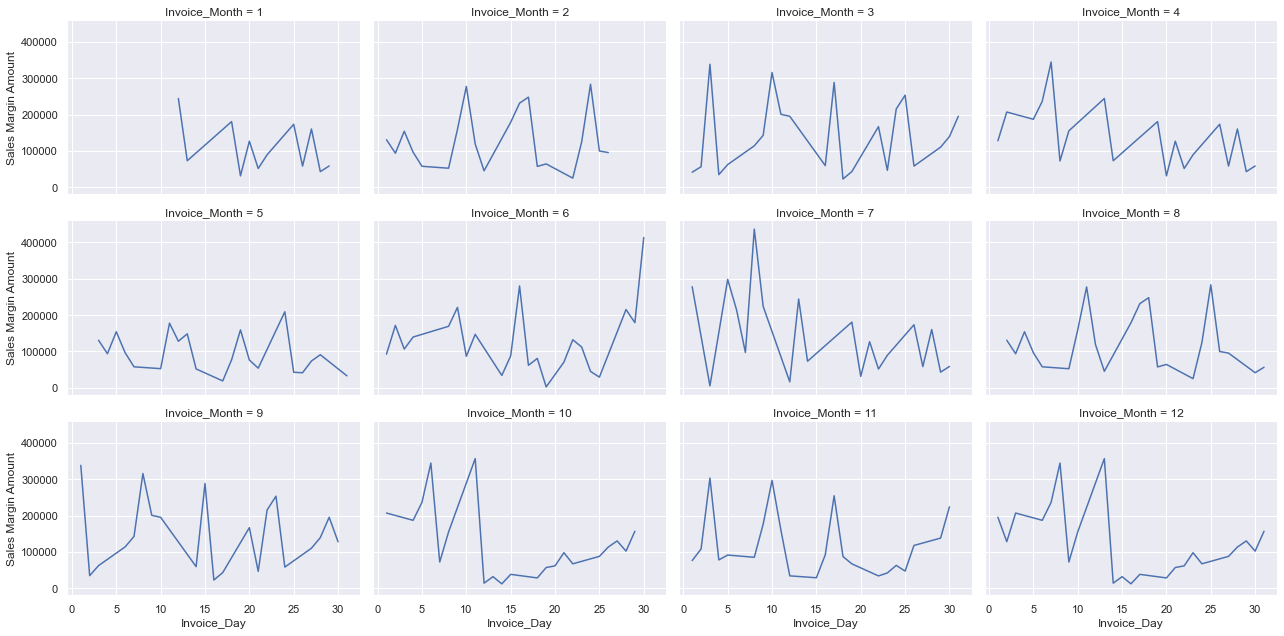

In [97]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Invoice_Day',y = 'Sales Margin Amount', data= Monthly_sales.query('Invoice_Year == 2019'),
            kind = 'line', col = 'Invoice_Month', col_wrap =4, height = 3, aspect = 1.5)
plt.ylabel('Sales Amount')
print('*'*40+'Daily Total Profits Trend per Month in 2019'+'*'*40)

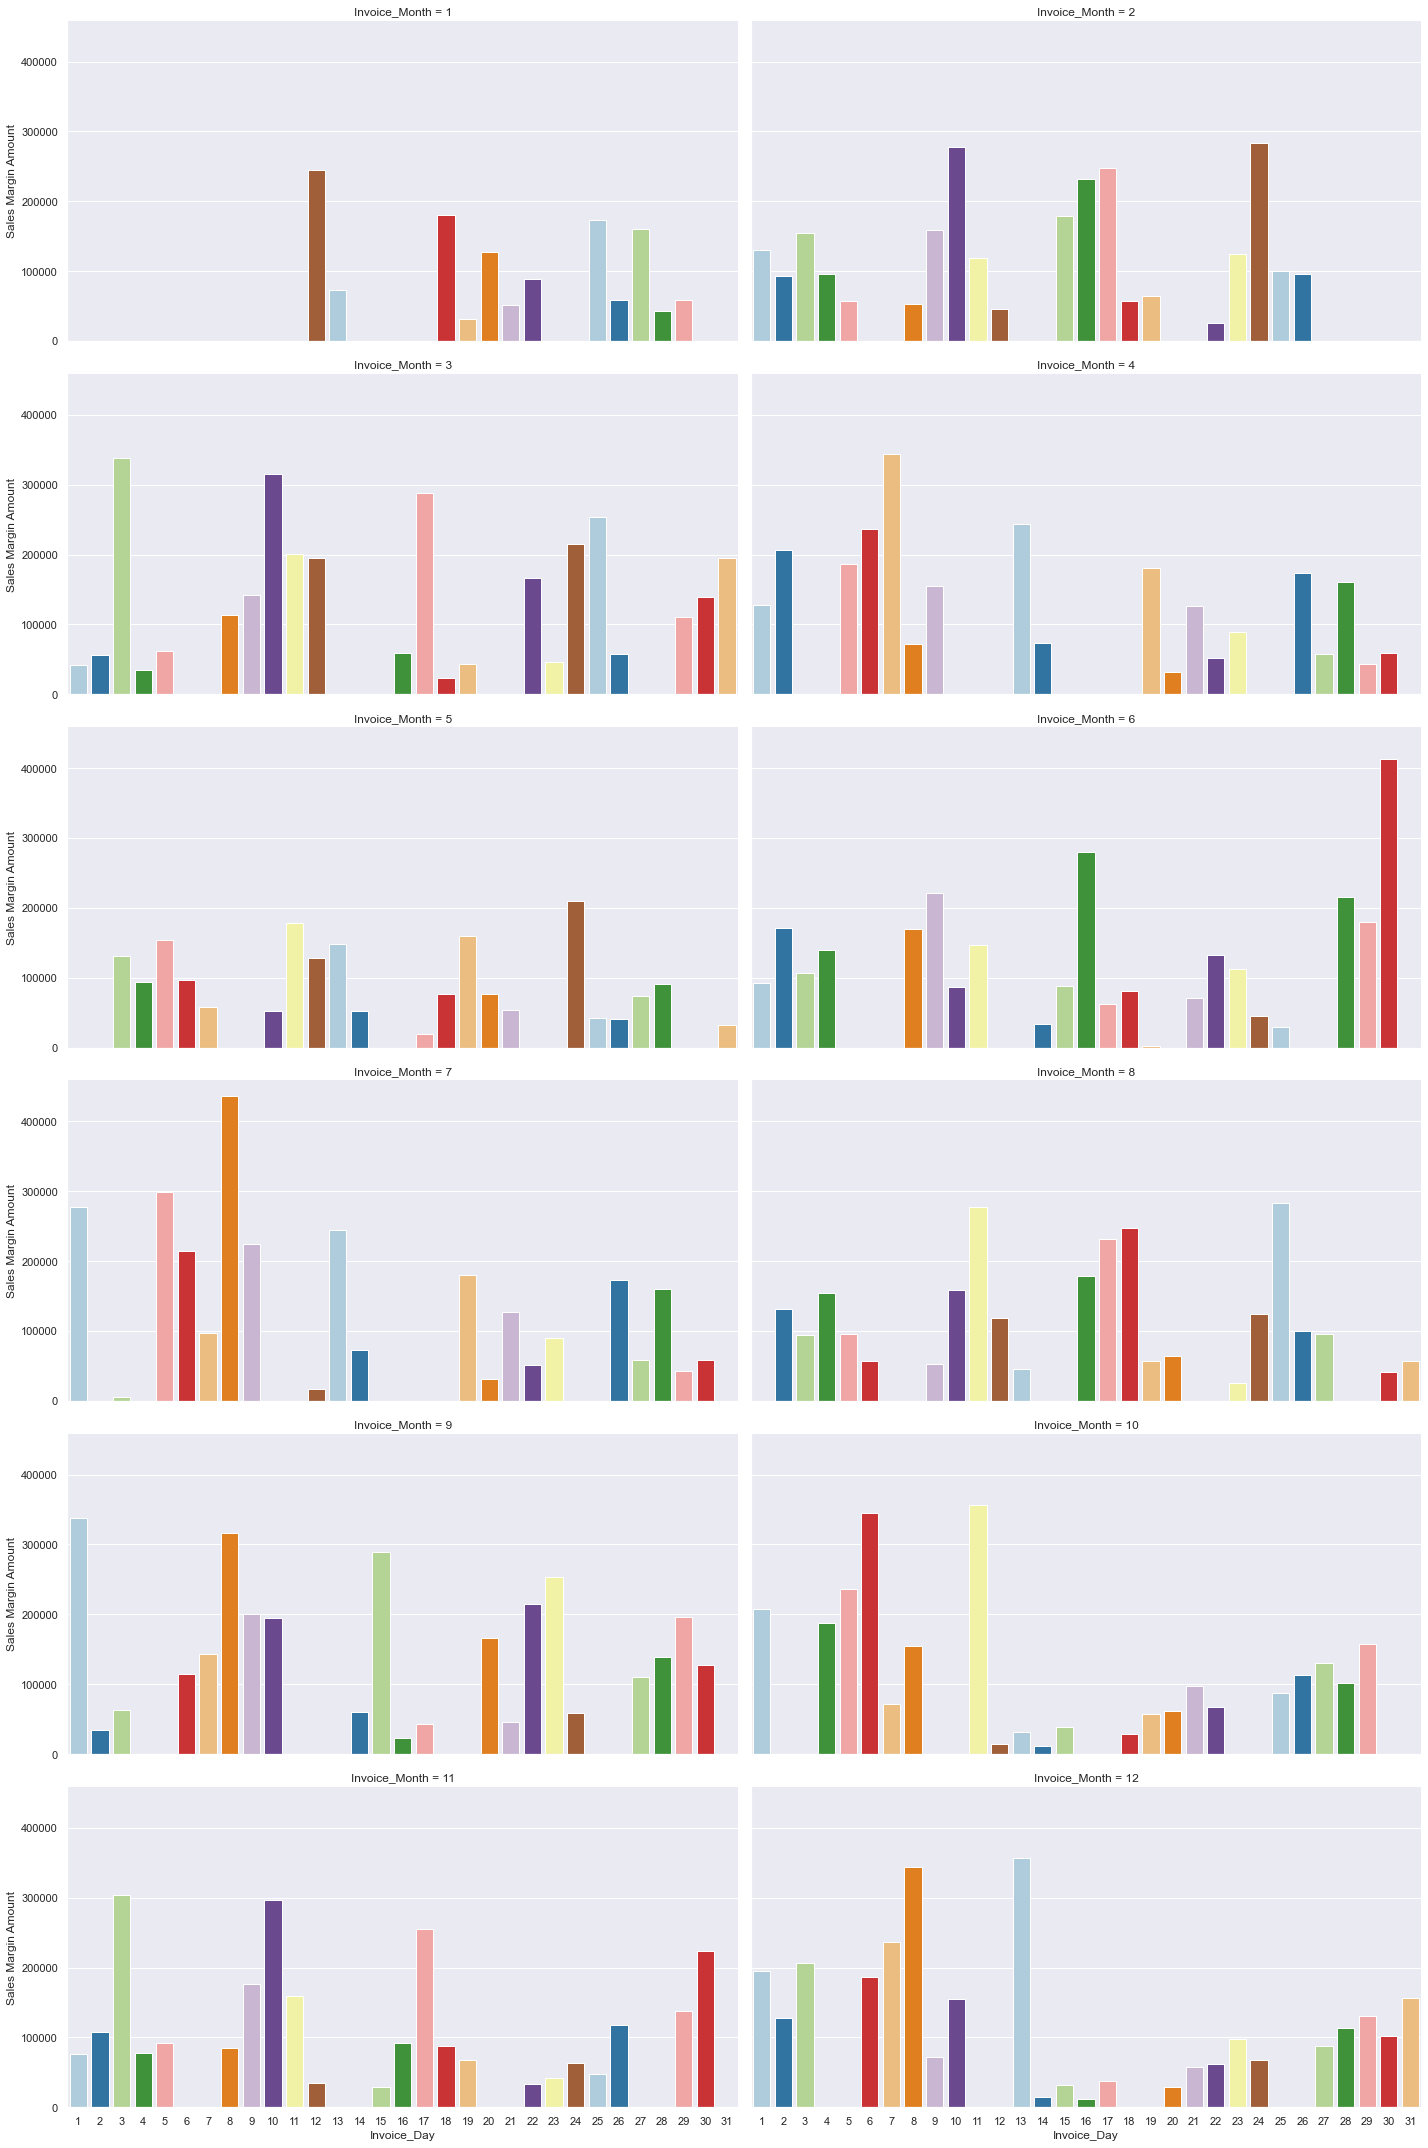

In [98]:
sns.catplot(y = 'Sales Margin Amount', x = 'Invoice_Day', data = Monthly_sales[Monthly_sales['Invoice_Year'] == 2019],
            aspect=2, palette='Paired',kind="bar",col='Invoice_Month', col_wrap=2)

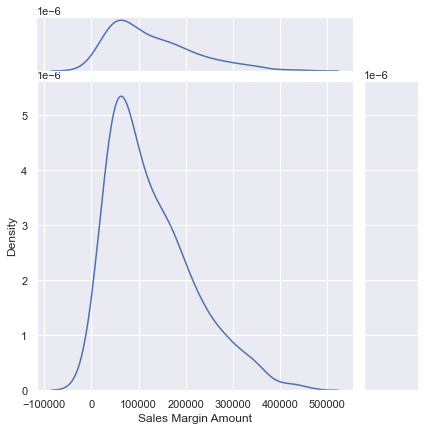

In [99]:
sns.jointplot(x='Sales Margin Amount',data=Monthly_sales[Monthly_sales["Invoice_Year"] ==2019],ratio=5,kind='kde')

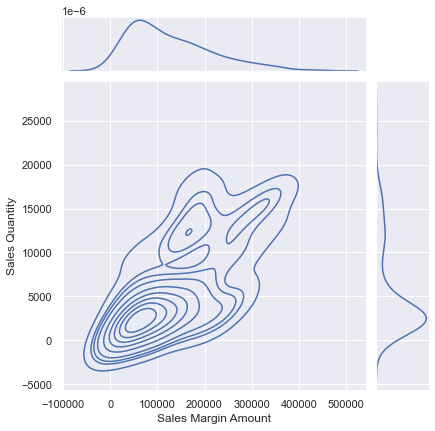

In [100]:
sns.jointplot(y = 'Sales Quantity', x='Sales Margin Amount',
              data=Monthly_sales[Monthly_sales["Invoice_Year"] ==2019], kind='kde')

<AxesSubplot:xlabel='Sales Margin Amount', ylabel='Count'>

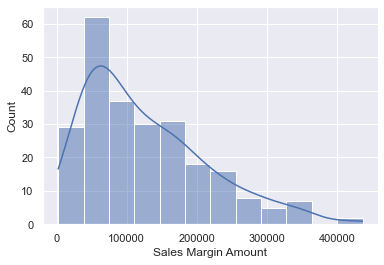

In [101]:
sns.histplot(Monthly_sales.query('Invoice_Year == 2019')['Sales Margin Amount'], kde = True)

# Top 10 Records:

In [102]:
Top10byCustKey17 = Yearly_Sales[Yearly_Sales['Invoice_Year']==2017].groupby(['Invoice_Year','CustKey']).sum()
Top10byCustKey17 = Top10byCustKey17.sort_values('Sales Margin Amount', ascending=False).reset_index().head(10)

CustKey  Sales Margin Amount
0  10021485           5176926.16
1  10025024           3250809.87
2  10025052           1761731.21
3  10025919           1415771.68
4  10025241           1267256.40
5  10023023            870216.36
6  10020184            843138.90
7  10009606            835041.55
8  10012715            782863.50
9  10023715            729615.06

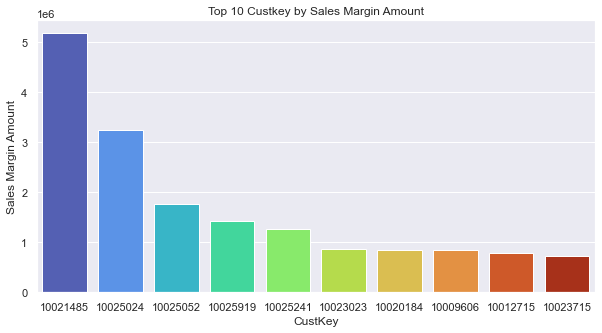

In [103]:
plt.figure(figsize=(10,5))
sns.barplot(x='CustKey', y='Sales Margin Amount',data = Top10byCustKey17, palette = 'turbo',
            order = Top10byCustKey17.CustKey)
plt.title('Top 10 Custkey by Sales Margin Amount')
Top10byCustKey17[['CustKey', 'Sales Margin Amount']]

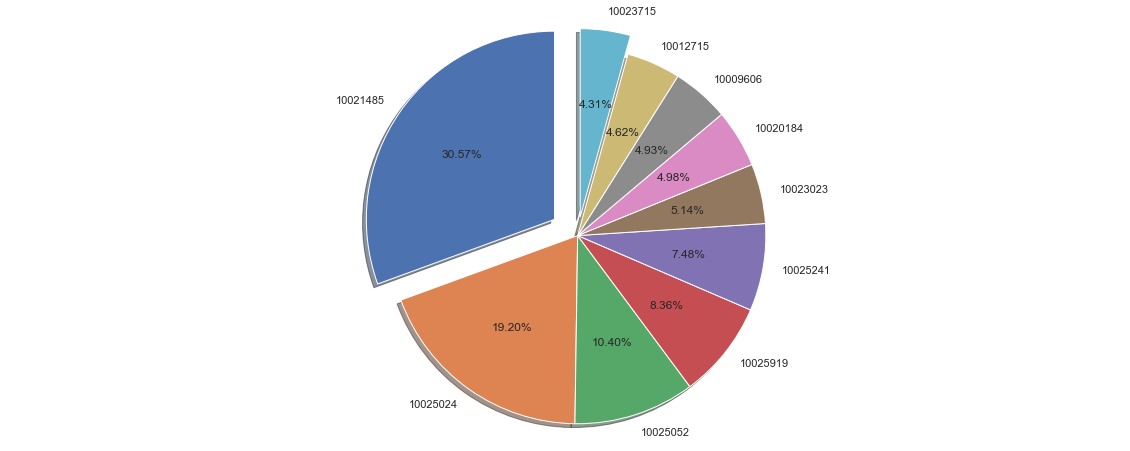

In [104]:
plt.figure(figsize=(20,8))
plt.pie('Sales Margin Amount',labels='CustKey',data=Top10byCustKey17,
        autopct='%1.2f%%',shadow=True,startangle=90, explode = (0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0.1))
plt.axis('equal')
plt.show()

###  Observations:
* Among the 10 CustKey that generated the most Sales Margin Amount, `CustKey-10021485` contributed around 30.57% of the Sales Margin Amount.

In [105]:
Top10byCustKey18 = Yearly_Sales[Yearly_Sales['Invoice_Year']==2018].groupby(['Invoice_Year','CustKey']).sum()
Top10byCustKey18 = Top10byCustKey18.sort_values('Sales Margin Amount', ascending=False).reset_index().head(10)

CustKey  Sales Margin Amount
0  10025039           1398188.29
1  10002154           1154085.14
2  10006919            509760.00
3  10025552            332110.69
4  10017638            233470.15
5  10019066            207997.56
6  10026299            195547.06
7  10023471            195034.39
8  10007183            162898.91
9  10010935            152253.65

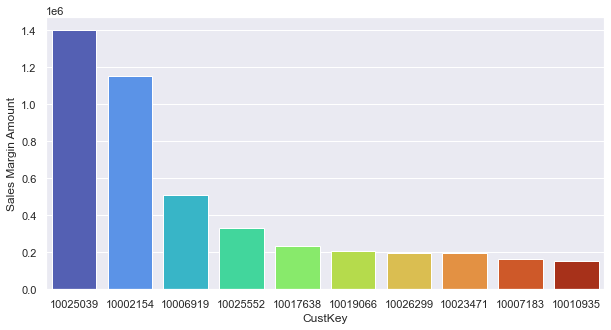

In [106]:
plt.figure(figsize=(10,5))
sns.barplot(x='CustKey', y='Sales Margin Amount',data = Top10byCustKey18, palette = 'turbo',
            order = Top10byCustKey18.CustKey)
Top10byCustKey18[['CustKey', 'Sales Margin Amount']]

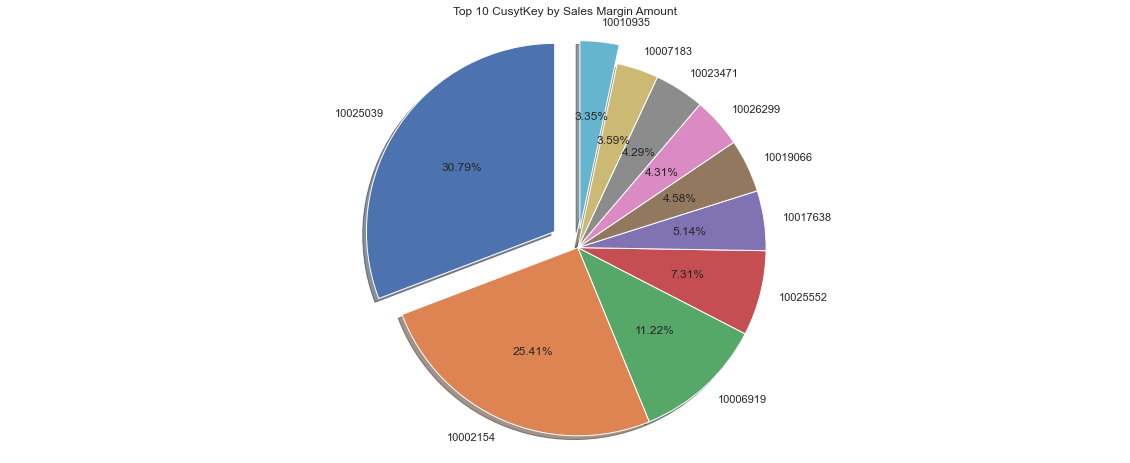

In [107]:
plt.figure(figsize=(20,8))
plt.pie('Sales Margin Amount',labels='CustKey',data=Top10byCustKey18,autopct='%1.2f%%',
        shadow=True,startangle=90, explode = (0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0.1))
plt.axis('equal')
plt.title('Top 10 CusytKey by Sales Margin Amount')
plt.show()

###  Observations:
* Among the 10 CustKey that generated the most Sales Margin Amount, `CustKey-10025039` contributed around 30.79% of the Sales Margin Amount.

In [108]:
Top10byCustKey19 = Yearly_Sales[Yearly_Sales['Invoice_Year']==2019].groupby(['Invoice_Year','CustKey']).sum()
Top10byCustKey19 = Top10byCustKey19.sort_values('Sales Margin Amount', ascending=False).reset_index().head(10)

CustKey  Sales Margin Amount
0  10009676           4473954.12
1  10021300           2840289.66
2  10025737           1544679.20
3  10019194           1221320.93
4  10025353           1114700.90
5  10025571            798919.82
6  10026606            712503.86
7  10012226            702720.45
8  10016548            683579.49
9  10004245            619735.78

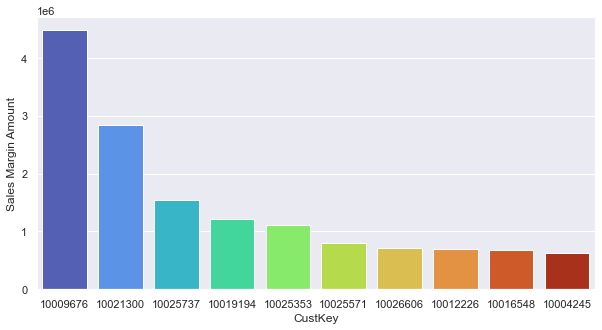

In [109]:
plt.figure(figsize=(10,5))
sns.barplot(x='CustKey', y='Sales Margin Amount',data = Top10byCustKey19, palette = 'turbo',
            order = Top10byCustKey19.CustKey)
Top10byCustKey19[['CustKey', 'Sales Margin Amount']]

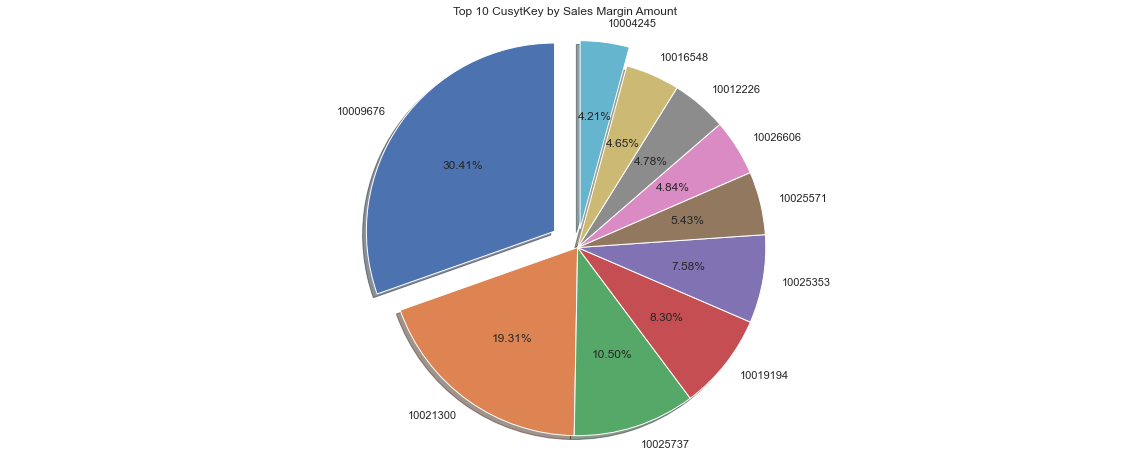

In [110]:
plt.figure(figsize=(20,8))
plt.pie('Sales Margin Amount',labels='CustKey',data=Top10byCustKey19,autopct='%1.2f%%',
        shadow=True,startangle=90, explode = (0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0.1))
plt.axis('equal')
plt.title('Top 10 CusytKey by Sales Margin Amount')
plt.show()

###  Observations:
* Among the 10 CustKey that generated the most Sales Margin Amount, `CustKey-10009676` contributed around 30.41% of the Sales Margin Amount.

In [111]:
High_Profit = sales_data01.groupby('Item').sum().sort_values('Sales Margin Amount', ascending=False).reset_index()
High_Profit.index+=1
High_Profit=High_Profit.reset_index().rename(columns={"index":"Rank"})

Rank                           Item  Sales Margin Amount
0     1     Better Large Canned Shrimp           5459826.26
1     2       High Top Dried Mushrooms           4659100.16
2     3   Big Time Frozen Cheese Pizza           2826772.99
3     4               Fast Mini Donuts           2663325.66
4     5             Discover Manicotti           2381667.84
5     6                   Ebony Squash           2336246.16
6     7   Better Fancy Canned Sardines           2131933.94
7     8          Landslide White Sugar           2079755.46
8     9  Tell Tale Red Delcious Apples           1977923.42
9    10      Better Canned Tuna in Oil           1903351.46

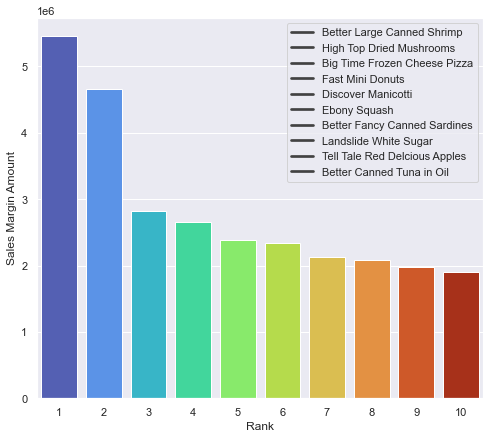

In [112]:
plt.figure(figsize=(8,7))
sns.barplot(x='Rank', y='Sales Margin Amount',data = High_Profit.head(10), palette = 'turbo')
plt.legend(High_Profit['Item'].head(10))
High_Profit[['Rank', 'Item', 'Sales Margin Amount']].head(10)

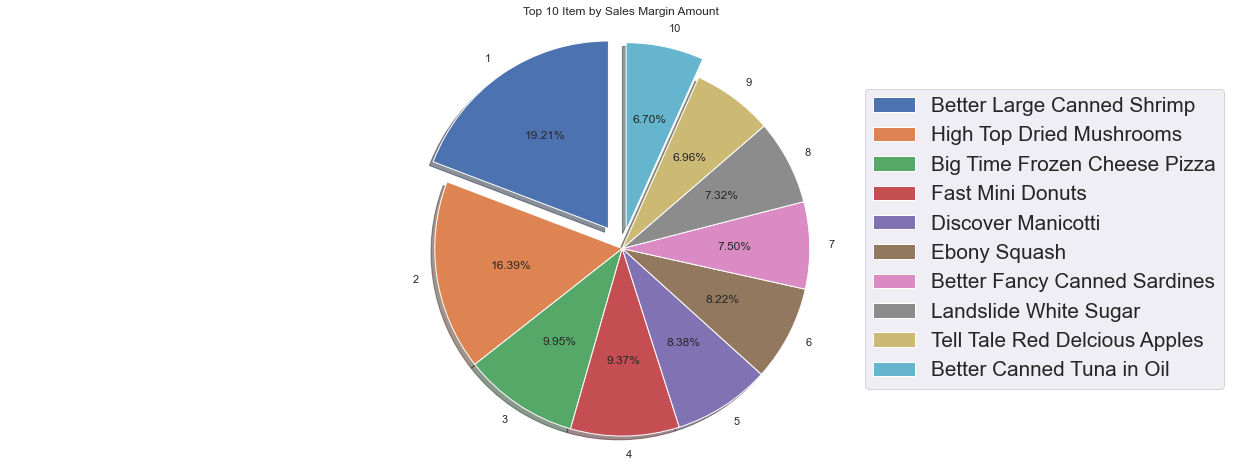

In [113]:
plt.figure(figsize=(22,8))
plt.pie('Sales Margin Amount',labels='Rank',data=High_Profit.head(10),autopct='%1.2f%%',
        shadow=True,startangle=90, explode = (0.13, 0, 0, 0, 0, 0, 0, 0, 0, 0.1))
plt.axis('equal')
plt.title('Top 10 Item by Sales Margin Amount')
plt.legend(High_Profit['Item'].head(10), loc=7, fontsize = 'xx-large')
plt.show()

###  Observations:
* Item `Better Large Canned Shrimp` contributed around 19.21% of Sales Margin amount among the 10 Items that generated the most Sales Margin Amount.

In [114]:
High_Sales = sales_data01.groupby('Item').sum().sort_values('Sales Amount', ascending=False).reset_index()
High_Sales.index+=1
High_Sales=High_Sales.reset_index().rename(columns={"index":"Rank"})

Rank                          Item  Sales Amount
0     1    Better Large Canned Shrimp   15454172.47
1     2      High Top Dried Mushrooms   13367714.53
2     3        Red Spade Pimento Loaf    5711486.45
3     4     Better Canned Tuna in Oil    5693075.12
4     5                  Ebony Squash    5380727.75
5     6  Big Time Frozen Cheese Pizza    5127171.17
6     7              Fast Mini Donuts    5009499.08
7     8  Better Fancy Canned Sardines    4975348.35
8     9            Discover Manicotti    4901139.48
9    10         Landslide White Sugar    4282290.62

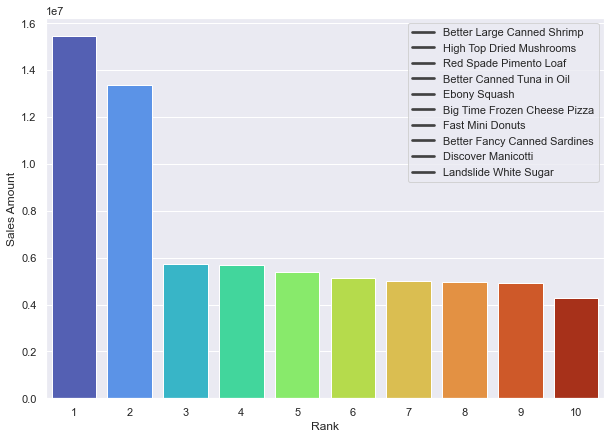

In [115]:
plt.figure(figsize=(10,7))
sns.barplot(x='Rank', y='Sales Amount',data = High_Sales.head(10), palette = 'turbo')
plt.legend(High_Sales['Item'].head(10))
High_Sales[['Rank', 'Item', 'Sales Amount']].head(10)

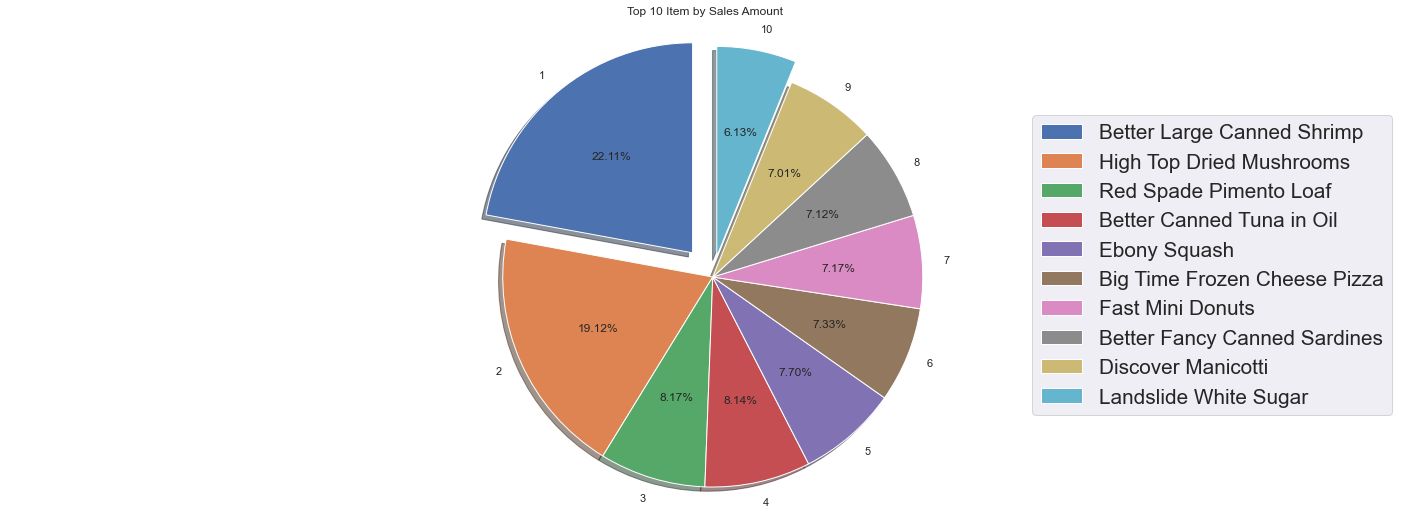

In [116]:
plt.figure(figsize=(25,9))
plt.pie('Sales Amount',labels='Rank',data=High_Sales.head(10),autopct='%1.2f%%',
        shadow=True,startangle=90, explode = (0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0.1))
plt.axis('equal')
plt.title('Top 10 Item by Sales Amount')
plt.legend(High_Sales['Item'].head(10), loc=7, fontsize = 'xx-large')
plt.show()

###  Observations:
* Item `Better Large Canned Shrimp` contributed around 22.11% of revenue among the 10 Items that generated the most revenue.

In [117]:
High_SalesPrice = sales_data01.groupby('Item').sum().sort_values('Sales Price', ascending=False).reset_index()
High_SalesPrice.index+=1
High_SalesPrice=High_SalesPrice.reset_index().rename(columns={"index":"Rank"})

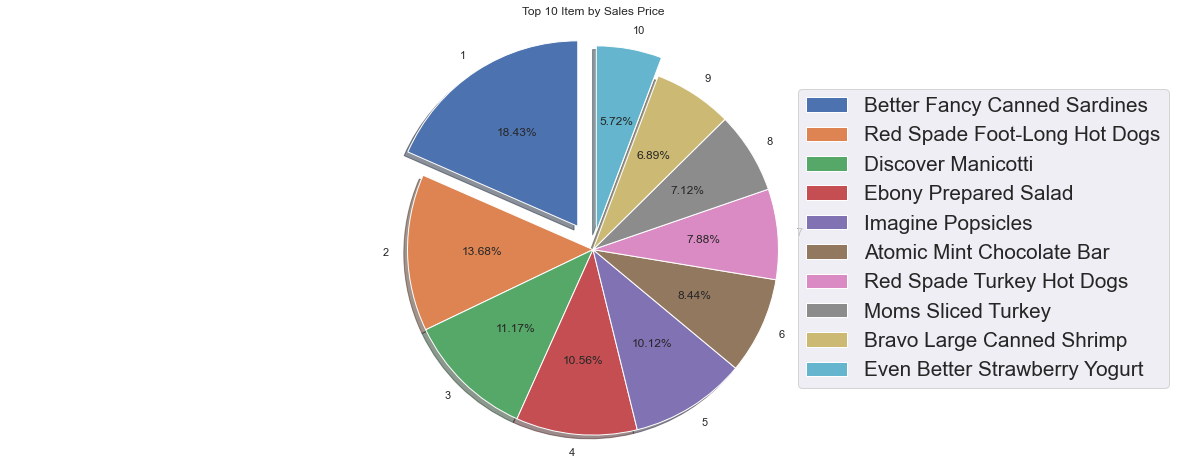

In [118]:
plt.figure(figsize=(21
                    ,8))
plt.pie('Sales Price',labels='Rank',data=High_SalesPrice.head(10),autopct='%1.2f%%',
        shadow=True,startangle=90, explode = (0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0.1))
plt.axis('equal')
plt.title('Top 10 Item by Sales Price')
plt.legend(High_SalesPrice['Item'].head(10), loc=7, fontsize = 'xx-large')
plt.show()

###  Observations:
* Item `Better Fancy Canned Sardines` contributed around 18.43% of Sales Price among the 10 Items.

In [119]:
High_CostAmount = sales_data01.groupby('Item').sum().sort_values('Sales Cost Amount', ascending=False).reset_index()
High_CostAmount.index+=1
High_CostAmount=High_CostAmount.reset_index().rename(columns={"index":"Rank"})

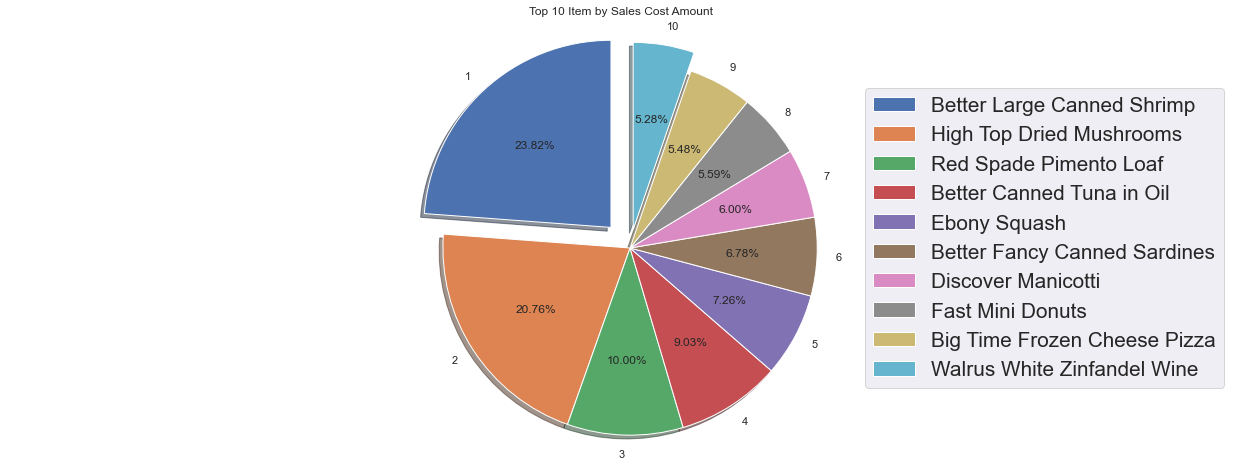

In [120]:
plt.figure(figsize=(22,8))
plt.pie('Sales Cost Amount',labels='Rank',data=High_CostAmount.head(10),autopct='%1.2f%%',
        shadow=True,startangle=90, explode = (0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0.1))
plt.axis('equal')
plt.title('Top 10 Item by Sales Cost Amount')
plt.legend(High_CostAmount['Item'].head(10), loc=7, fontsize = 'xx-large')
plt.show()

###  Observations:
* Item `Better Large Canned Shrimp` contributed around 23.82% of Sales Cost Amount among the 10 Items.

Text(0, 0.5, 'Sales Quantity')

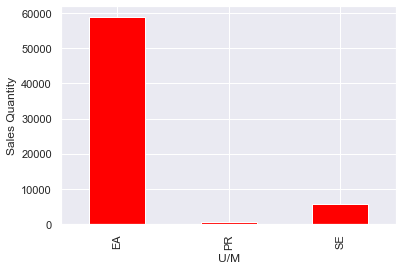

In [121]:
sales_data01.groupby('U/M')['Sales Quantity'].count().plot(kind='bar',color='Red')
plt.ylabel('Sales Quantity')

### Observations:
* Maximum sales quantities were generated in the unit of measure "EA".

Text(0, 0.5, 'Sales Quantity')

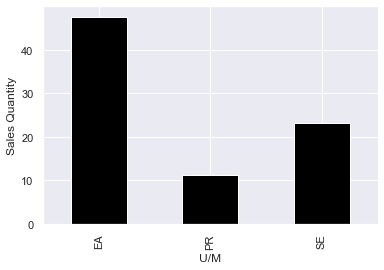

In [122]:
sales_data01.groupby('U/M')['Sales Quantity'].mean().plot(kind='bar',color='black')
plt.ylabel('Sales Quantity')

### Observations:
Maximum average level sales quantities were generated in the "EA" unit of measure.

Text(0, 0.5, 'Sales Price')

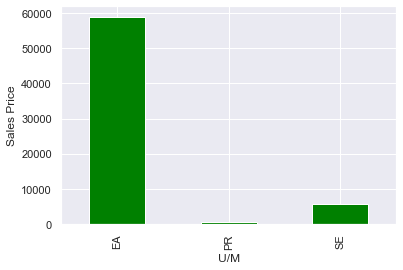

In [123]:
sales_data01.groupby('U/M')['Sales Price'].count().plot(kind='bar',color='green')
plt.ylabel('Sales Price')

### Observations:
* Maximum number of sales price were generated in the "EA" unit of measure.

Text(0, 0.5, 'Sales Price')

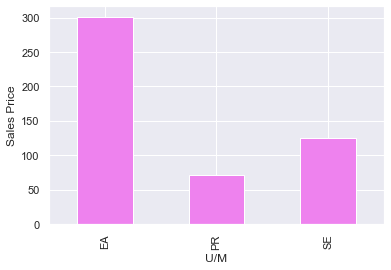

In [124]:
sales_data.groupby('U/M')['Sales Price'].mean().plot(kind='bar',color='violet')
plt.ylabel('Sales Price')

### Observations:
"EA" U/M has the maximum number of average sales prices.

Text(0, 0.5, 'Sales Amount')

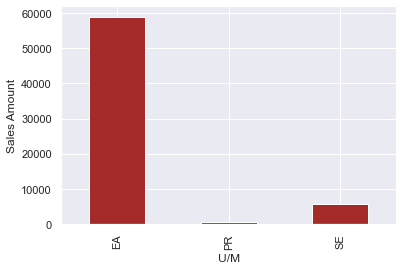

In [125]:
sales_data01.groupby('U/M')['Sales Amount'].count().plot(kind='bar',color='brown')
plt.ylabel('Sales Amount')

### Observations:
* Maximum number of sales amounts were generated in "EA" U/M while minimum in "PR" U/M.

Text(0, 0.5, 'Sales Amount')

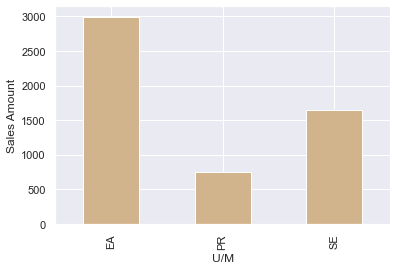

In [126]:
sales_data01.groupby('U/M')['Sales Amount'].mean().plot(kind='bar',color='tan')
plt.ylabel('Sales Amount')

### Observations:
* "EA" U/M has highest mean sales amounts while "PR" has lowest of them.

Text(0, 0.5, 'Sales Margin Amount')

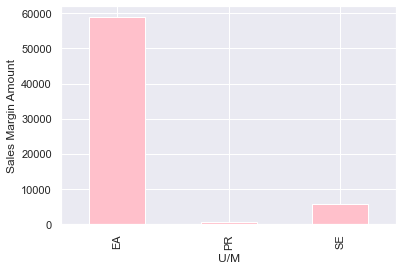

In [127]:
sales_data.groupby('U/M')['Sales Margin Amount'].count().plot(kind='bar',color='pink')
plt.ylabel('Sales Margin Amount')

### Observations:
Maximum number of sales margin amounts were generated in the "EA" U/M while minimum in "PR" U/M.

Text(0, 0.5, 'Sales Margin Amount')

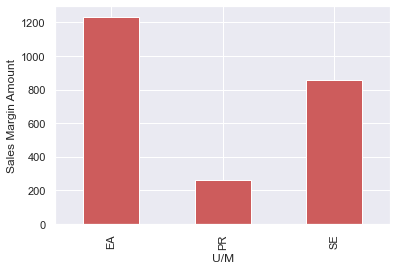

In [128]:
sales_data.groupby('U/M')['Sales Margin Amount'].mean().plot(kind='bar',color='indianred')
plt.ylabel('Sales Margin Amount')

### Observations:
* Maximum mean level sales margin amounts were generated in "SE" U/M while minimum mean level of them in "PR" U/M.

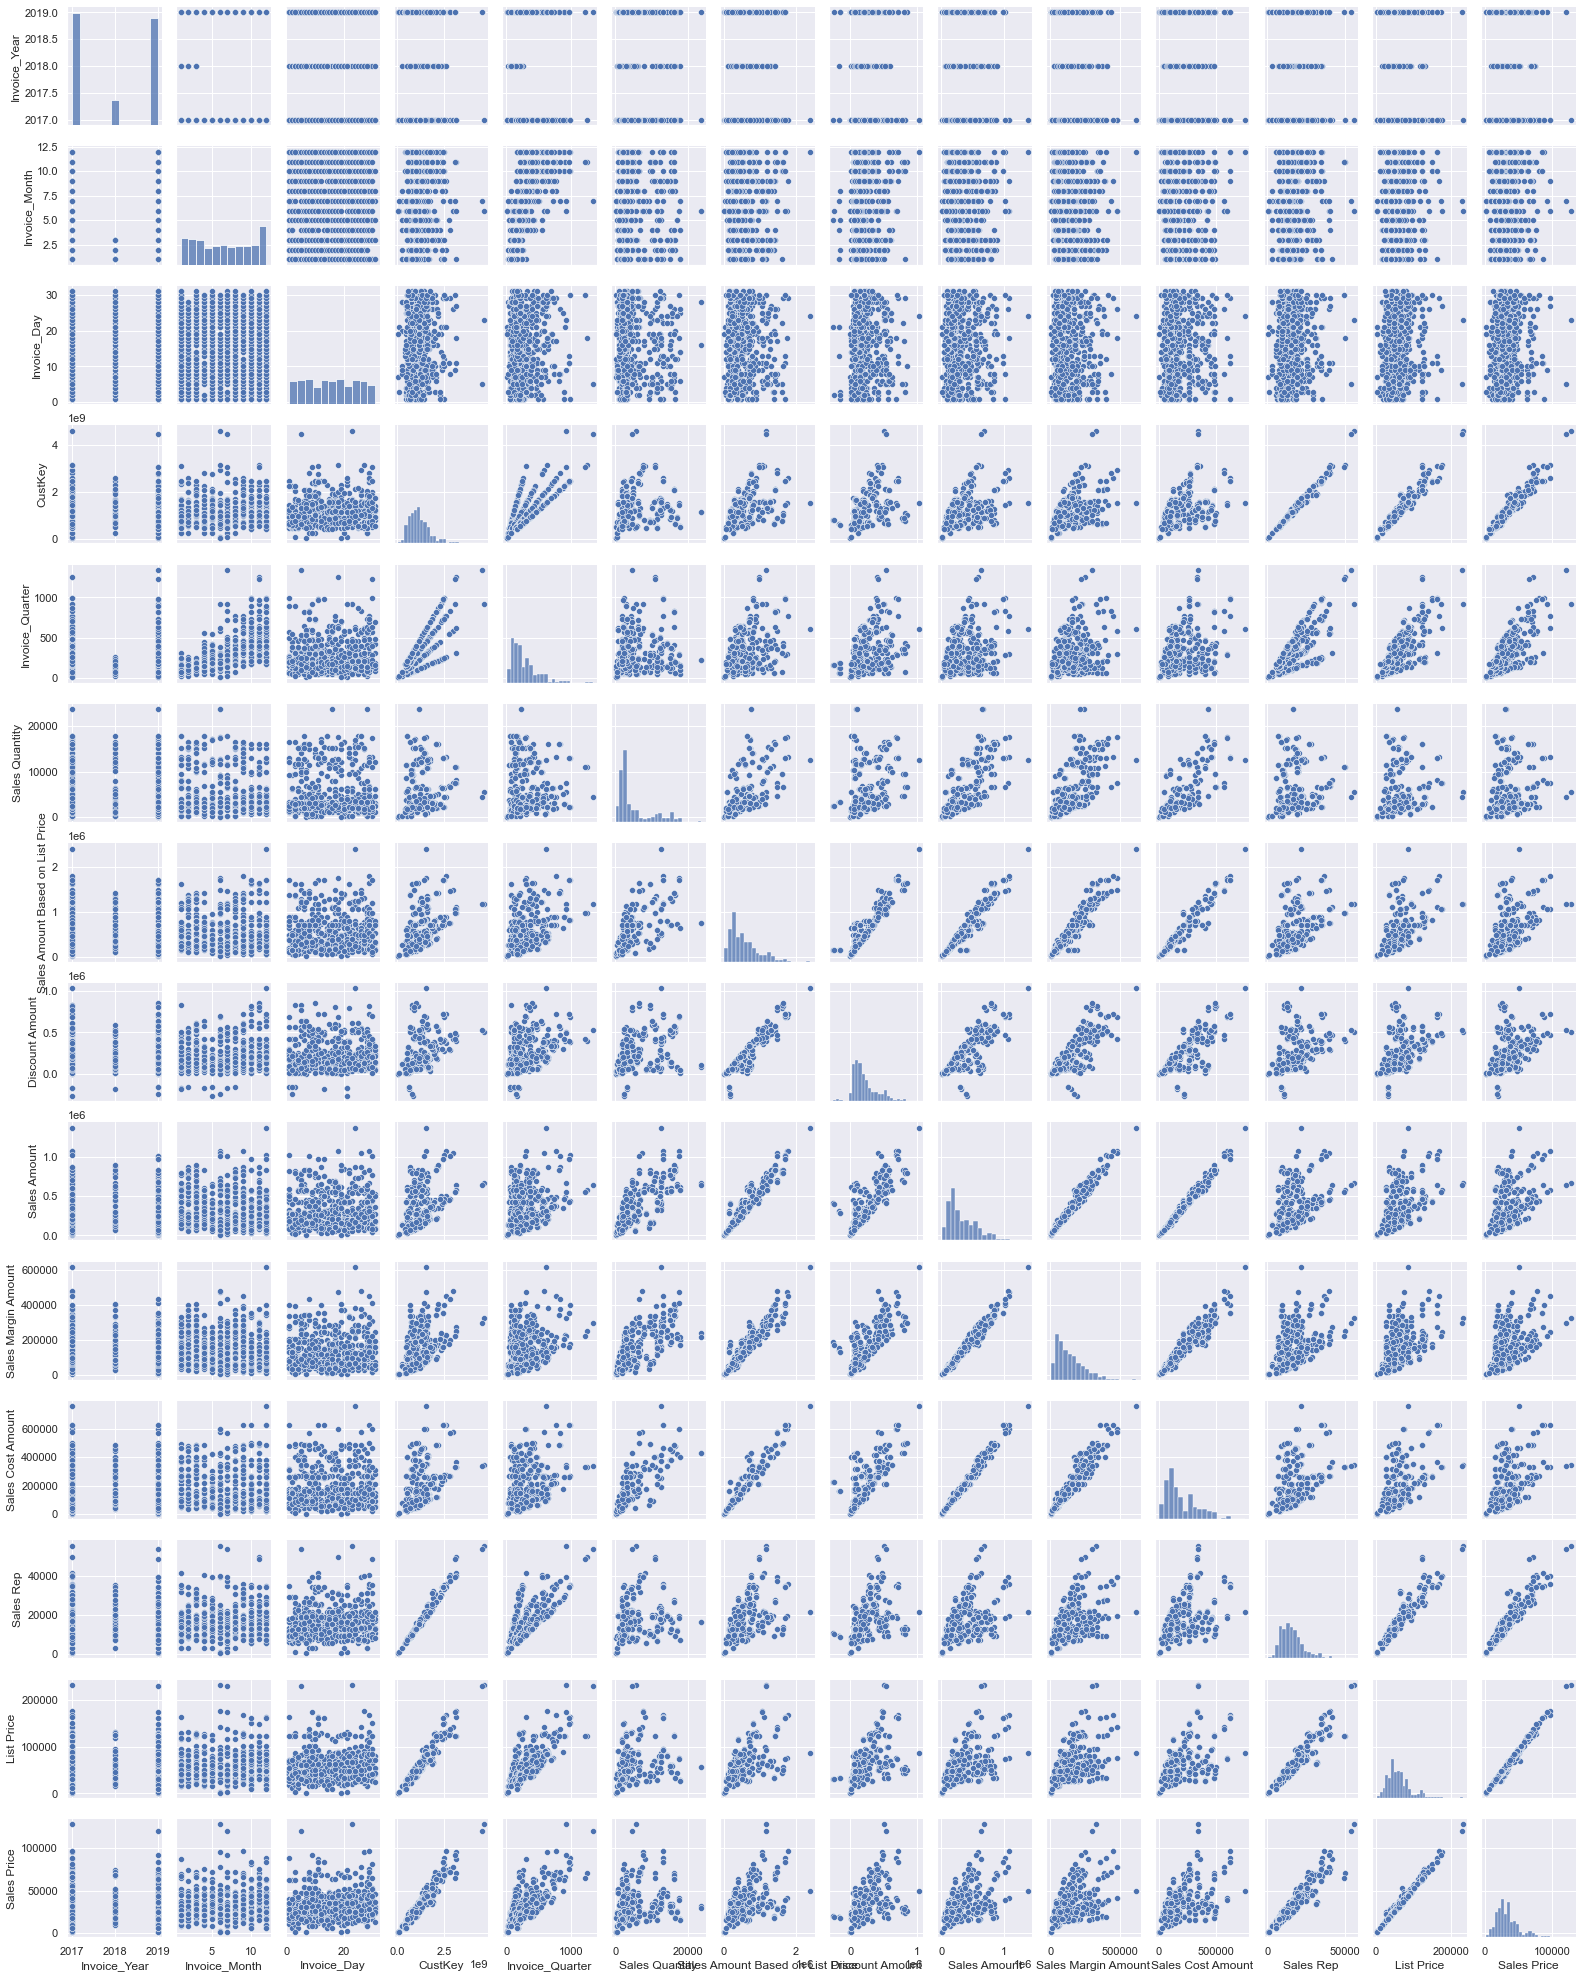

In [129]:
sns.pairplot(Monthly_sales, height = 2, aspect = 0.8)

## Observations:

* As seen from the pairplot above, it is quite clear that list price is very strongly positively correlated with sales price.
* A strong correlation exists between sales amount, sales cost amount, sales margin amount, and sales amount based on list price.
* Sales amount, sales cost amount, and sales margin amount are strongly correlated with discount amount.
* Sales quantity is moderately positively correlated to sales amount, sales cost amount, sales margin amount and sales amount based on list price.
* Sales cost amount and sales margin amount are strongly positively correlated.
* Customer key and sales rep are weakly negatively correlated.
* Sales price and sales quantity are weakly negatively correlated.
* Sales quantity and sales rep are very weakly negatively correlated.
* Sales rep is very weakly negatively correlated to both discount amount and sales cost amount.
* Sales rep is very weakly positively correlated to sales margin amount, in fact we can claim them to be independent of each other as well.
 